In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway, mannwhitneyu, kruskal
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

plt.rcParams['figure.figsize']=[10,8]

In [2]:
df=pd.read_csv("HMO_data.csv")
df

X  age     bmi  children smoker       location location_type  \
0         1   18  27.900         0    yes    CONNECTICUT         Urban   
1         2   19  33.770         1     no   RHODE ISLAND         Urban   
2         3   27  33.000         3     no  MASSACHUSETTS         Urban   
3         4   34  22.705         0     no   PENNSYLVANIA       Country   
4         5   32  28.880         0     no   PENNSYLVANIA       Country   
...     ...  ...     ...       ...    ...            ...           ...   
7577  13023   63  30.875         3    yes     NEW JERSEY         Urban   
7578  54813   53  46.700         2     no   PENNSYLVANIA         Urban   
7579  64221   42  28.310         3    yes   PENNSYLVANIA         Urban   
7580  74732   33  27.000         2     no   PENNSYLVANIA       Country   
7581  13531   20  28.785         0     no       NEW YORK         Urban   

        education_level yearly_physical    exercise      married  \
0              Bachelor              No      Active      Married   
1              Bachelor              No  Not-Active      Married   
2                Master              No      Active      Married   
3                Master              No  Not-Active      Married   
4                   PhD              No  Not-Active      Married   
...                 ...             ...         ...          ...   
7577  No College Degree              No  Not-Active      Married   
7578           Bachelor             Yes  Not-Active  Not_Married   
7579           Bachelor              No      Active      Married   
7580           Bachelor              No  Not-Active  Not_Married   
7581           Bachelor              No      Active      Married   

      hypertension  gender   cost  
0              0.0  female   1746  
1              0.0    male    602  
2              0.0    male    576  
3              1.0    male   5562  
4              0.0    male    836  
...            ...     ...    ...  
7577           0.0    male  25414  
7578           0.0  female   6881  
7579           0.0    male   9153  
7580           0.0    male   4576  
7581           0.0  female    270  

[7582 rows x 14 columns]

In [3]:
shape=df.shape
shape

(7582, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7582 entries, 0 to 7581
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                7582 non-null   int64  
 1   age              7582 non-null   int64  
 2   bmi              7504 non-null   float64
 3   children         7582 non-null   int64  
 4   smoker           7582 non-null   object 
 5   location         7582 non-null   object 
 6   location_type    7582 non-null   object 
 7   education_level  7582 non-null   object 
 8   yearly_physical  7582 non-null   object 
 9   exercise         7582 non-null   object 
 10  married          7582 non-null   object 
 11  hypertension     7502 non-null   float64
 12  gender           7582 non-null   object 
 13  cost             7582 non-null   int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 829.4+ KB


In [5]:
df.describe()

X          age          bmi     children  hypertension  \
count  7.582000e+03  7582.000000  7504.000000  7582.000000   7502.000000   
mean   7.126017e+05    38.885650    30.795192     1.109470      0.200480   
std    5.357253e+06    14.177376     5.995012     1.219004      0.400386   
min    1.000000e+00    18.000000    15.960000     0.000000      0.000000   
25%    5.634750e+03    26.000000    26.600000     0.000000      0.000000   
50%    2.491650e+04    39.000000    30.495000     1.000000      0.000000   
75%    1.184860e+05    51.000000    34.770000     2.000000      0.000000   
max    1.311011e+08    66.000000    53.130000     5.000000      1.000000   

               cost  
count   7582.000000  
mean    4042.961224  
std     4928.693949  
min        2.000000  
25%      970.000000  
50%     2500.000000  
75%     4775.000000  
max    55715.000000

### Interpretation:
- There is no significant difference between mean values and maximum values for all the attributes

In [6]:
df.dtypes

X                    int64
age                  int64
bmi                float64
children             int64
smoker              object
location            object
location_type       object
education_level     object
yearly_physical     object
exercise            object
married             object
hypertension       float64
gender              object
cost                 int64
dtype: object

### Interpretation:
- All the attributes are correctly assigned with their data types respectively.
- No need to perform any data type casting

In [7]:
df.isnull().sum()

X                   0
age                 0
bmi                78
children            0
smoker              0
location            0
location_type       0
education_level     0
yearly_physical     0
exercise            0
married             0
hypertension       80
gender              0
cost                0
dtype: int64

### Interpretation:
- We can observe that there are 78 null values in BMI
- There are 80 null values in hypertension attribute
- There are no null values in remaining columns

In [8]:
missing_values=df.isnull().sum()/df.shape[0]
missing_values

X                  0.000000
age                0.000000
bmi                0.010288
children           0.000000
smoker             0.000000
location           0.000000
location_type      0.000000
education_level    0.000000
yearly_physical    0.000000
exercise           0.000000
married            0.000000
hypertension       0.010551
gender             0.000000
cost               0.000000
dtype: float64

### Interpretation:
- The attributes BMI and hypertension has only 1% of null values
- This is a very less percentage
- we can directly drop these values instead of imputing or interpolating

In [9]:
df=df.dropna()
df

X  age     bmi  children smoker       location location_type  \
0         1   18  27.900         0    yes    CONNECTICUT         Urban   
1         2   19  33.770         1     no   RHODE ISLAND         Urban   
2         3   27  33.000         3     no  MASSACHUSETTS         Urban   
3         4   34  22.705         0     no   PENNSYLVANIA       Country   
4         5   32  28.880         0     no   PENNSYLVANIA       Country   
...     ...  ...     ...       ...    ...            ...           ...   
7577  13023   63  30.875         3    yes     NEW JERSEY         Urban   
7578  54813   53  46.700         2     no   PENNSYLVANIA         Urban   
7579  64221   42  28.310         3    yes   PENNSYLVANIA         Urban   
7580  74732   33  27.000         2     no   PENNSYLVANIA       Country   
7581  13531   20  28.785         0     no       NEW YORK         Urban   

        education_level yearly_physical    exercise      married  \
0              Bachelor              No      Active      Married   
1              Bachelor              No  Not-Active      Married   
2                Master              No      Active      Married   
3                Master              No  Not-Active      Married   
4                   PhD              No  Not-Active      Married   
...                 ...             ...         ...          ...   
7577  No College Degree              No  Not-Active      Married   
7578           Bachelor             Yes  Not-Active  Not_Married   
7579           Bachelor              No      Active      Married   
7580           Bachelor              No  Not-Active  Not_Married   
7581           Bachelor              No      Active      Married   

      hypertension  gender   cost  
0              0.0  female   1746  
1              0.0    male    602  
2              0.0    male    576  
3              1.0    male   5562  
4              0.0    male    836  
...            ...     ...    ...  
7577           0.0    male  25414  
7578           0.0  female   6881  
7579           0.0    male   9153  
7580           0.0    male   4576  
7581           0.0  female    270  

[7424 rows x 14 columns]

In [10]:
df.shape

(7424, 14)

In [11]:
(shape[0]-df.shape[0])/shape[0]

0.020838828805064626

### Interpretation:
- only 2% of the dataset has been dropped.
- We have 7424 rows in the dataset

In [12]:
df.isnull().sum()

X                  0
age                0
bmi                0
children           0
smoker             0
location           0
location_type      0
education_level    0
yearly_physical    0
exercise           0
married            0
hypertension       0
gender             0
cost               0
dtype: int64

In [13]:
df_num=df.select_dtypes(include=[np.number])
df_num.head()

X  age     bmi  children  hypertension  cost
0  1   18  27.900         0           0.0  1746
1  2   19  33.770         1           0.0   602
2  3   27  33.000         3           0.0   576
3  4   34  22.705         0           1.0  5562
4  5   32  28.880         0           0.0   836

In [14]:
df_cat=df.select_dtypes(include='O')
df_cat.head()

smoker       location location_type education_level yearly_physical  \
0    yes    CONNECTICUT         Urban        Bachelor              No   
1     no   RHODE ISLAND         Urban        Bachelor              No   
2     no  MASSACHUSETTS         Urban          Master              No   
3     no   PENNSYLVANIA       Country          Master              No   
4     no   PENNSYLVANIA       Country             PhD              No   

     exercise  married  gender  
0      Active  Married  female  
1  Not-Active  Married    male  
2      Active  Married    male  
3  Not-Active  Married    male  
4  Not-Active  Married    male

In [15]:
df_num.isnull().sum()

X               0
age             0
bmi             0
children        0
hypertension    0
cost            0
dtype: int64

In [16]:
df_cat.isnull().sum()

smoker             0
location           0
location_type      0
education_level    0
yearly_physical    0
exercise           0
married            0
gender             0
dtype: int64

In [17]:
#Hence, we have dropped all the null values.

<ipython-input-18-529789337a85>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[i])


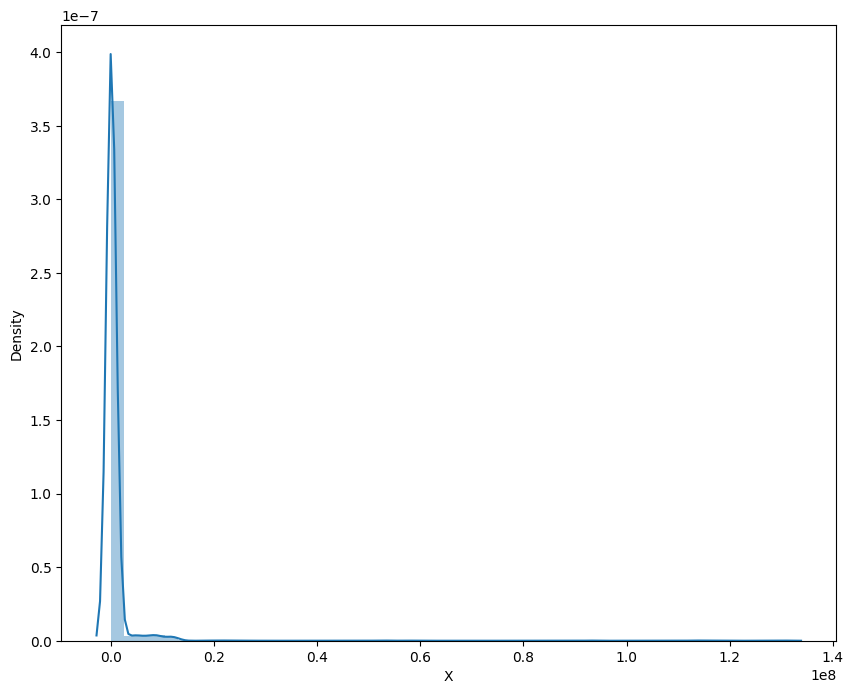

<ipython-input-18-529789337a85>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[i])


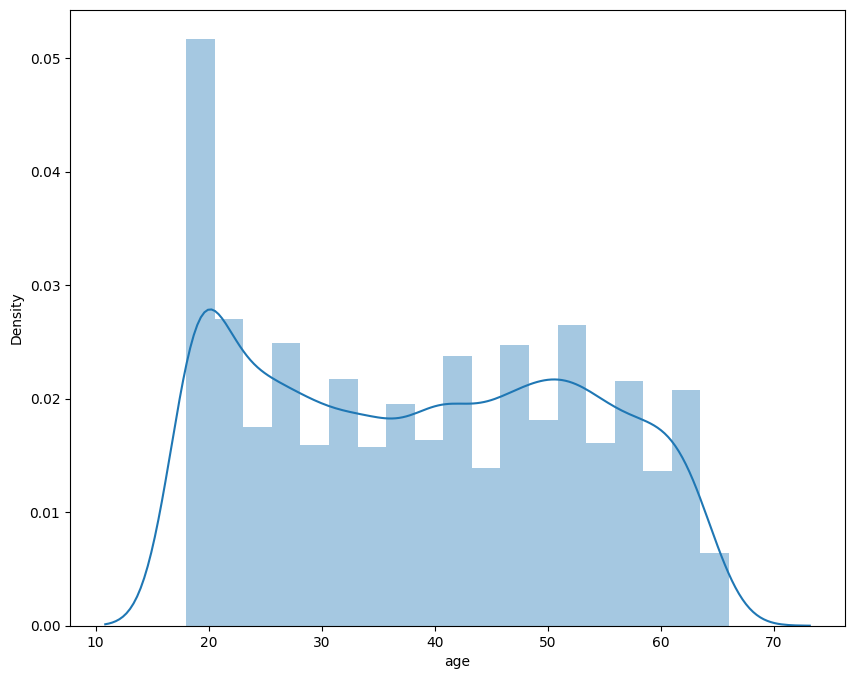

<ipython-input-18-529789337a85>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[i])


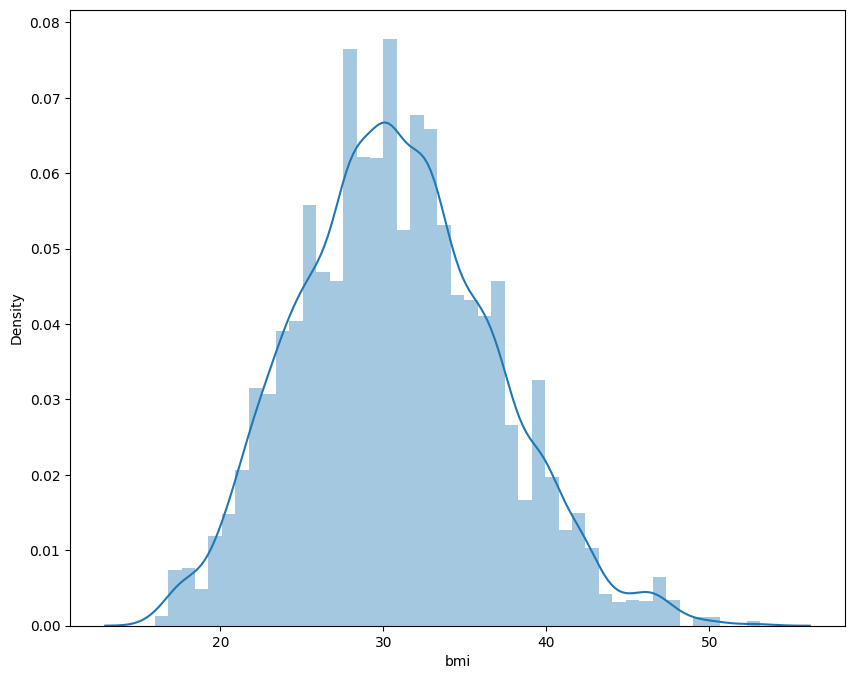

<ipython-input-18-529789337a85>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[i])


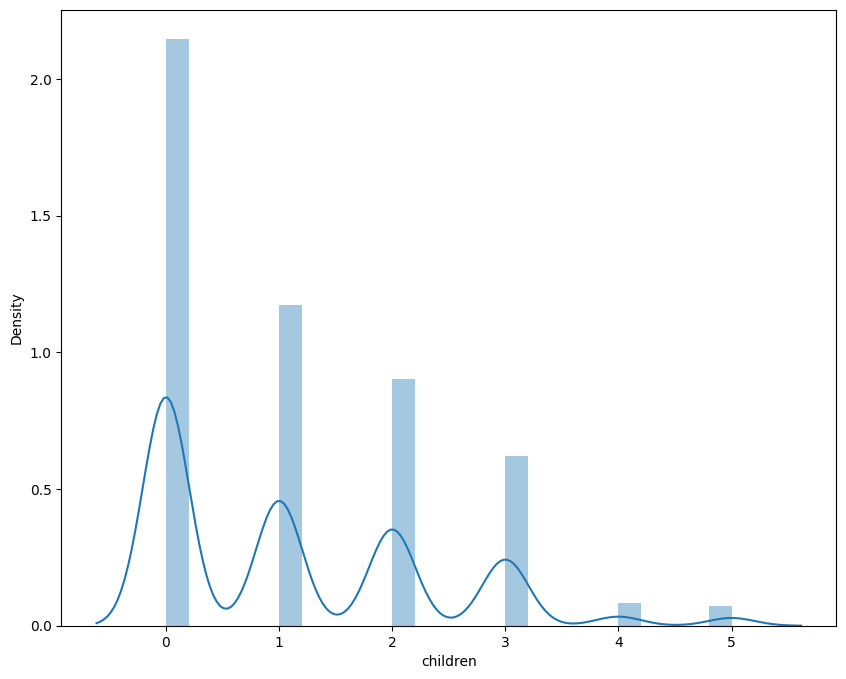

<ipython-input-18-529789337a85>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[i])


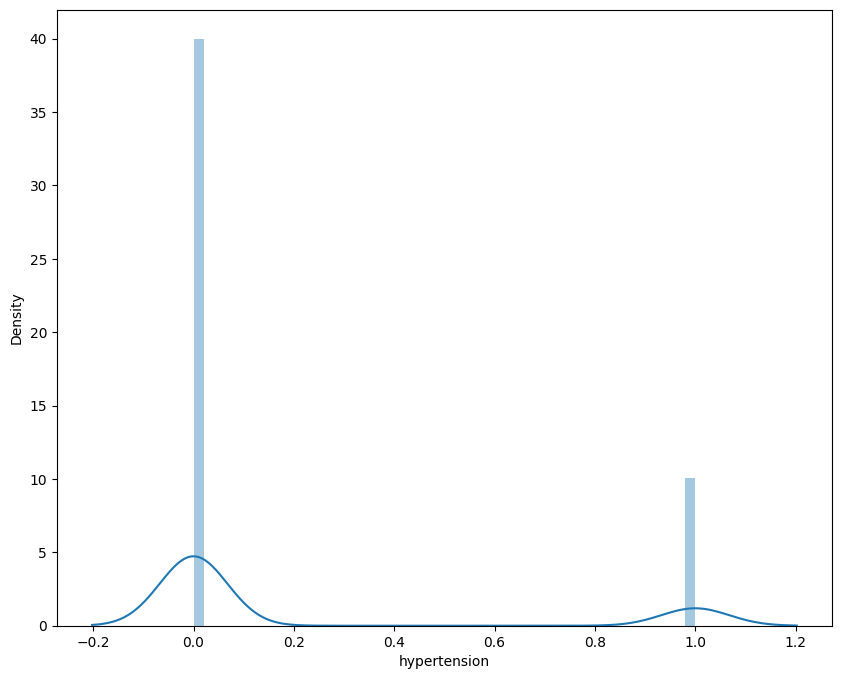

<ipython-input-18-529789337a85>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_num[i])


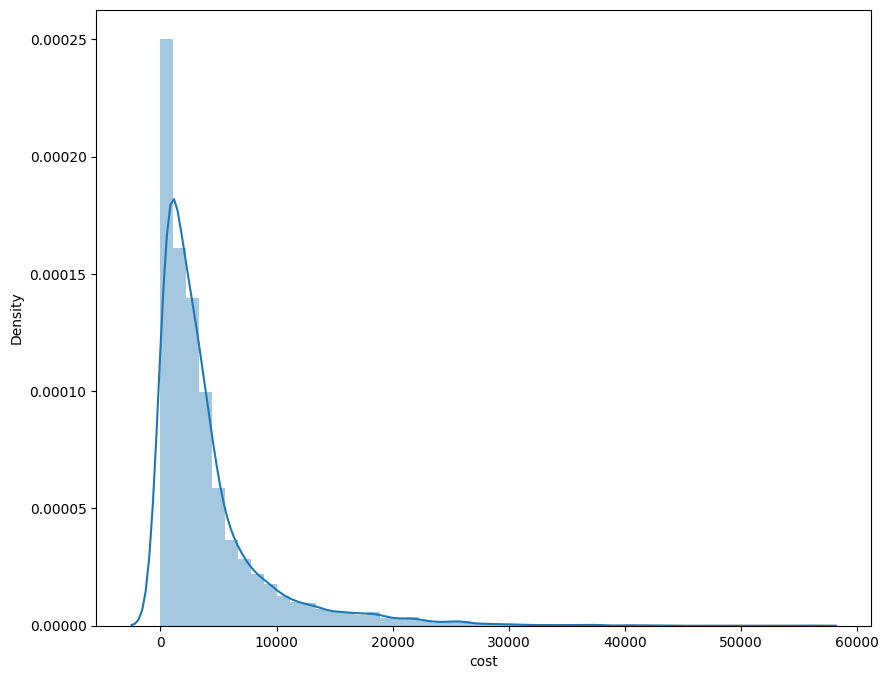

In [18]:
for i in df_num.columns:
    sns.distplot(df_num[i])
    plt.xlabel(i)
    plt.show()

### Interpretation:
From the above plots of skewness of all numerical attributes. We can observe the following patterns.
- The attribute X shows right skewness
- The attribute age shows right skewness
- The attribute bmi shows normal distribution
- The attribute children shows right skewness
- The attribute hypertension shows right skewness
- The attribute cost shows right skewness

### Exploratory Data Analysis (EDA)




In [19]:
df.describe()

X          age          bmi     children  hypertension  \
count  7.424000e+03  7424.000000  7424.000000  7424.000000   7424.000000   
mean   7.218677e+05    38.943292    30.788149     1.109106      0.200700   
std    5.412068e+06    14.179253     5.998406     1.216751      0.400551   
min    1.000000e+00    18.000000    15.960000     0.000000      0.000000   
25%    5.649000e+03    26.000000    26.600000     0.000000      0.000000   
50%    2.536100e+04    39.000000    30.495000     1.000000      0.000000   
75%    1.191442e+05    51.000000    34.700000     2.000000      0.000000   
max    1.311011e+08    66.000000    53.130000     5.000000      1.000000   

               cost  
count   7424.000000  
mean    4052.139413  
std     4946.598381  
min        2.000000  
25%      970.000000  
50%     2504.500000  
75%     4778.250000  
max    55715.000000

### Univariate Analysis:

For numerical data

<ipython-input-20-974657416aa6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


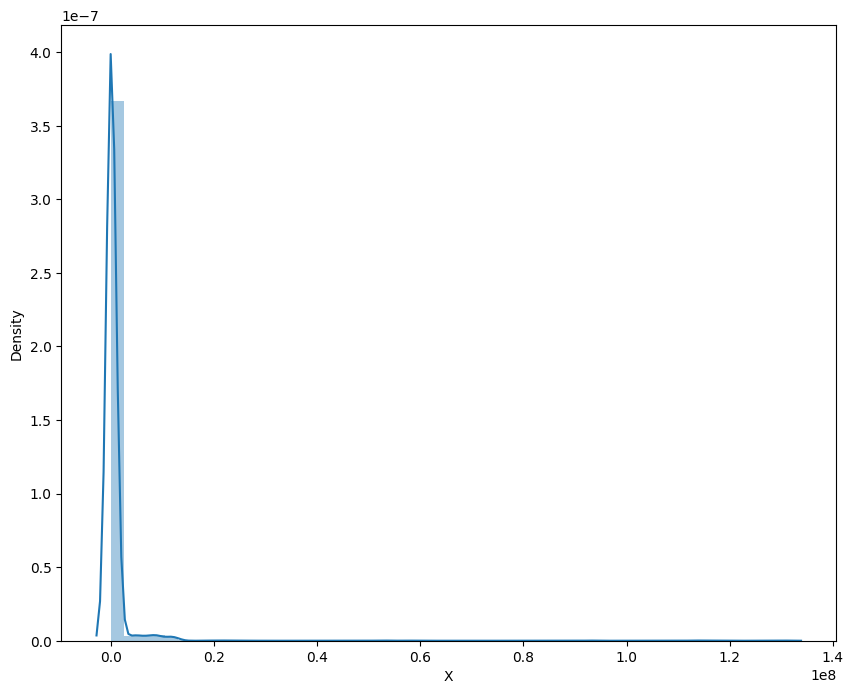

<ipython-input-20-974657416aa6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


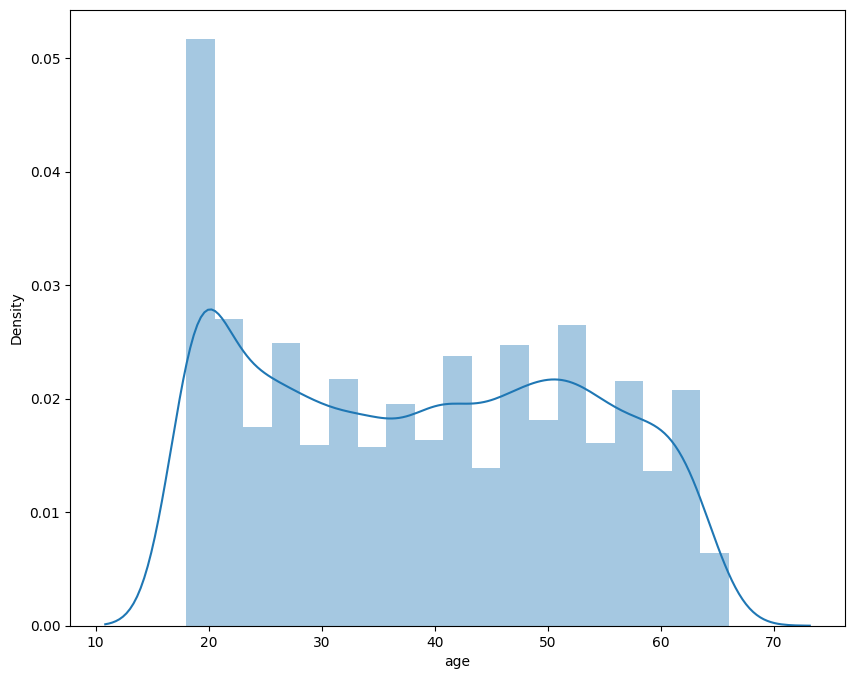

<ipython-input-20-974657416aa6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


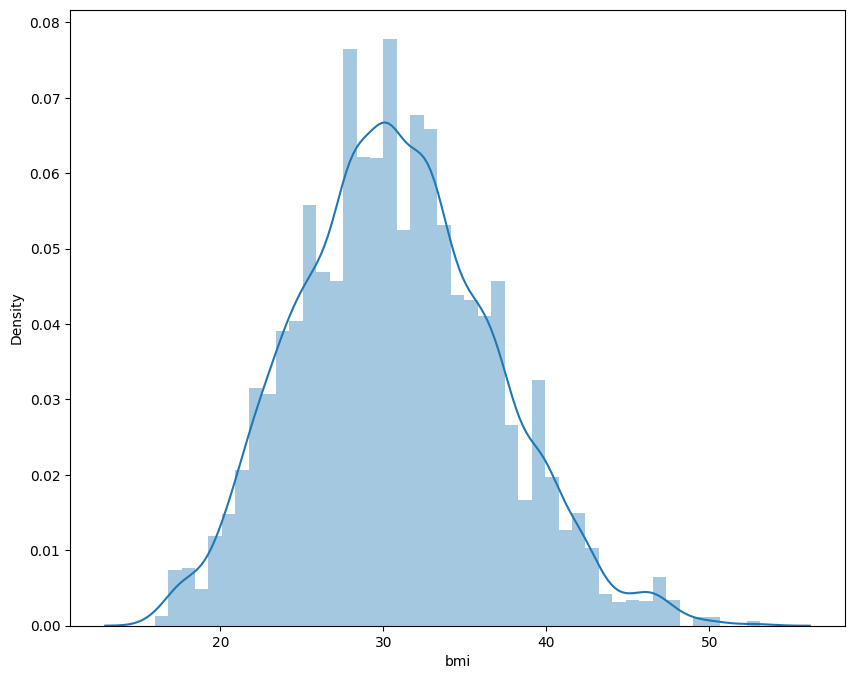

<ipython-input-20-974657416aa6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


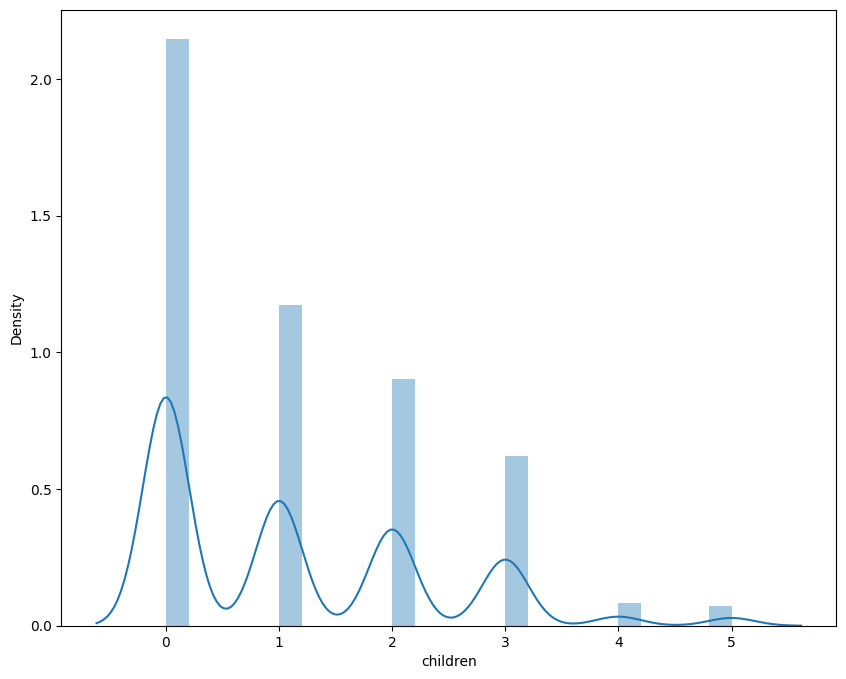

<ipython-input-20-974657416aa6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


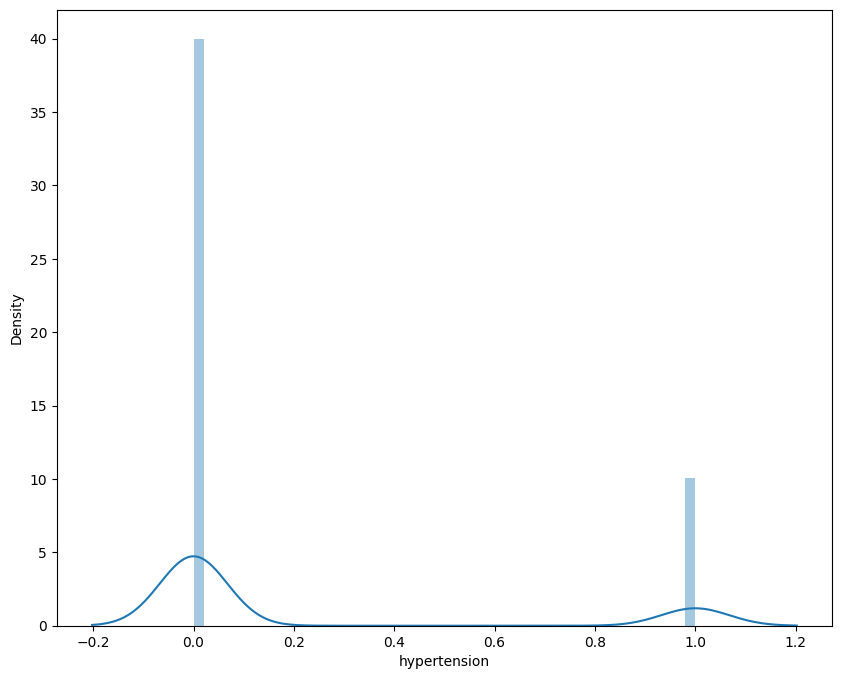

<ipython-input-20-974657416aa6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


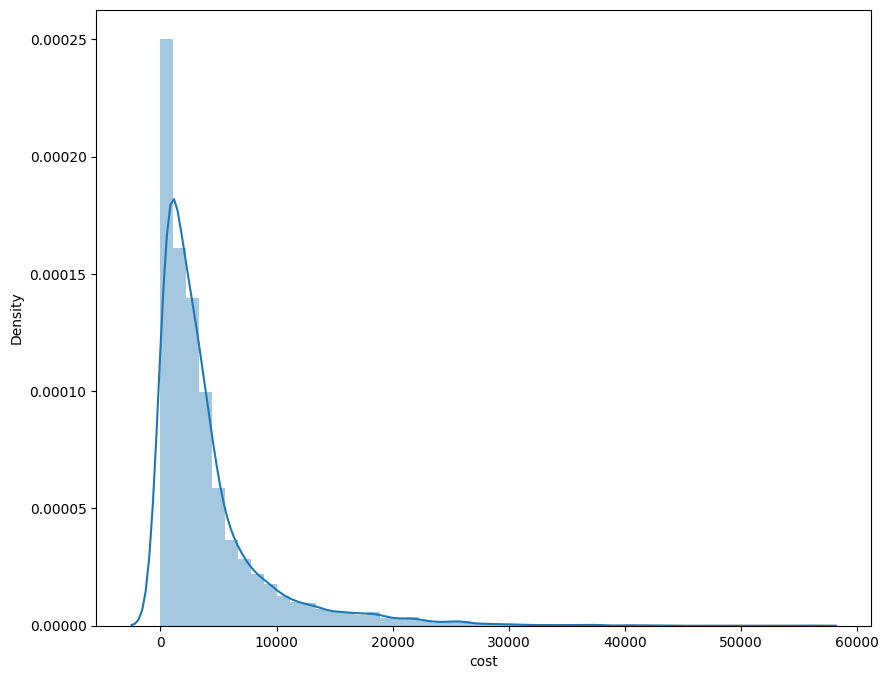

In [20]:
for i in df_num.columns:
    sns.distplot(df[i])
    plt.show()

For Categorical data





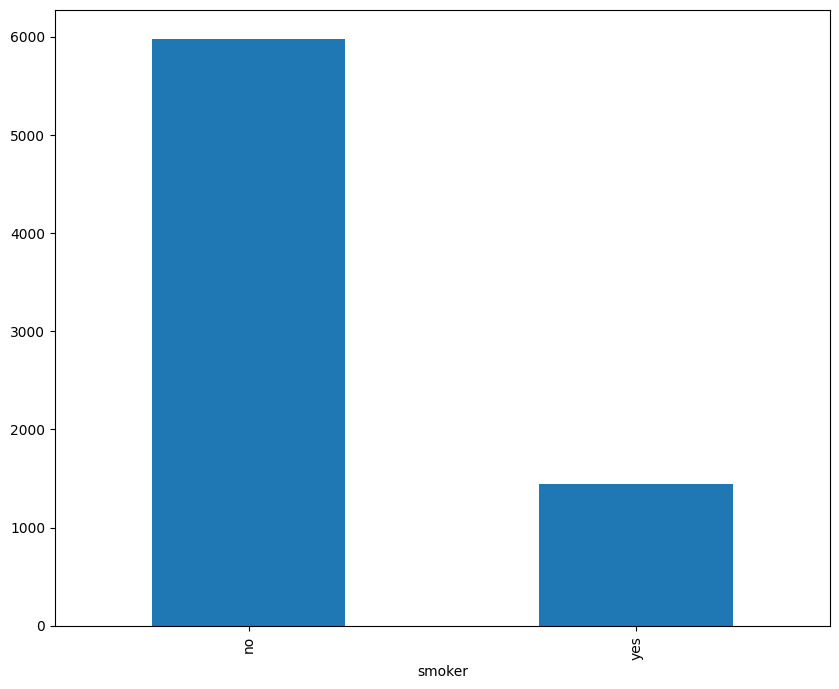

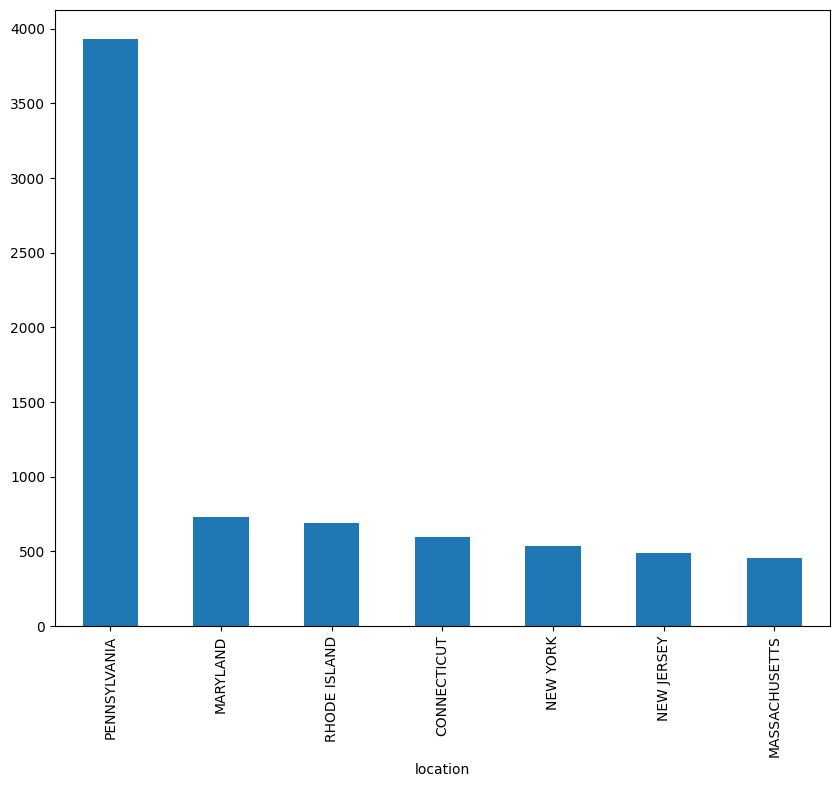

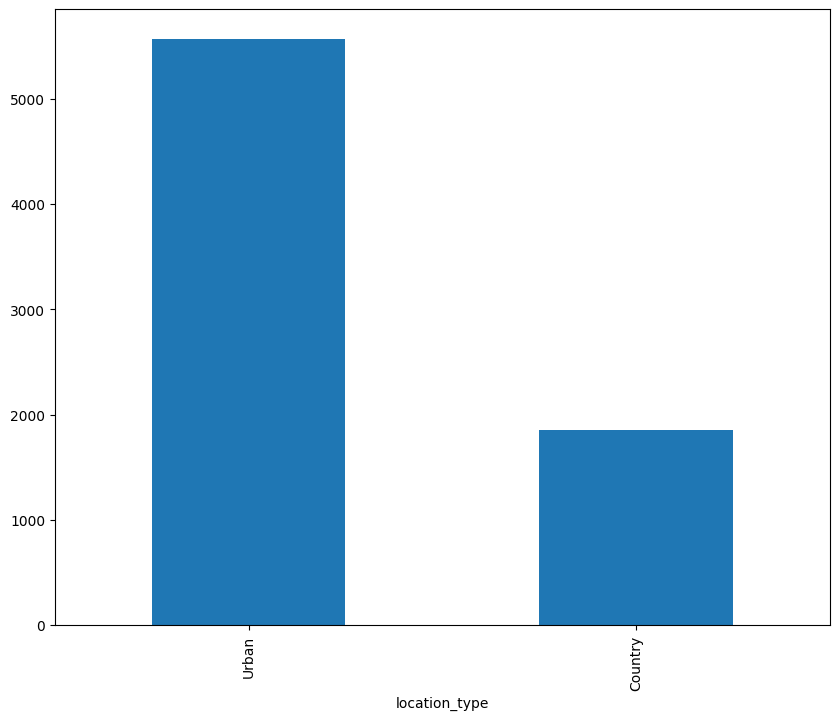

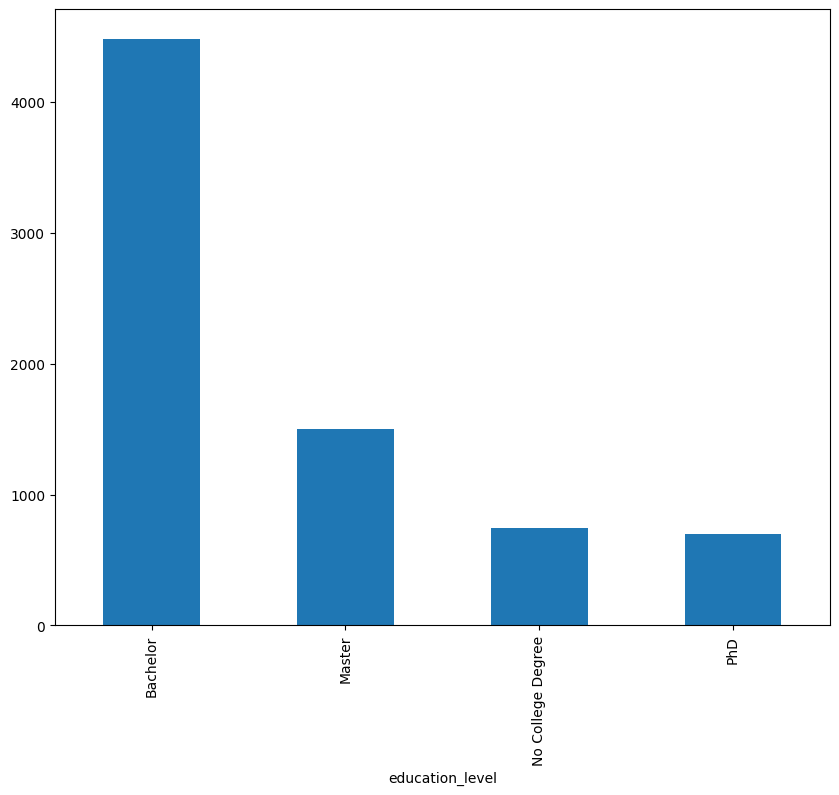

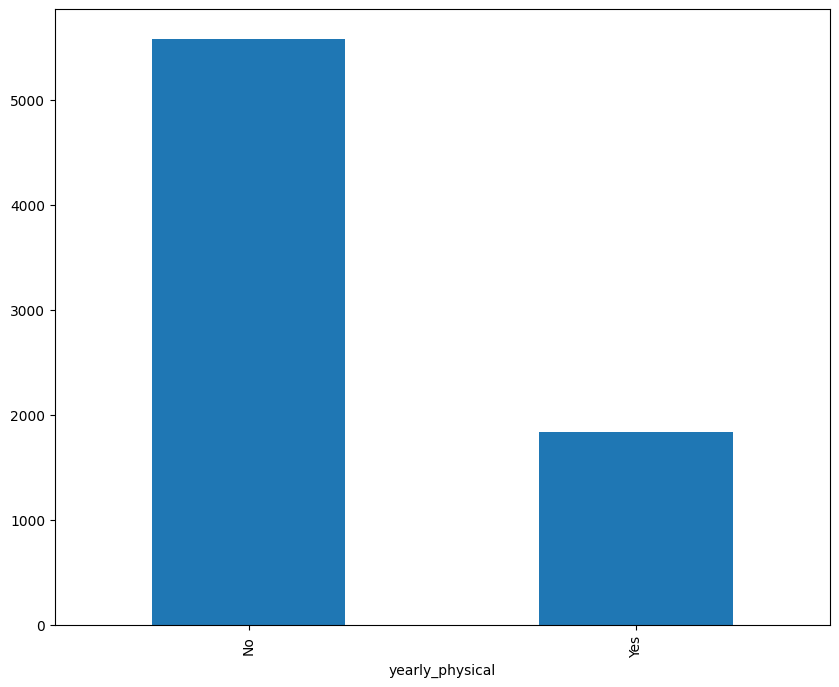

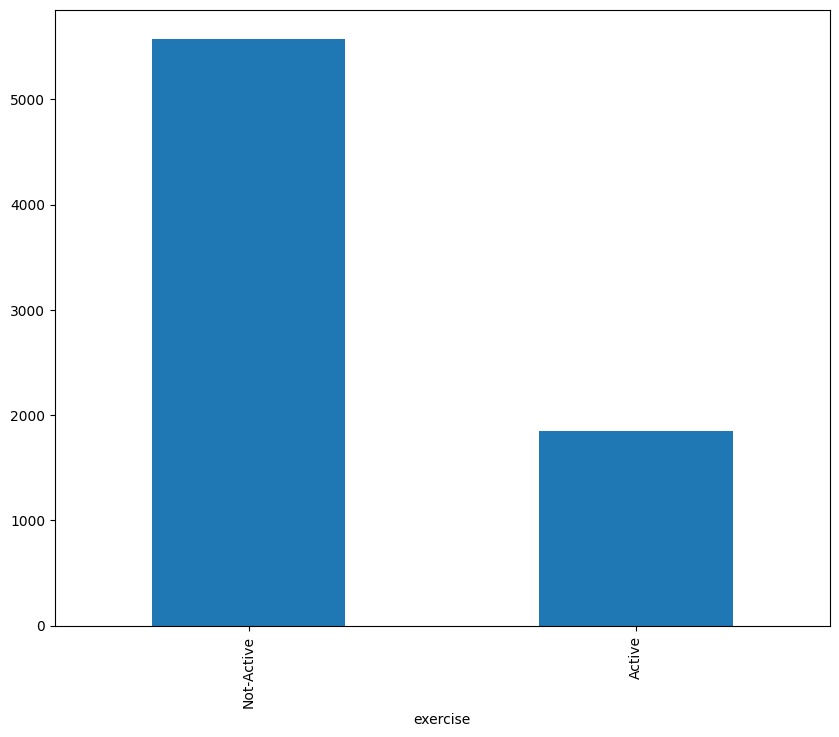

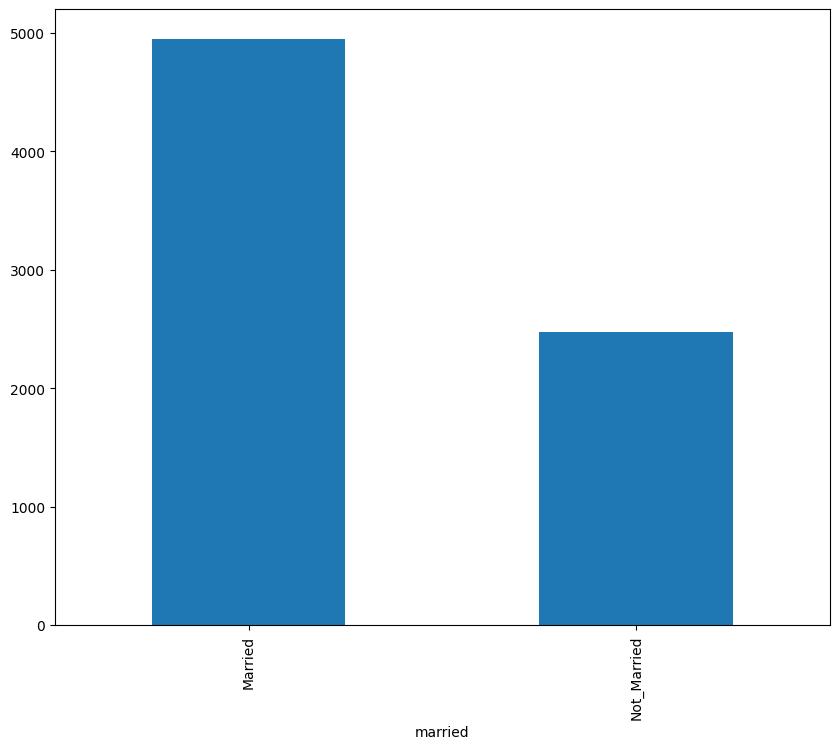

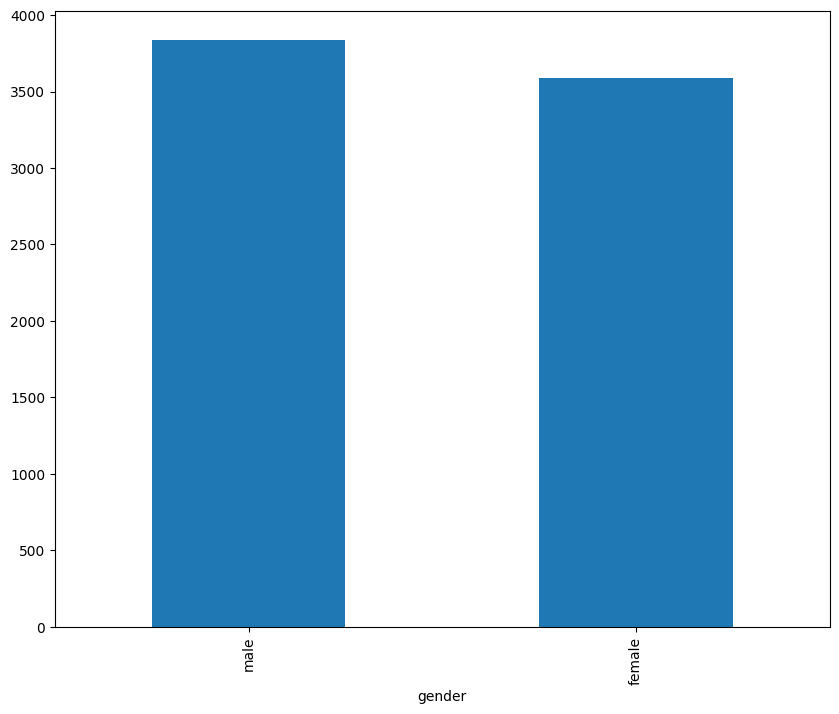

In [21]:
for i in df_cat.columns:
    df_cat[i].value_counts().plot(kind='bar')
    plt.xlabel(i)
    plt.show()

### Interpretation:
- smoker has 2 categories (no, yes)
- location has 7 categories
- location_type has 2 categories (urban, country)
- education_level has 4 categories
- yearly_physical has 2 categories
- exercise has 2 categories
- married has 2 categories
- gender has 2 categories

### Bivariate Analysis:

### Numerical - Numerical
### Scatter plots

In [22]:
df_num_cols=[col for col in df_num.columns if col != 'cost']
df_num_cols

['X', 'age', 'bmi', 'children', 'hypertension']

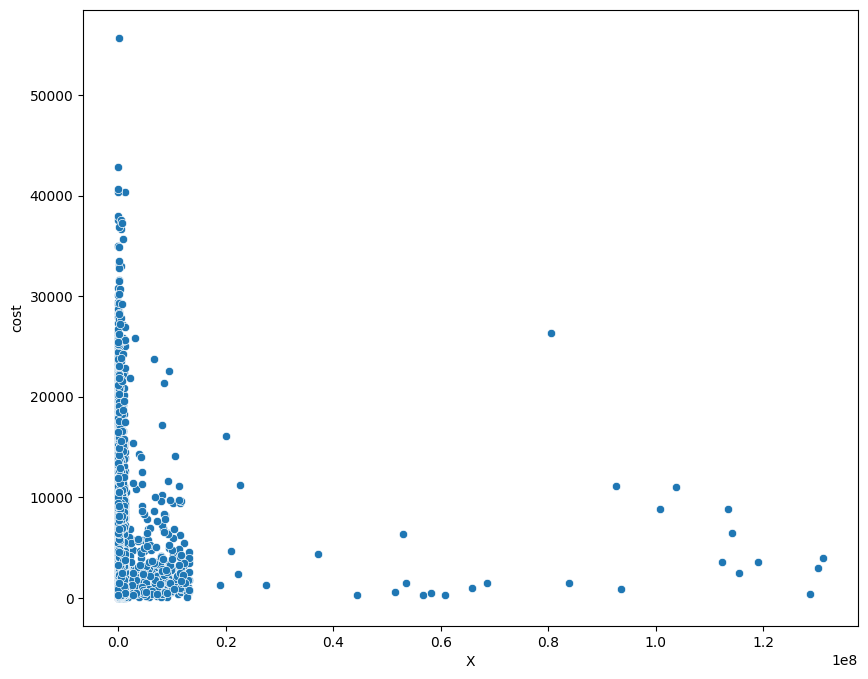

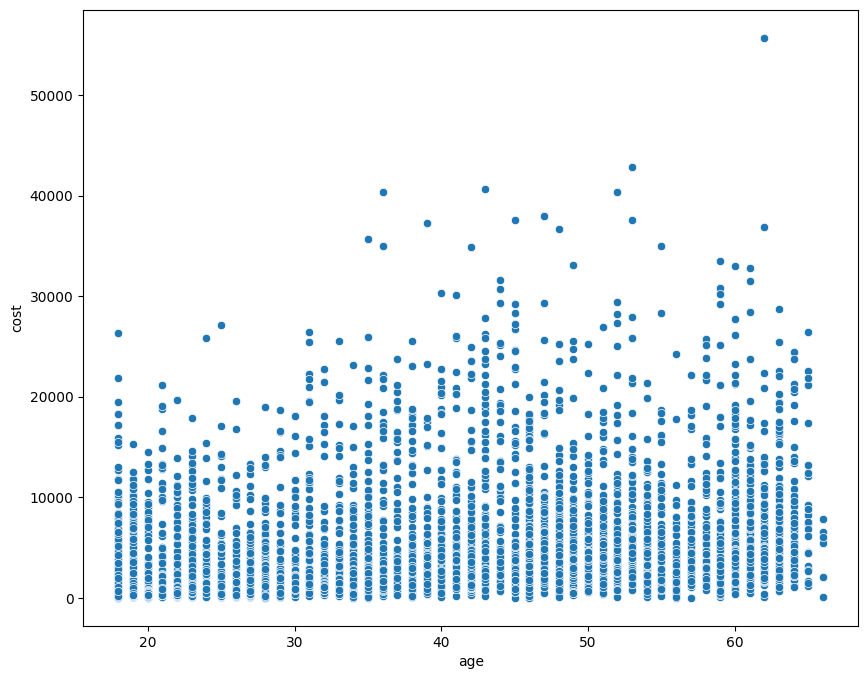

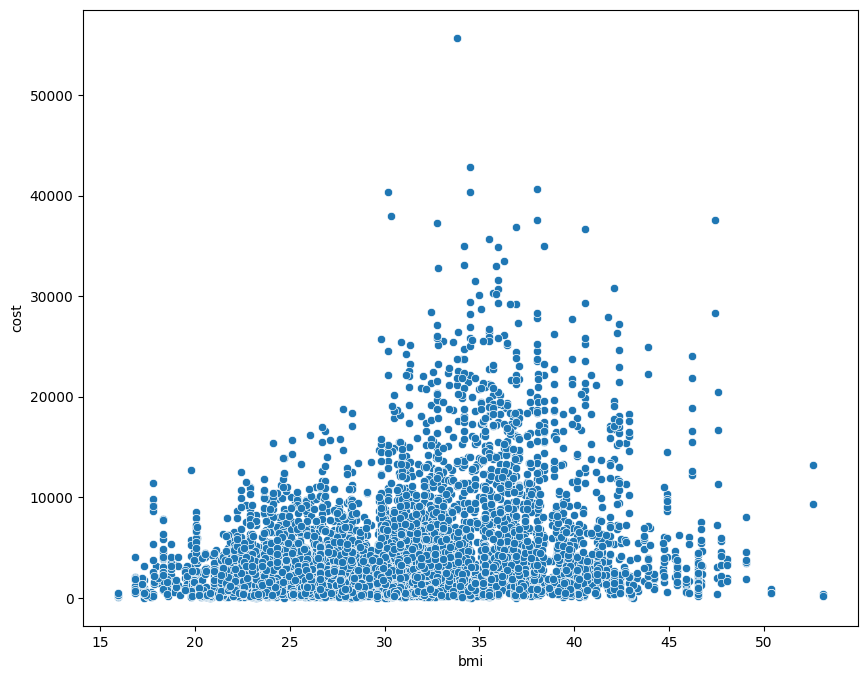

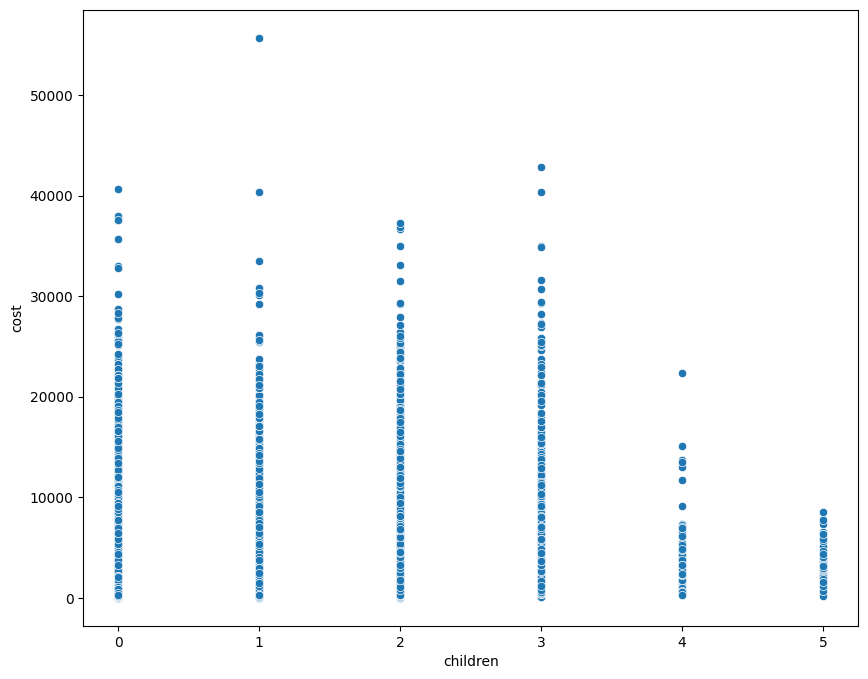

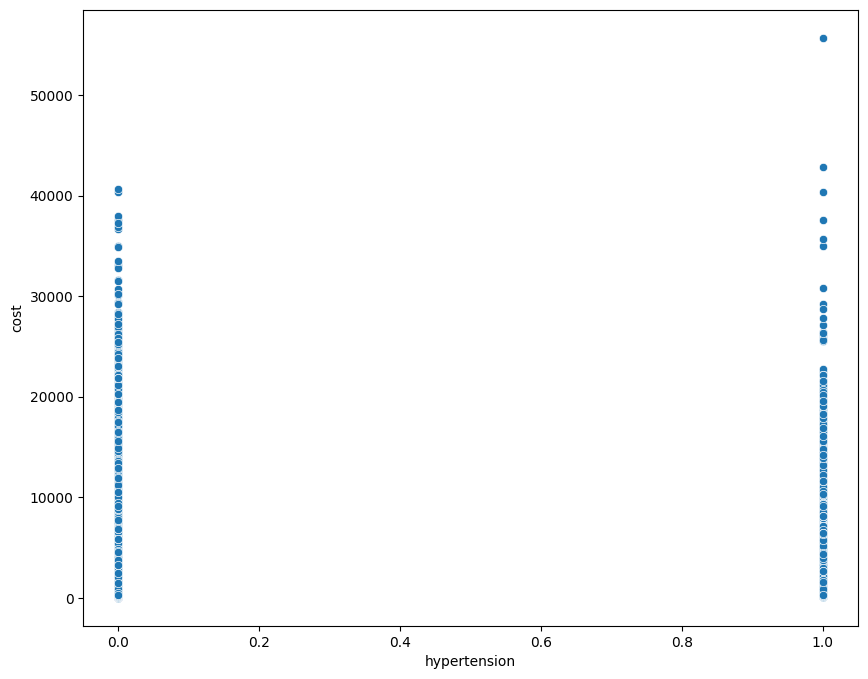

In [23]:
for i in df_num_cols:
    sns.scatterplot(x=i,y='cost',data=df_num)
    plt.xlabel(i)
    plt.ylabel('cost')
    plt.show()

### Interpretation:
- From the above scatterplots, we can observe that there is no direct linear (positive or negative) relationships between any of the independent variable with the 'cost' target variable.

### Categorical - Numerical:

### Box plots

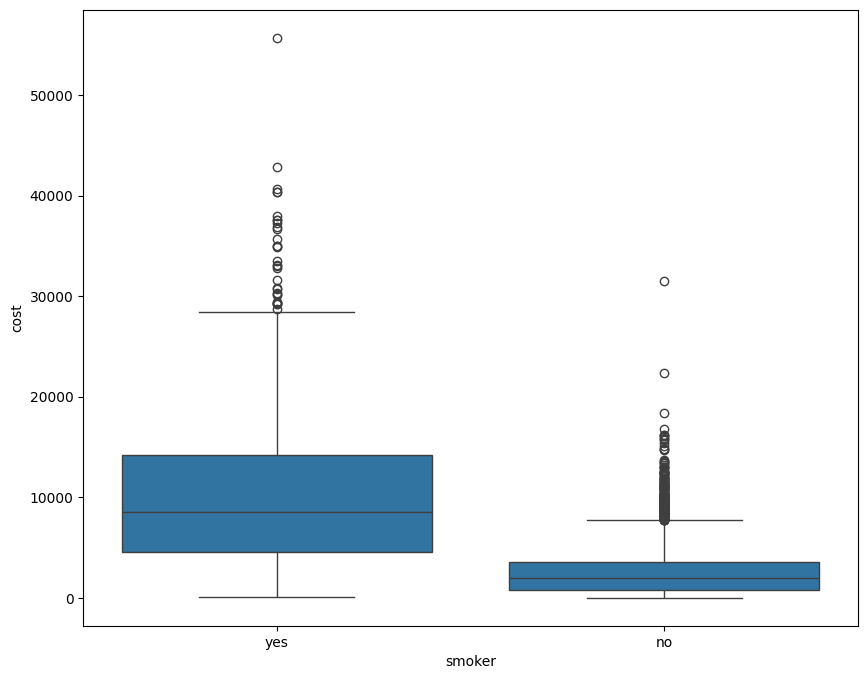

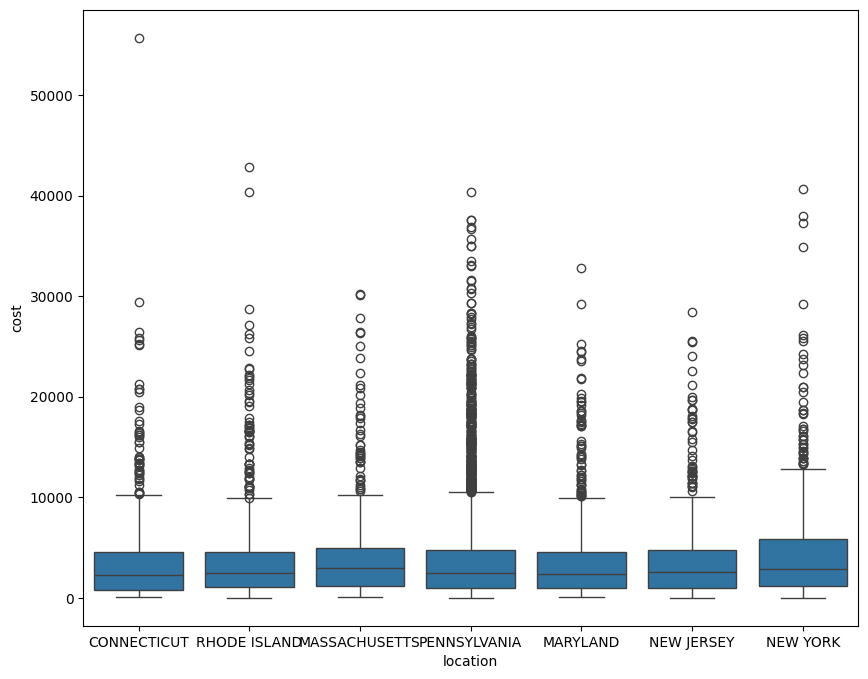

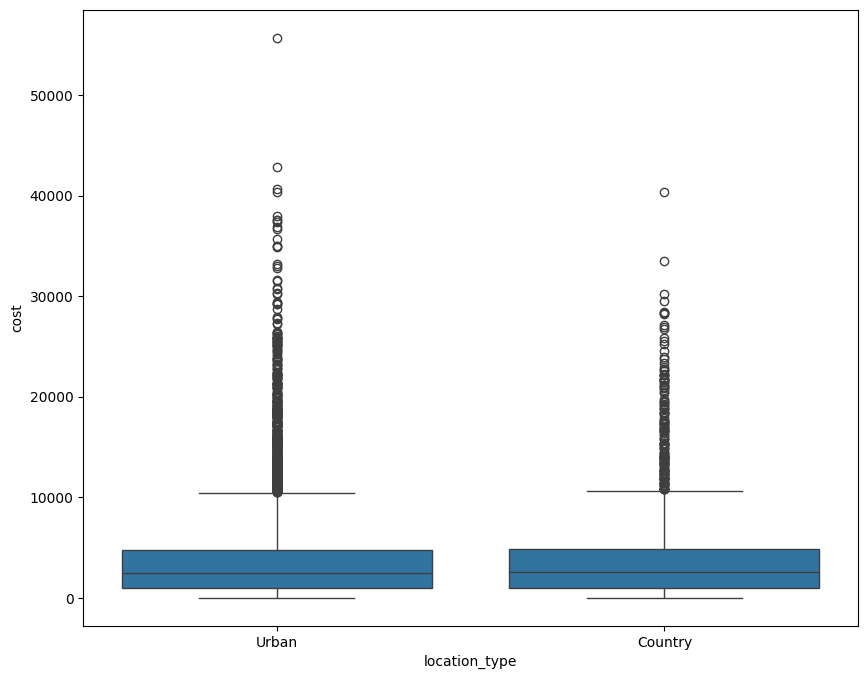

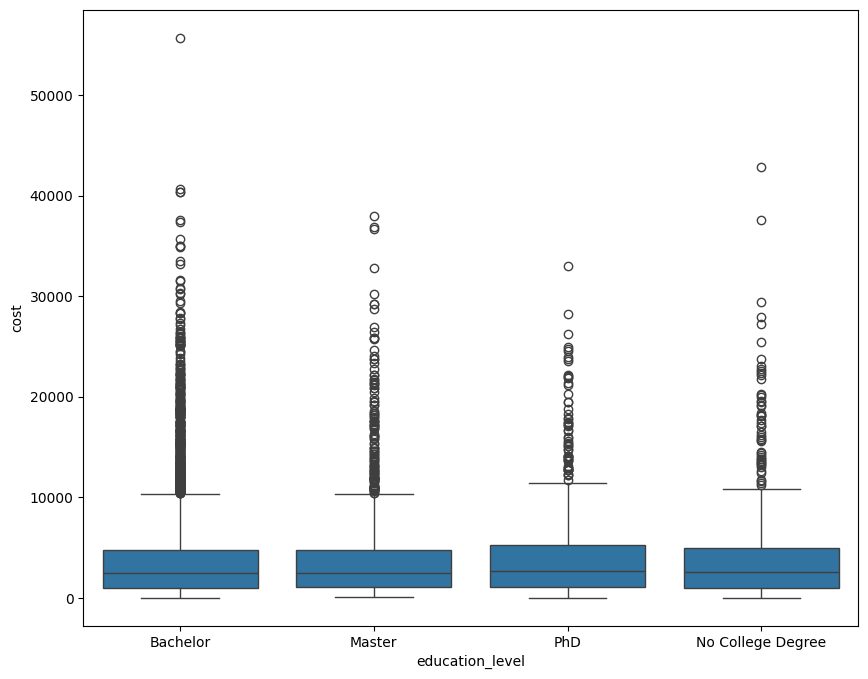

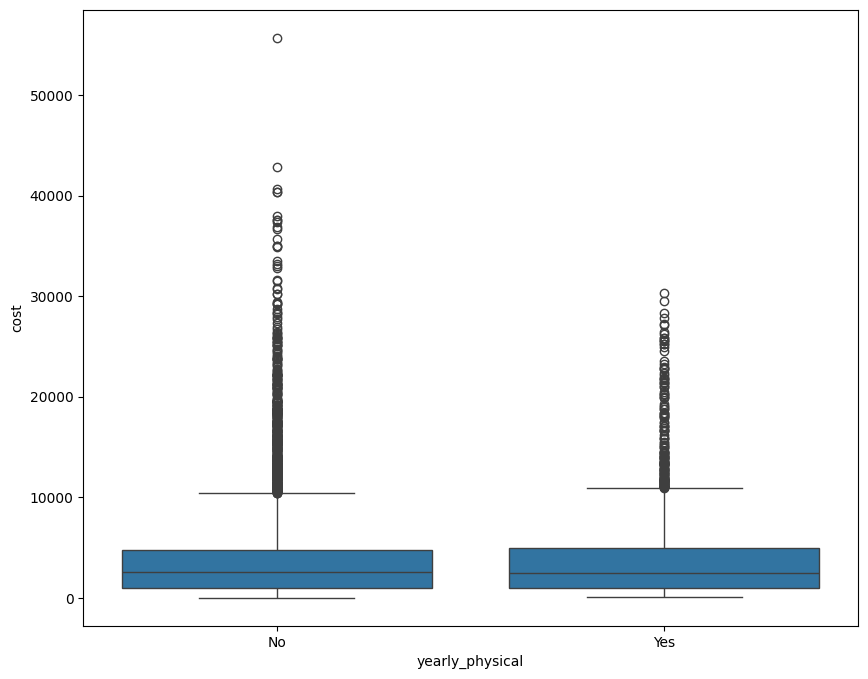

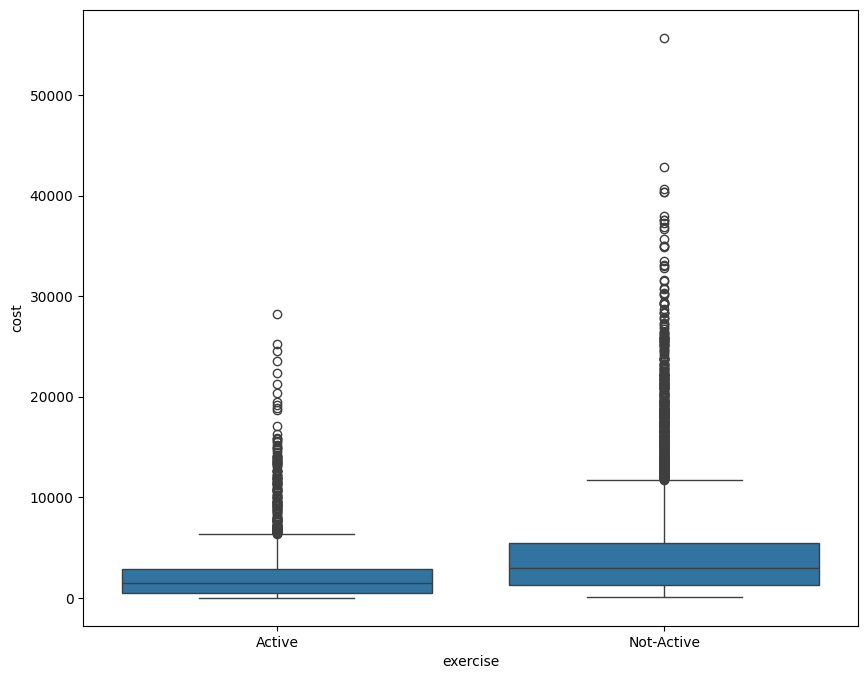

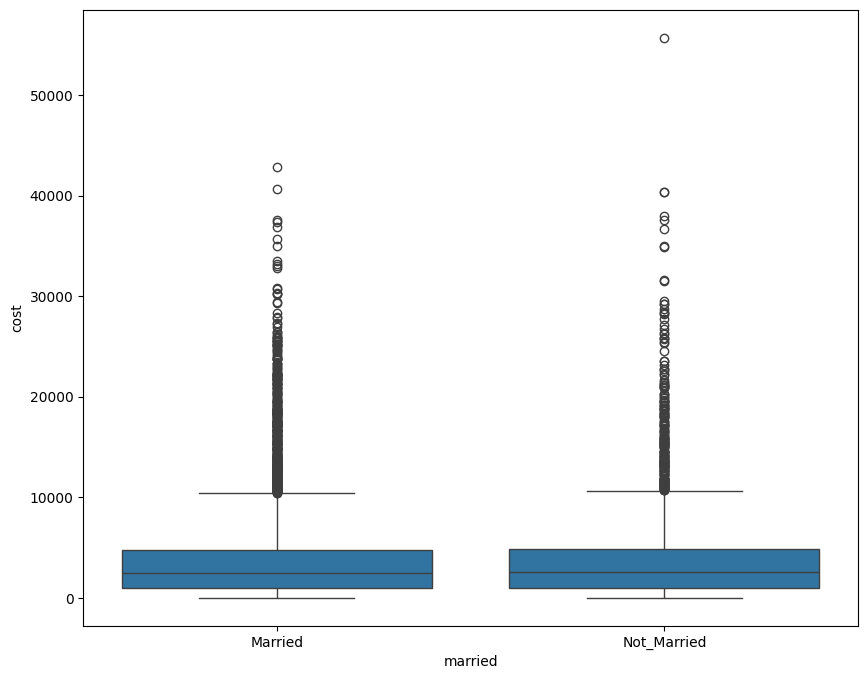

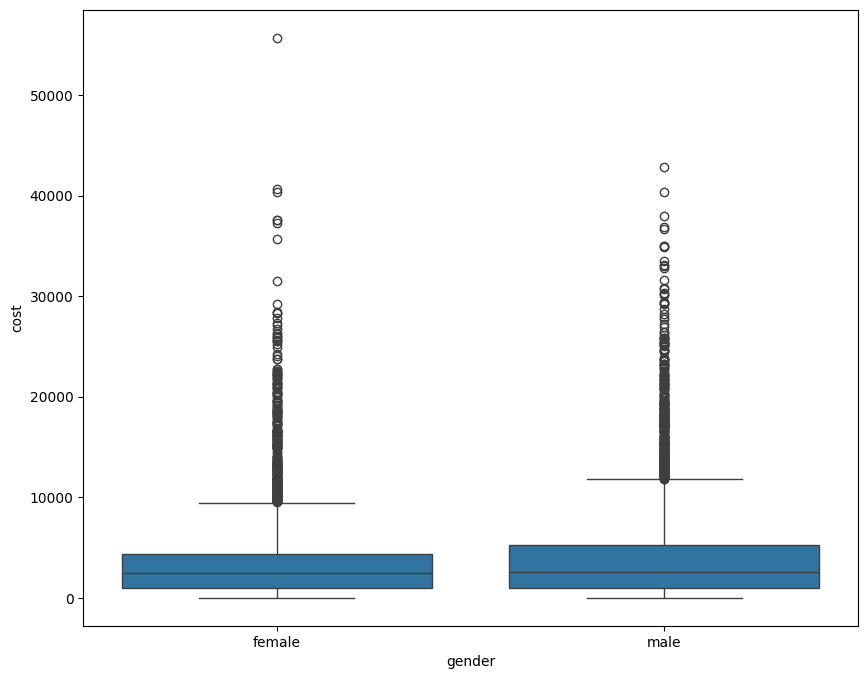

In [24]:
for i in df_cat.columns:
    sns.boxplot(x=i,y='cost',data=df)
    plt.xlabel(i)
    plt.ylabel('cost')
    plt.show()

### Bar Plots

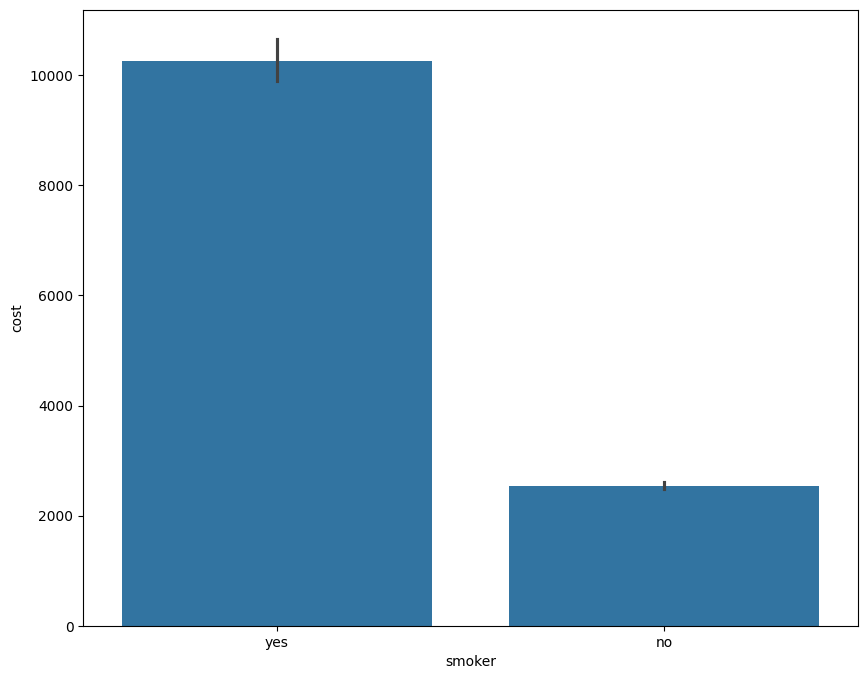

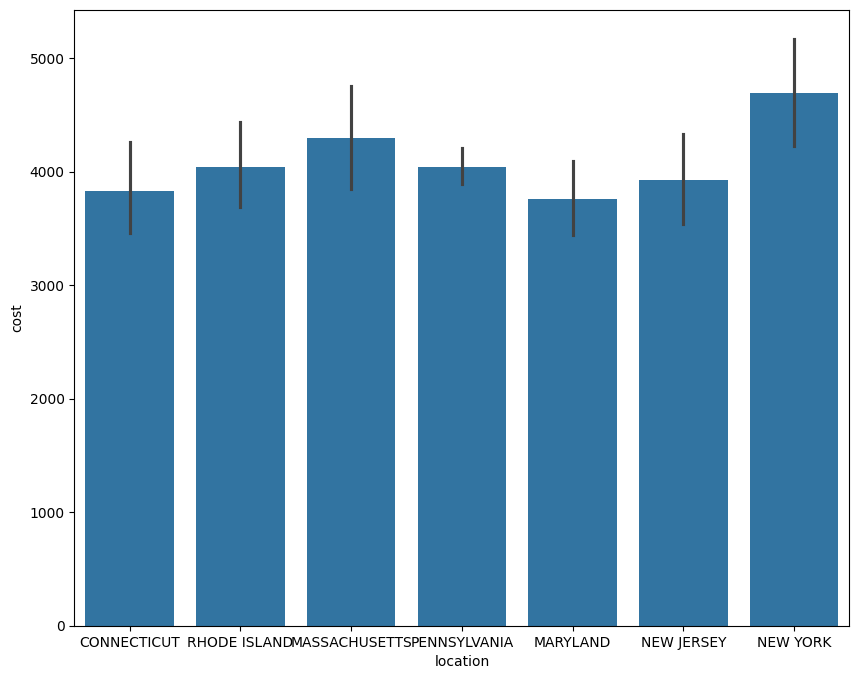

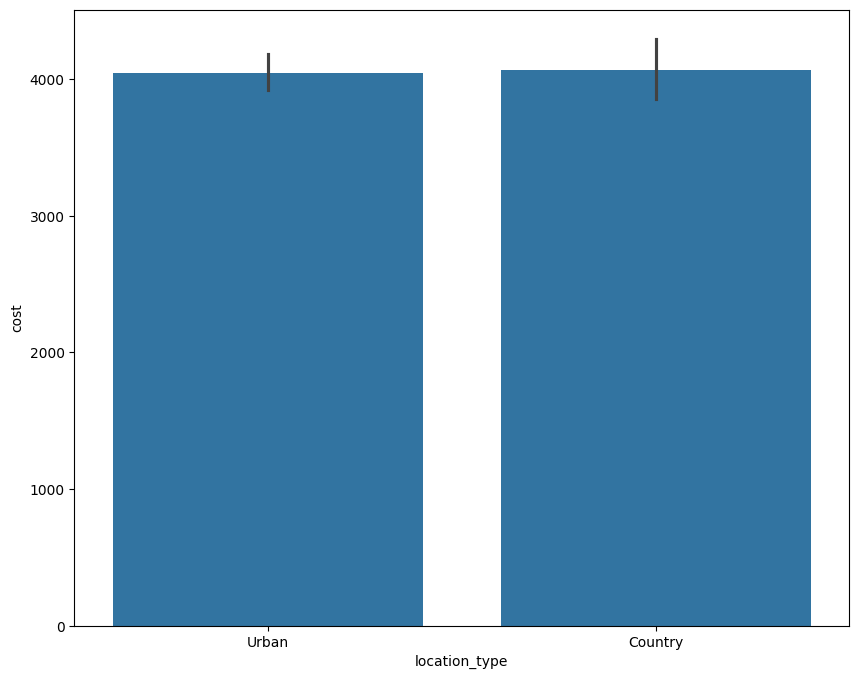

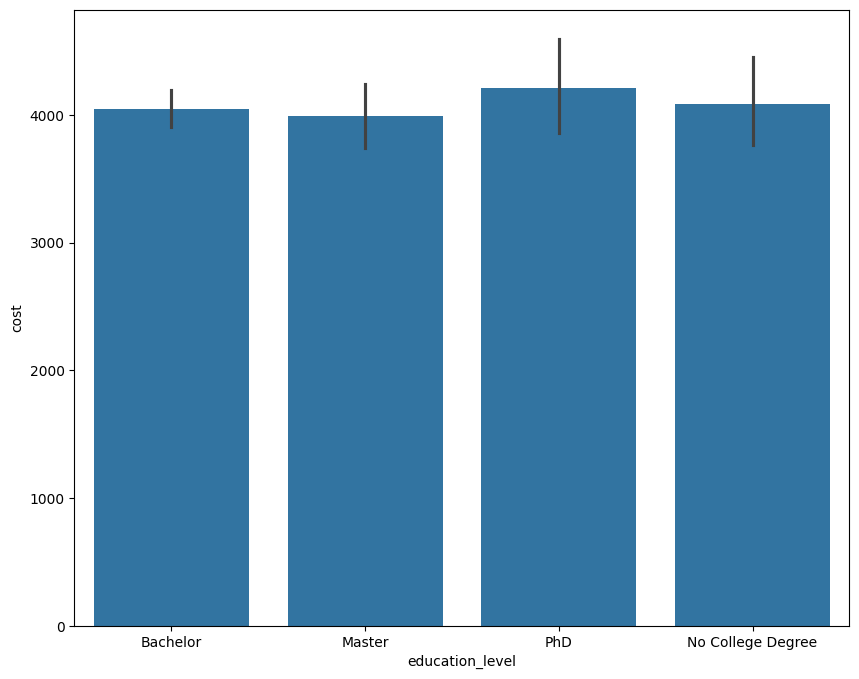

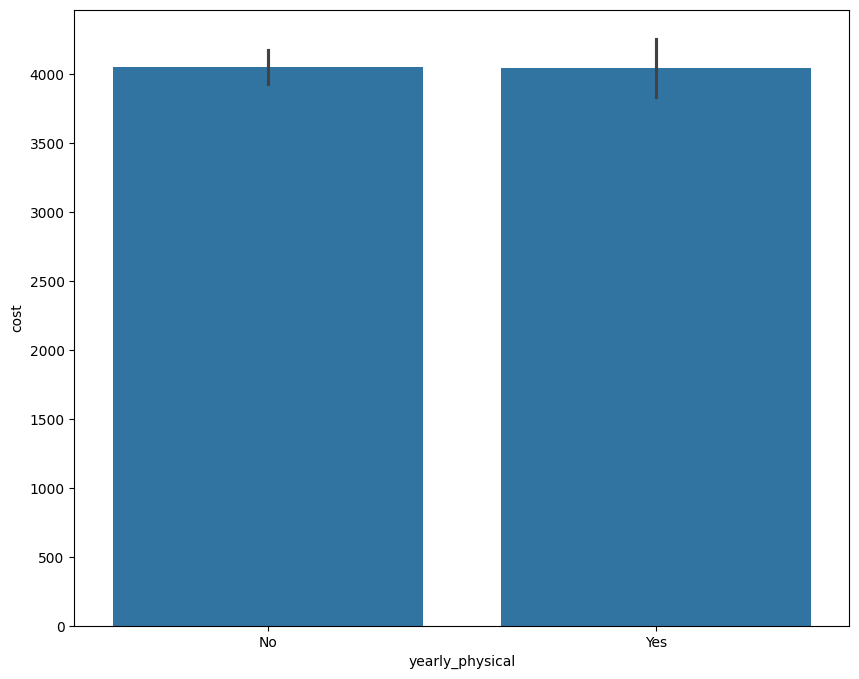

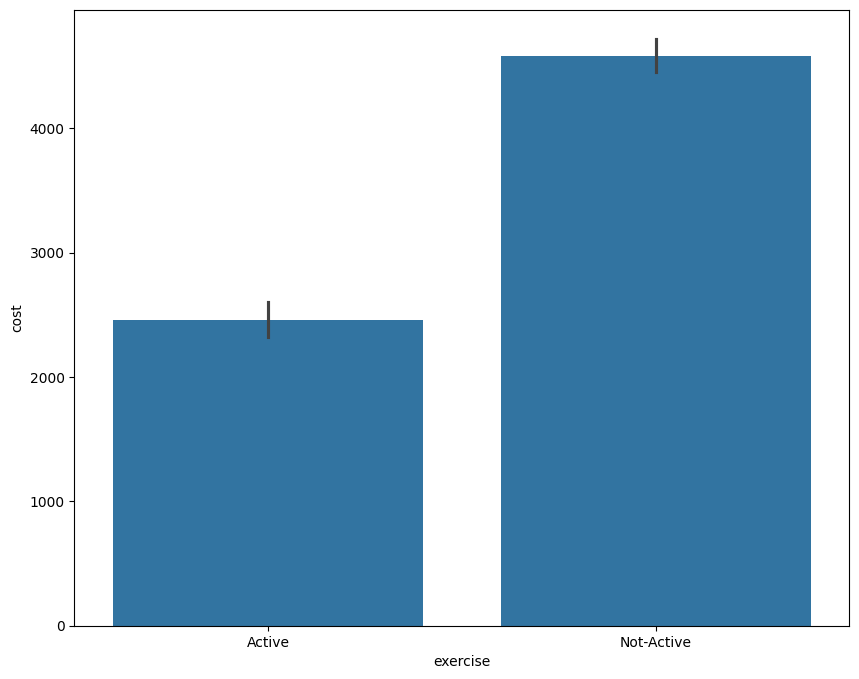

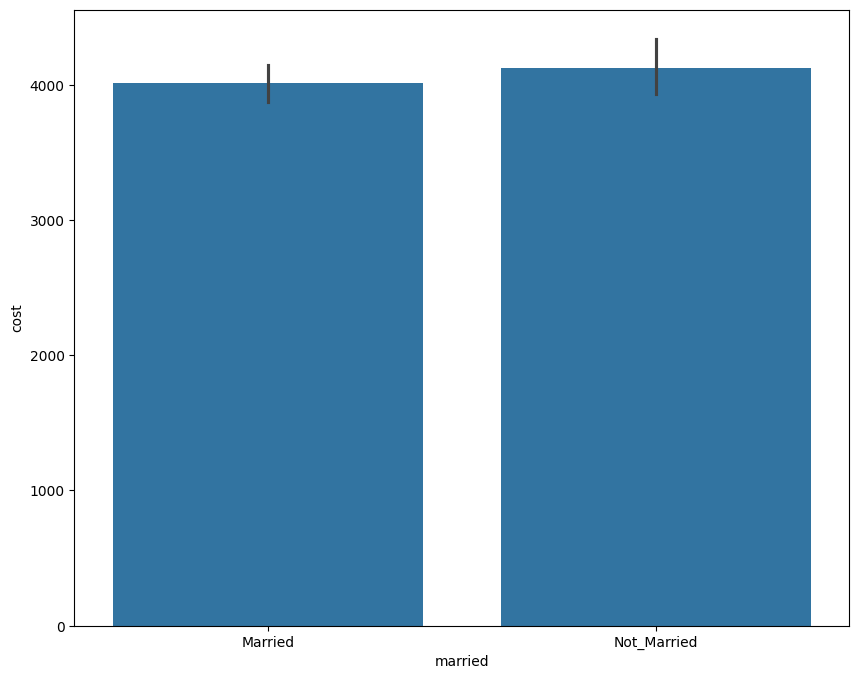

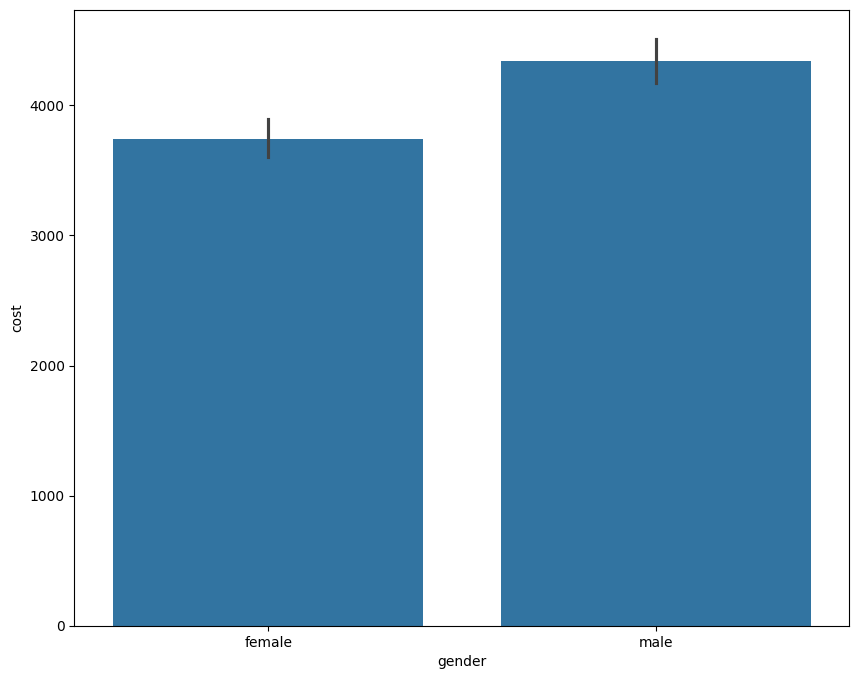

In [25]:
for i in df_cat.columns:
    sns.barplot(x=i,y='cost',data=df)
    plt.xlabel(i)
    plt.ylabel('cost')
    plt.show()

### Violin Plots

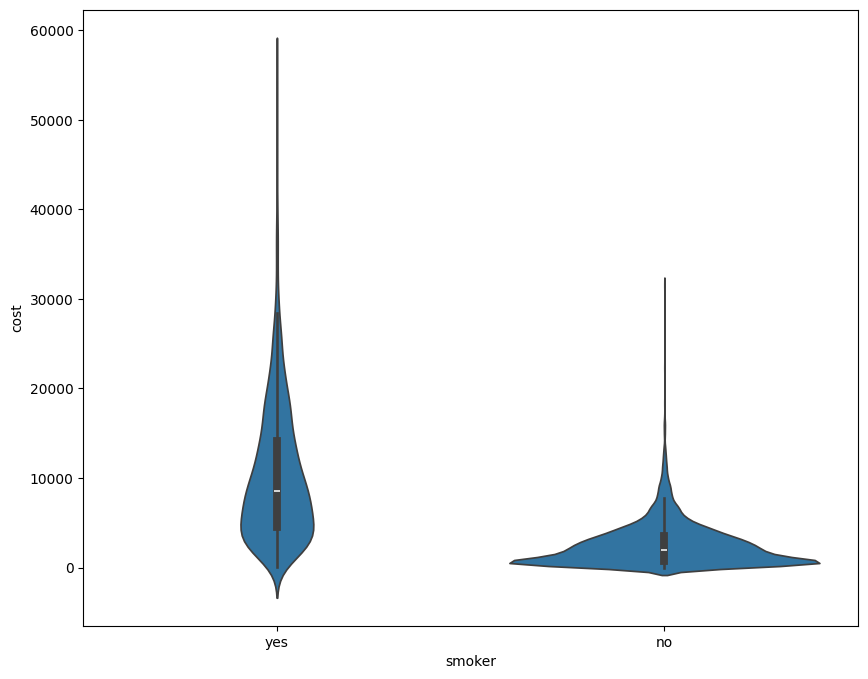

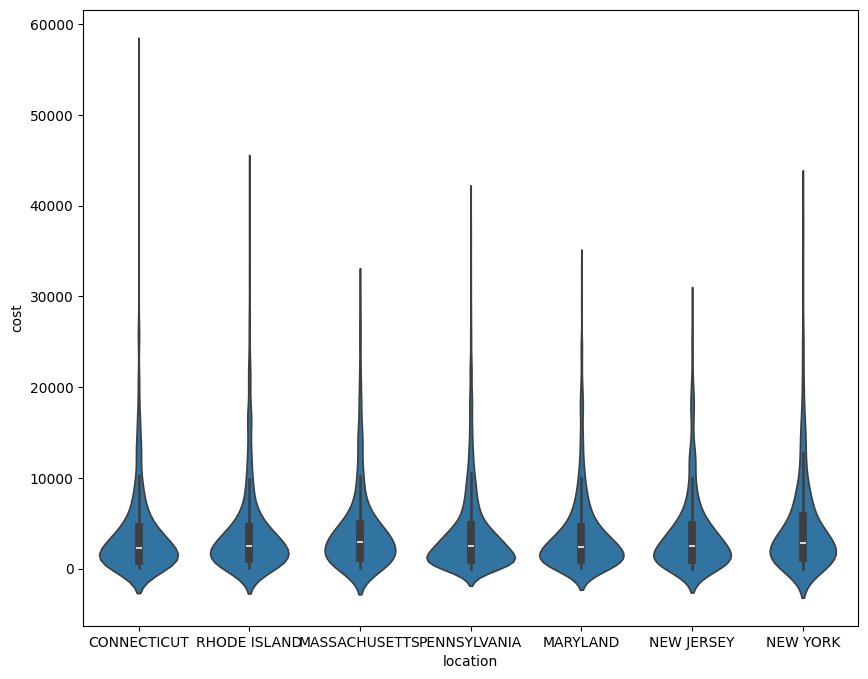

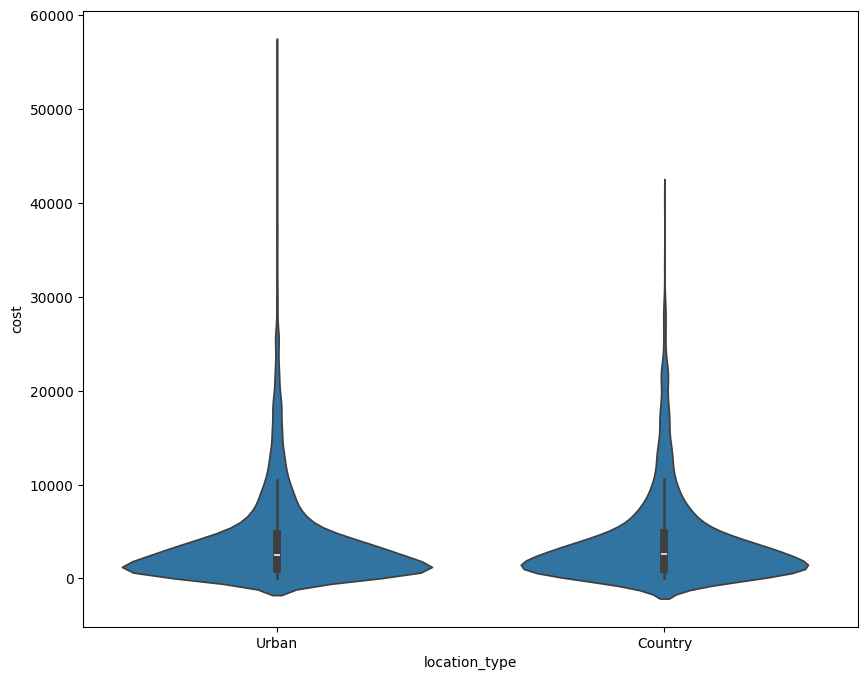

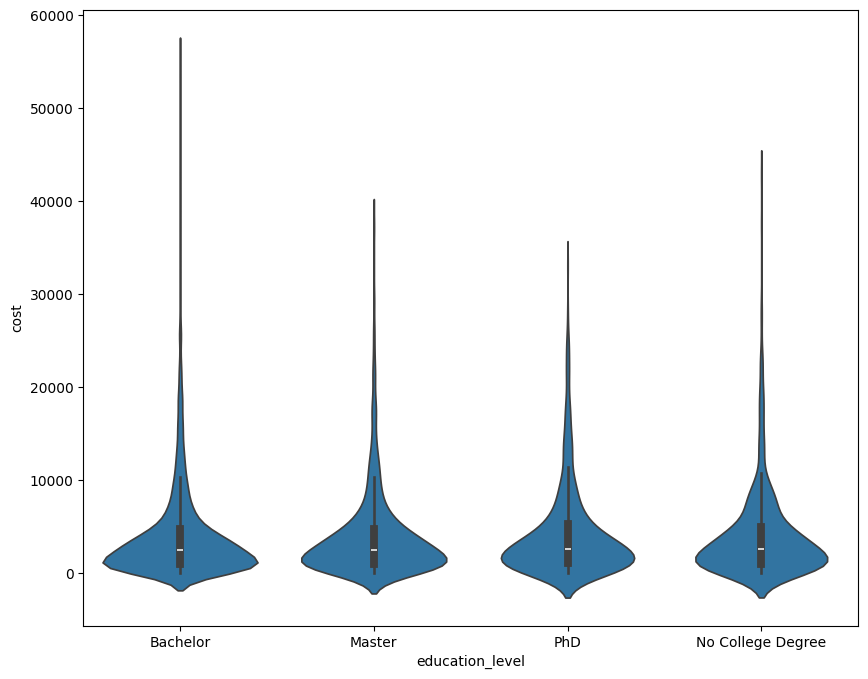

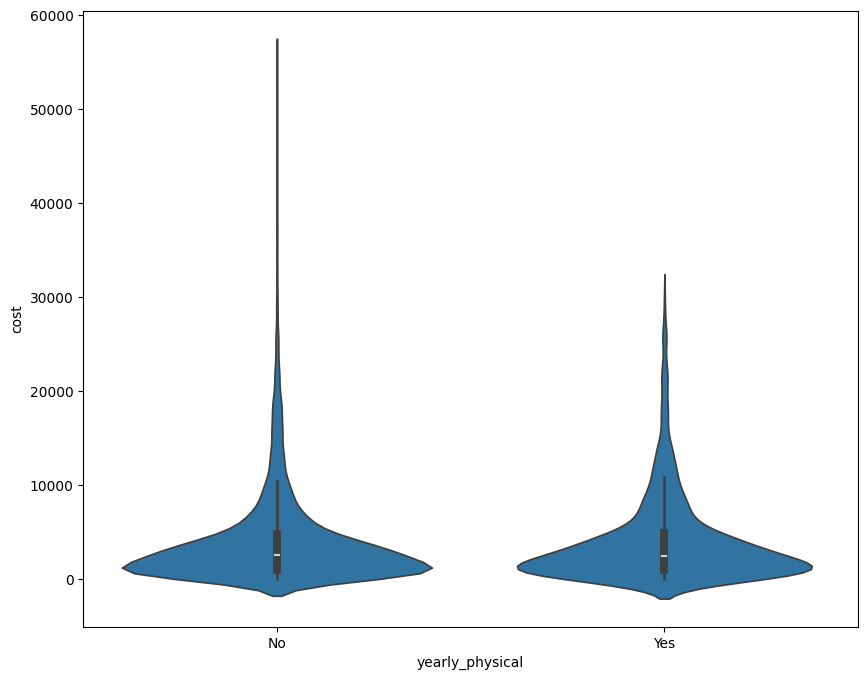

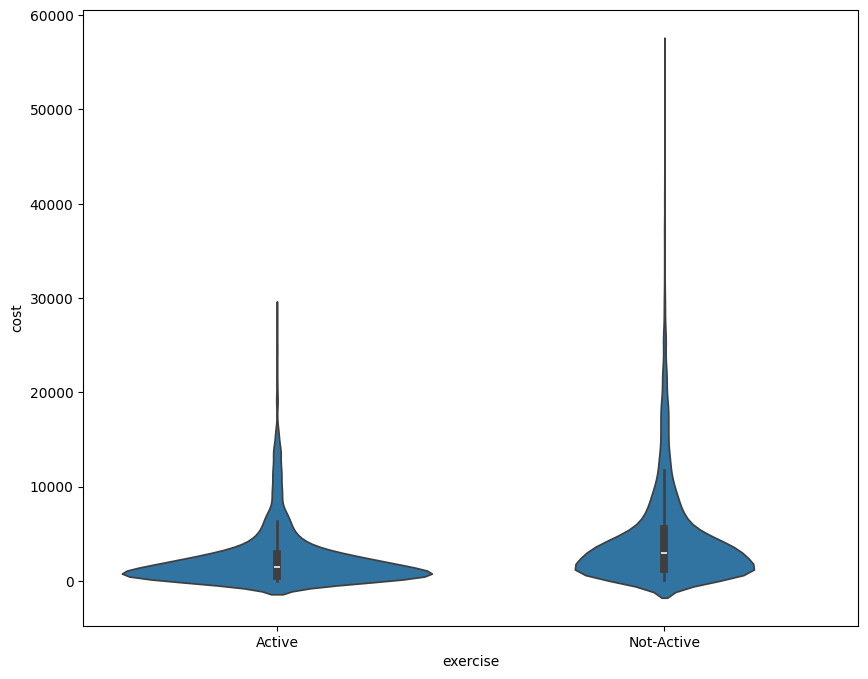

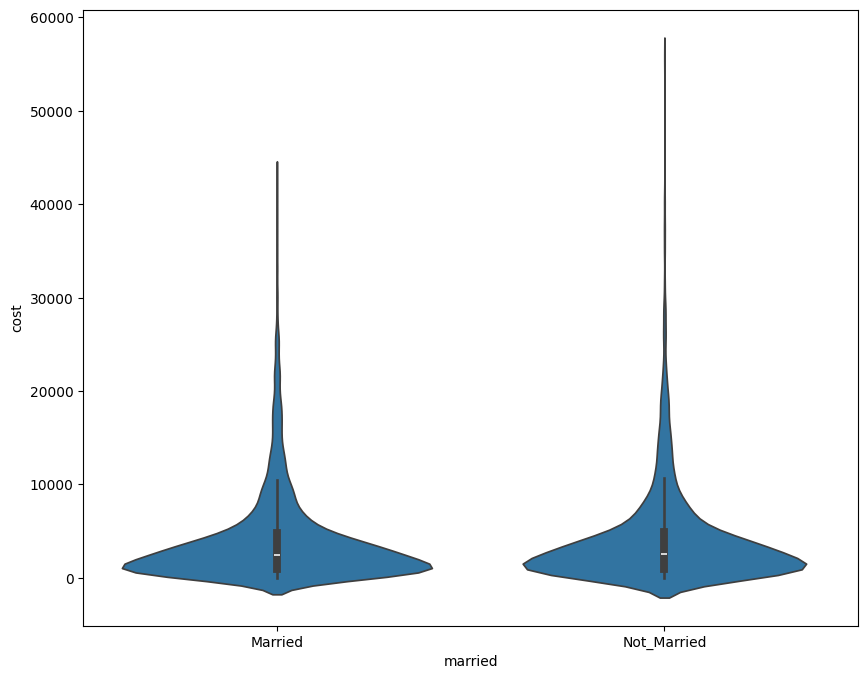

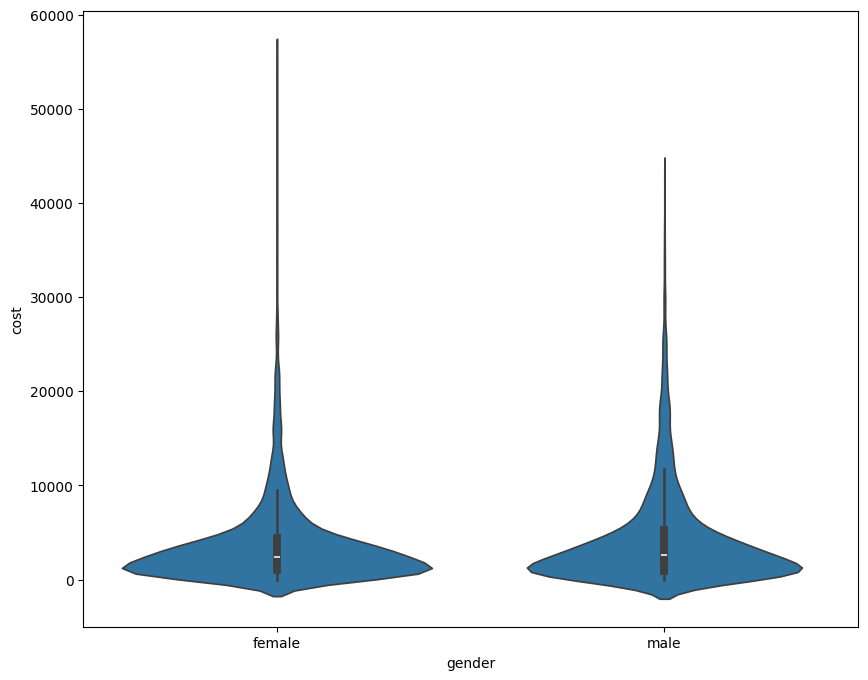

In [26]:
for i in df_cat.columns:
    sns.violinplot(x=i,y='cost',data=df)
    plt.xlabel(i)
    plt.ylabel('cost')
    plt.show()

### Multivariate Analysis:

### Numerical to Numerical:

scatterplot with hue:

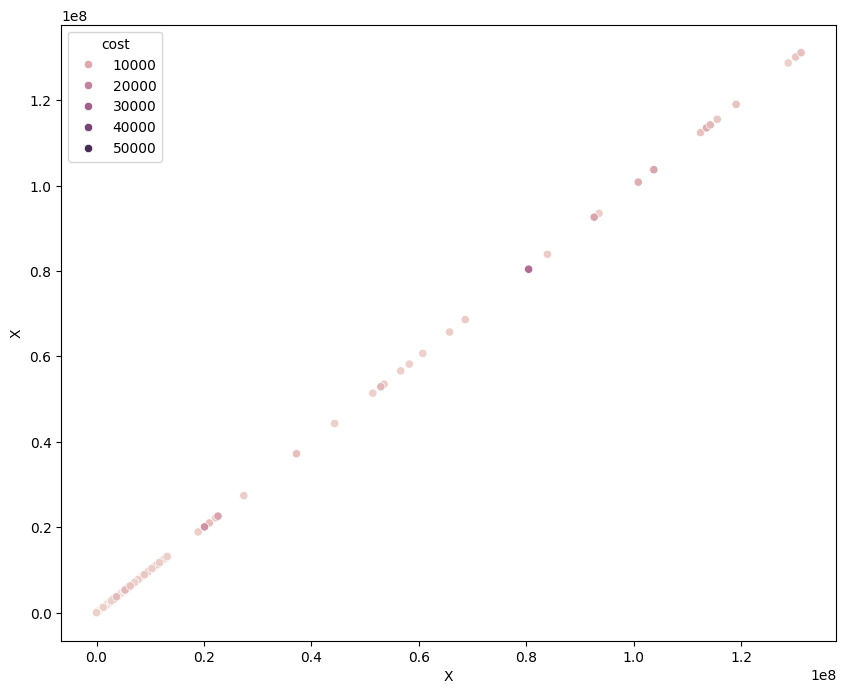

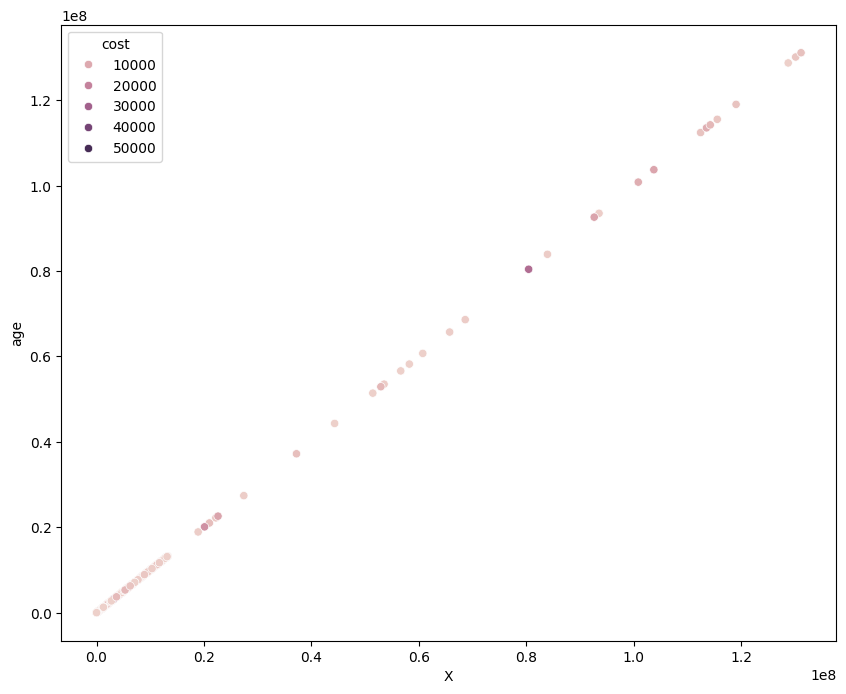

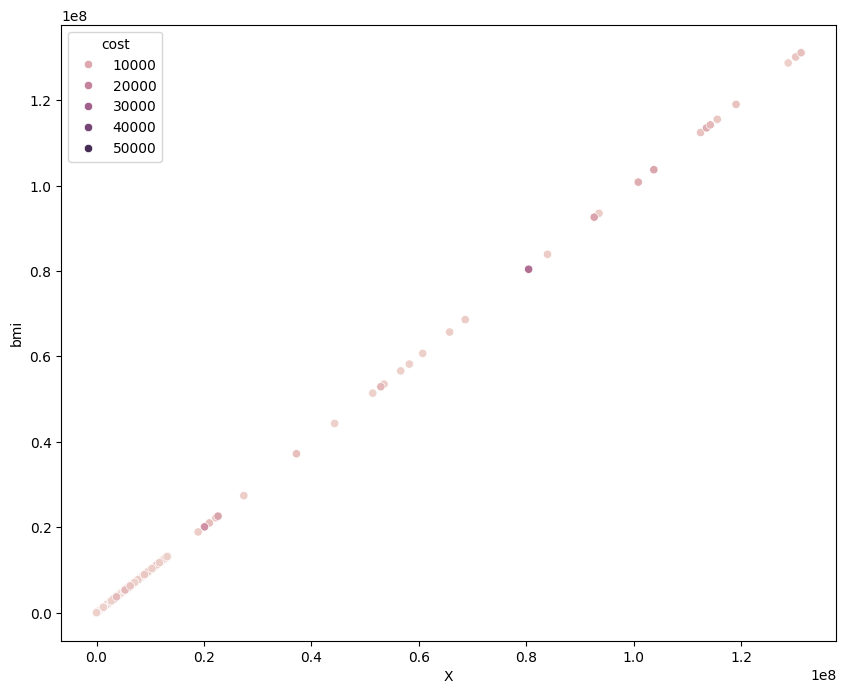

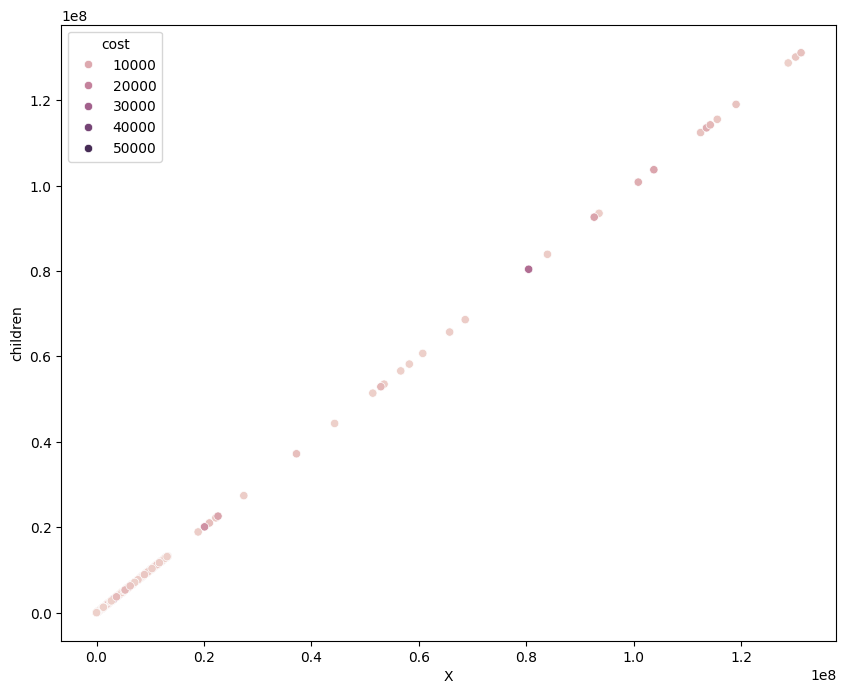

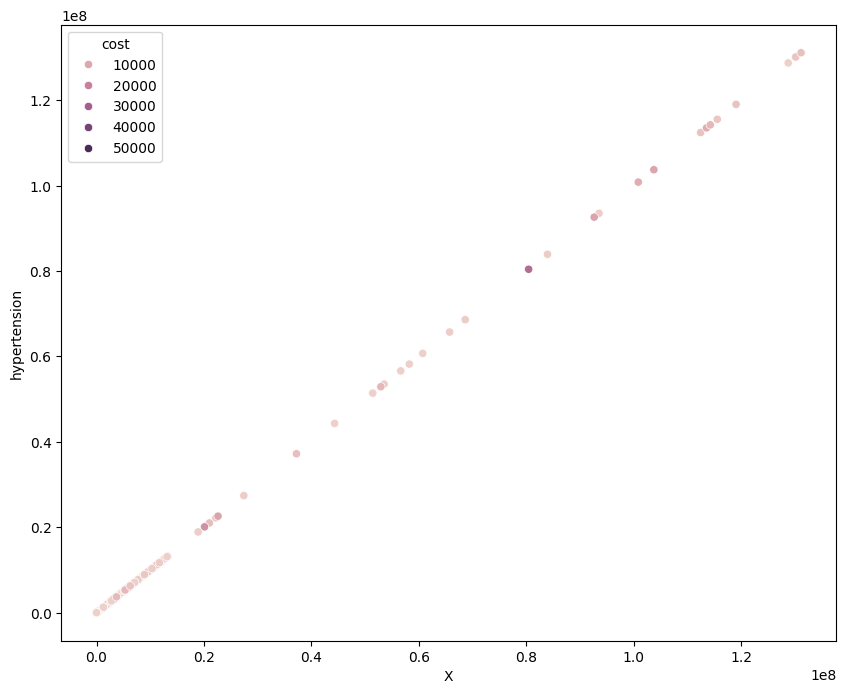

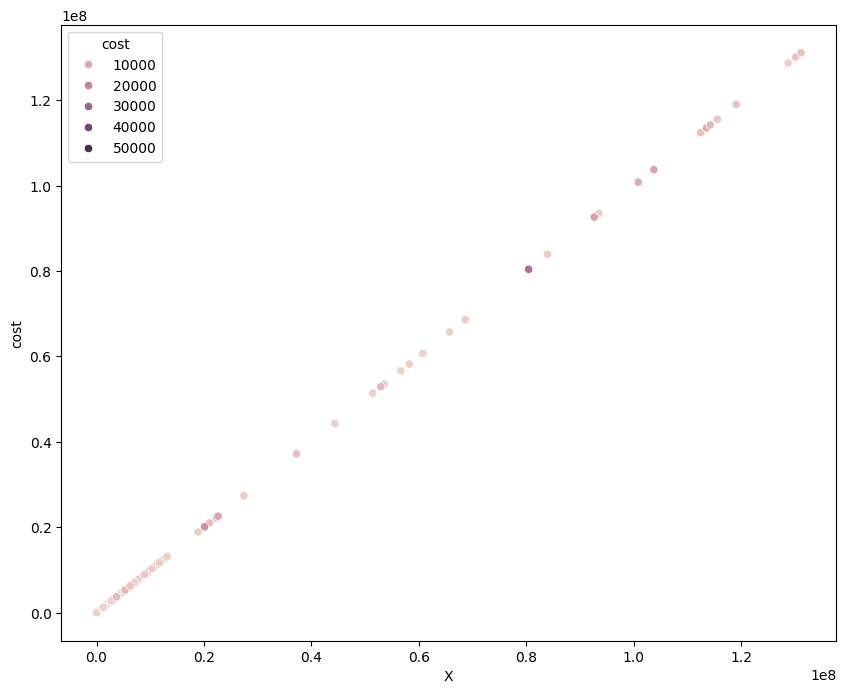

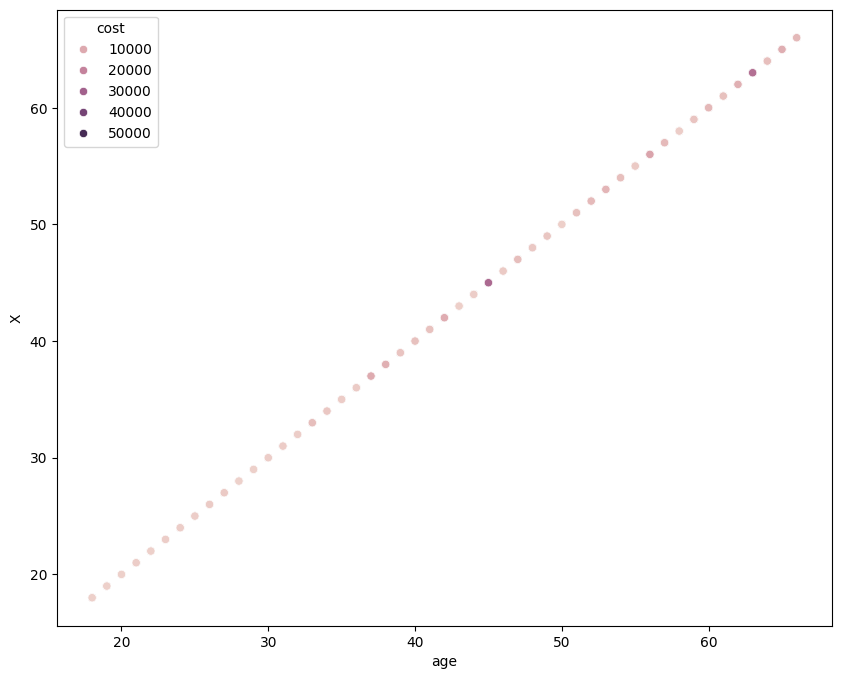

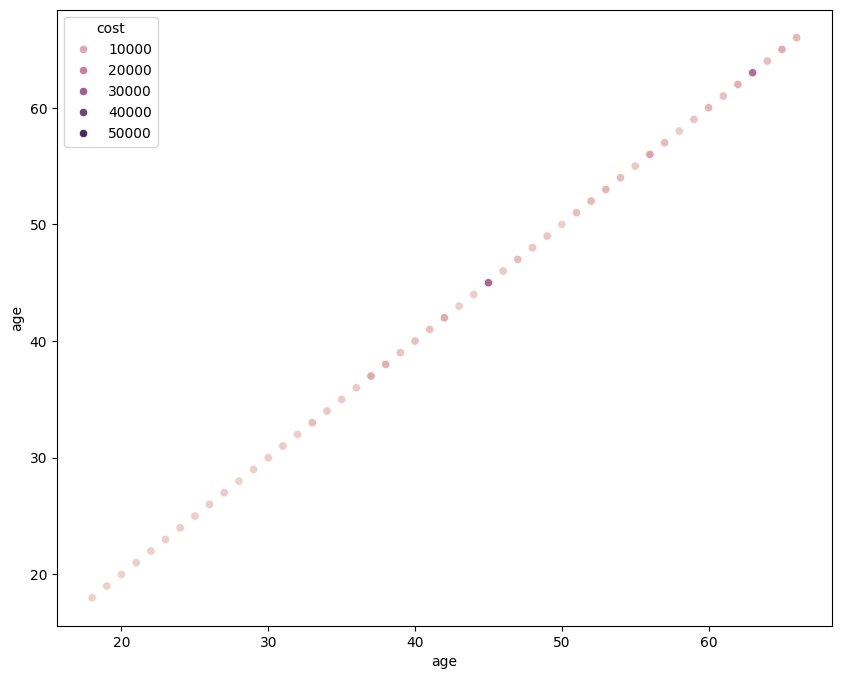

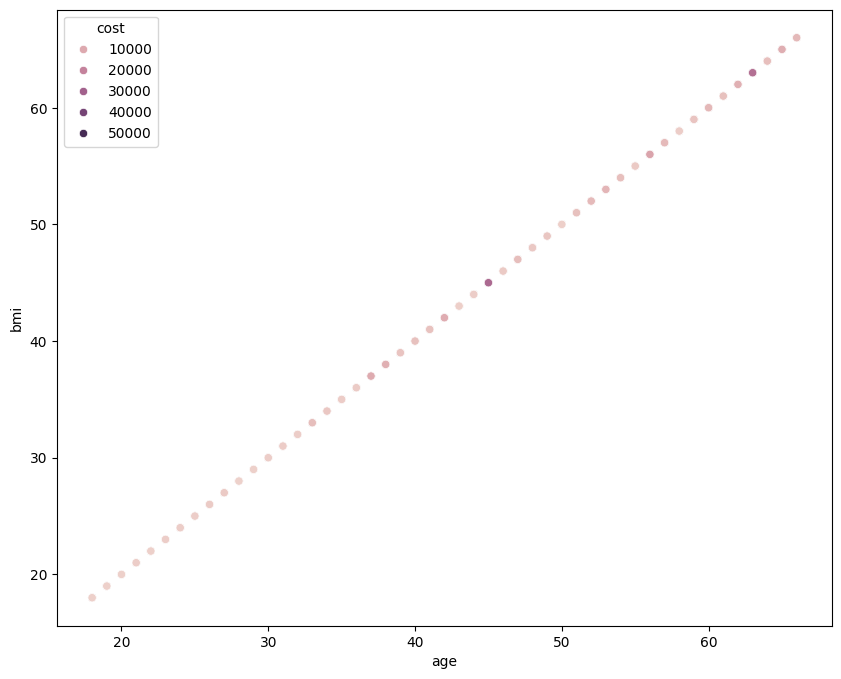

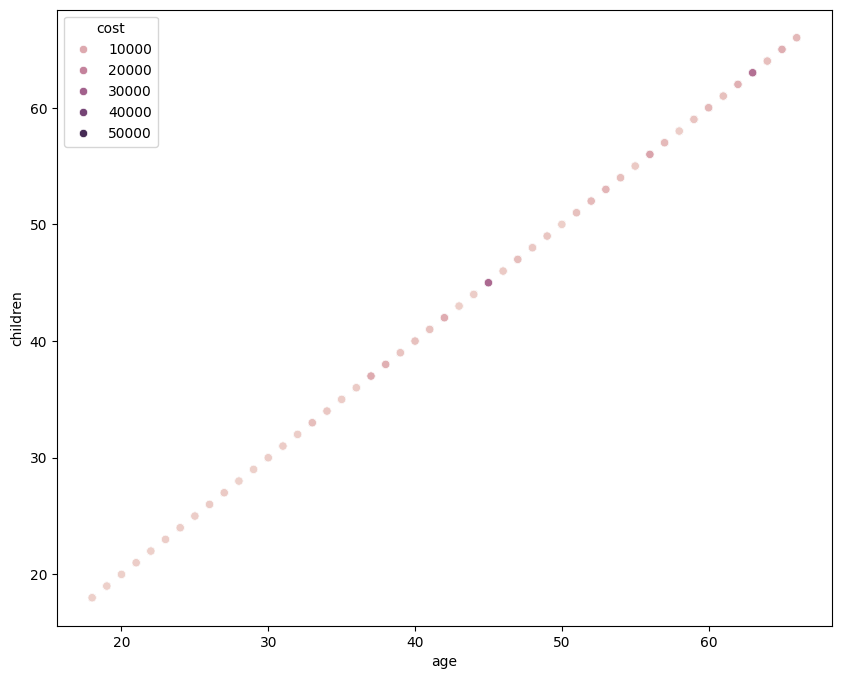

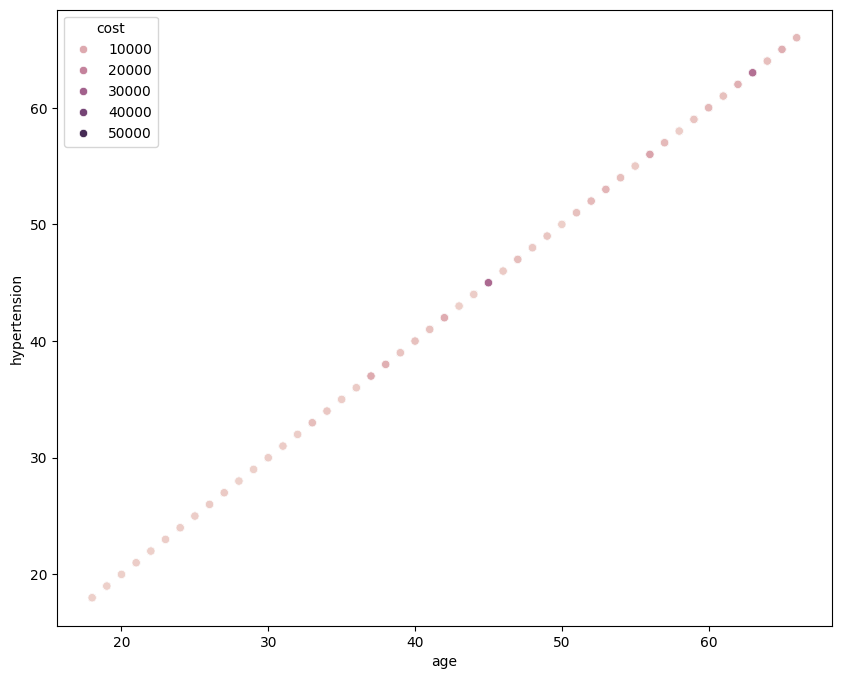

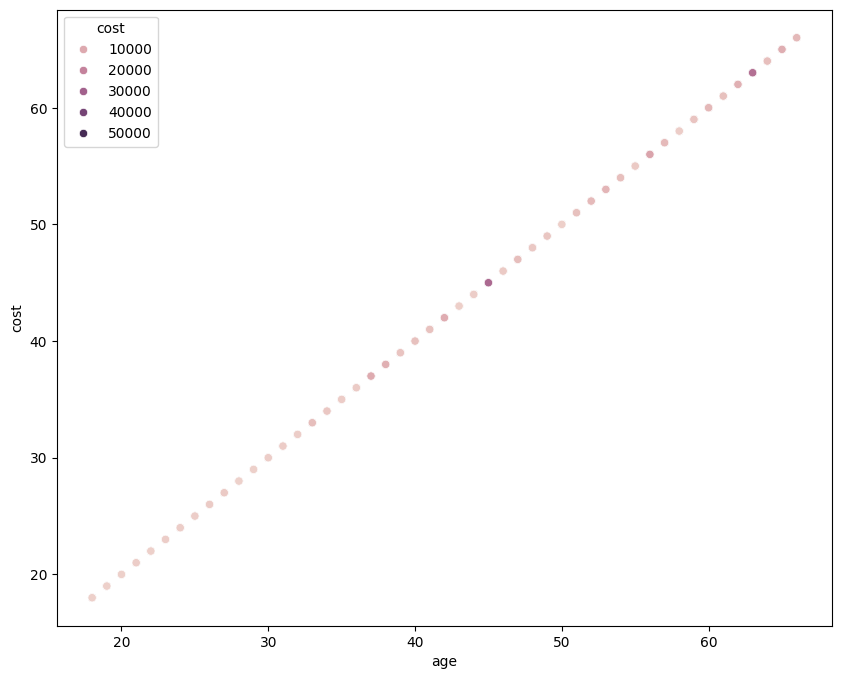

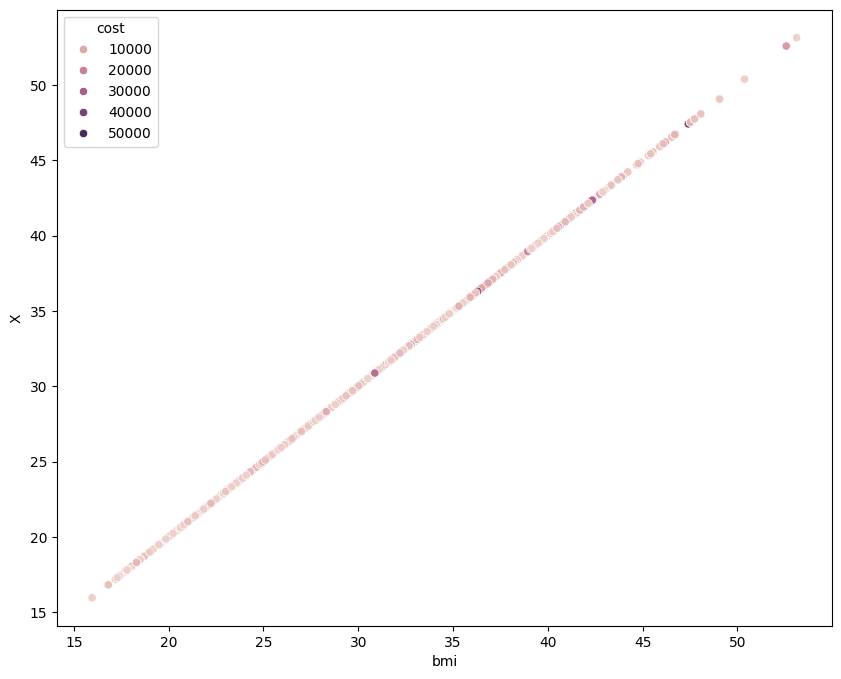

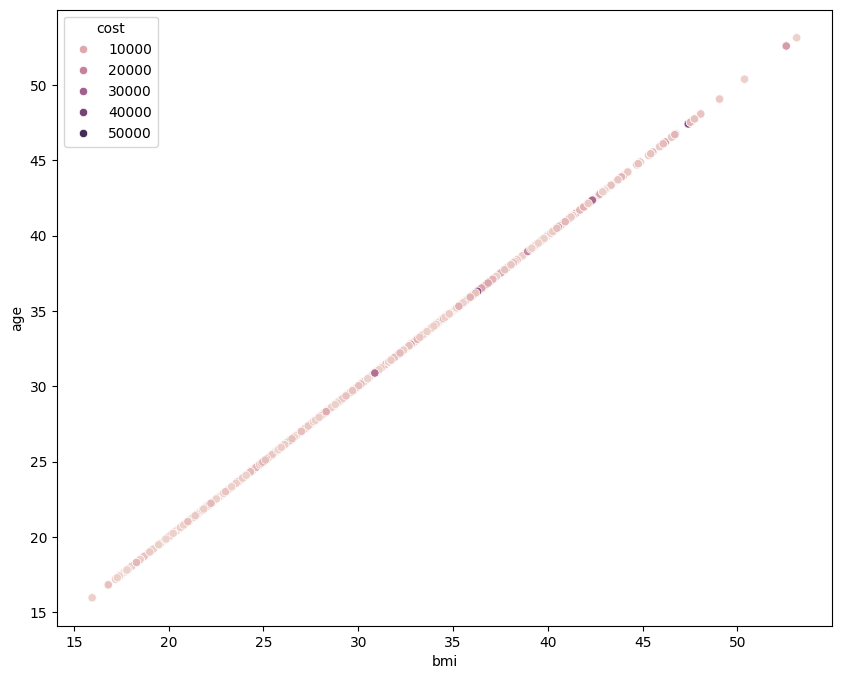

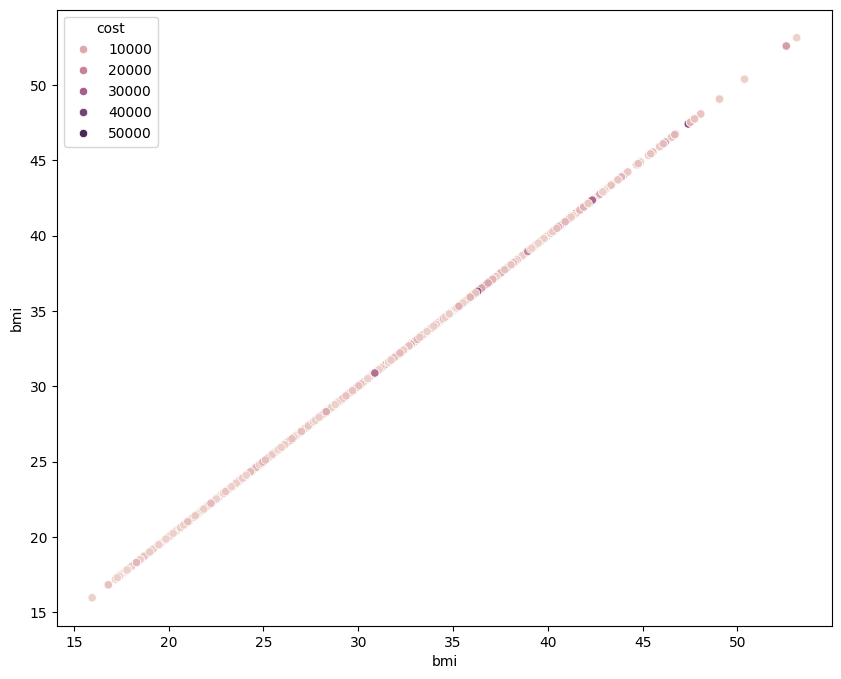

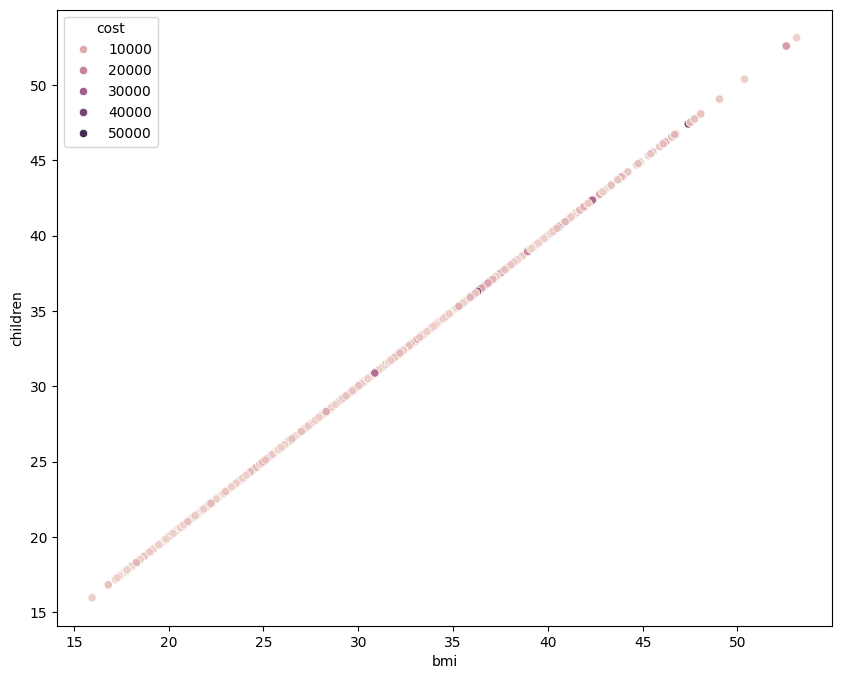

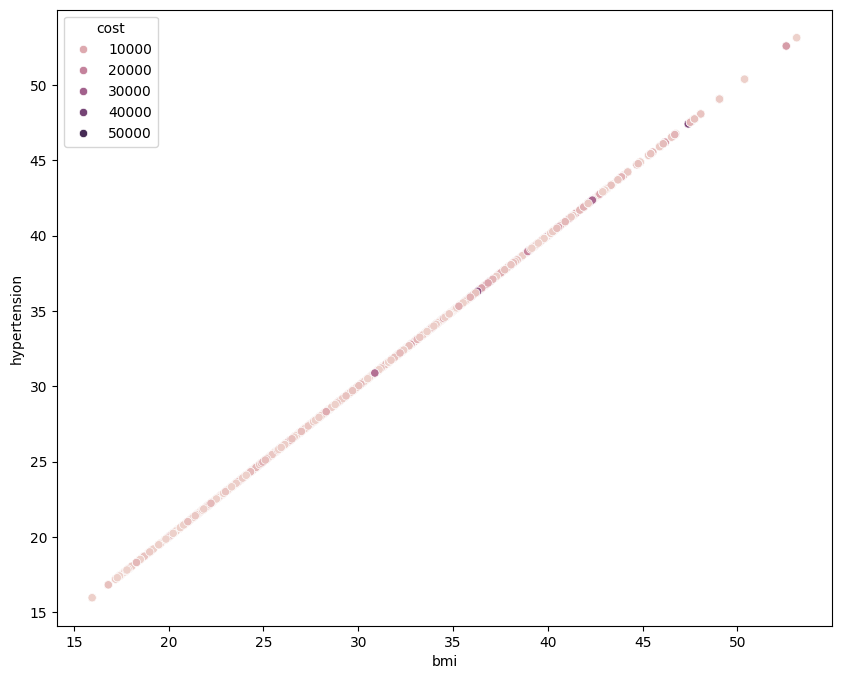

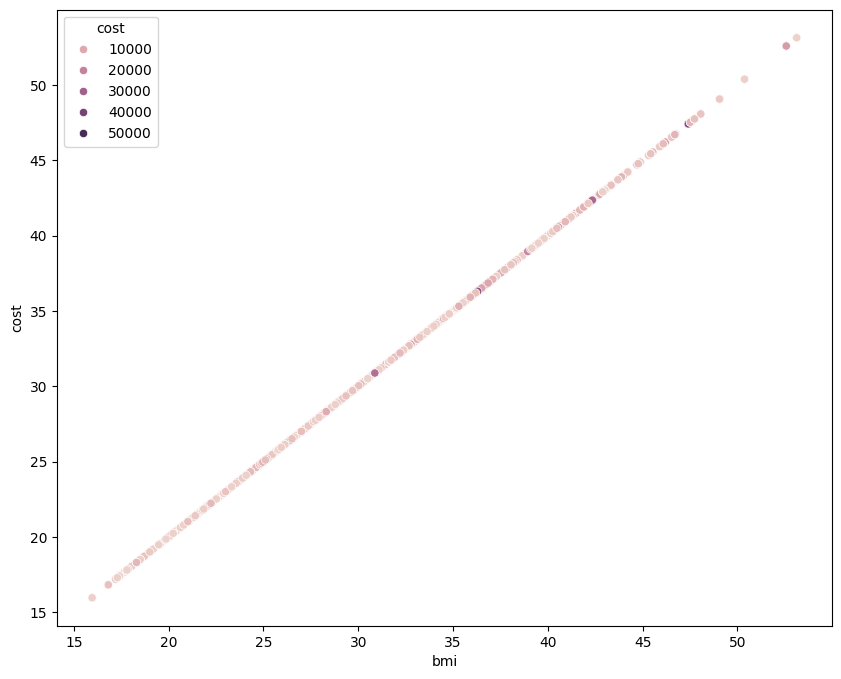

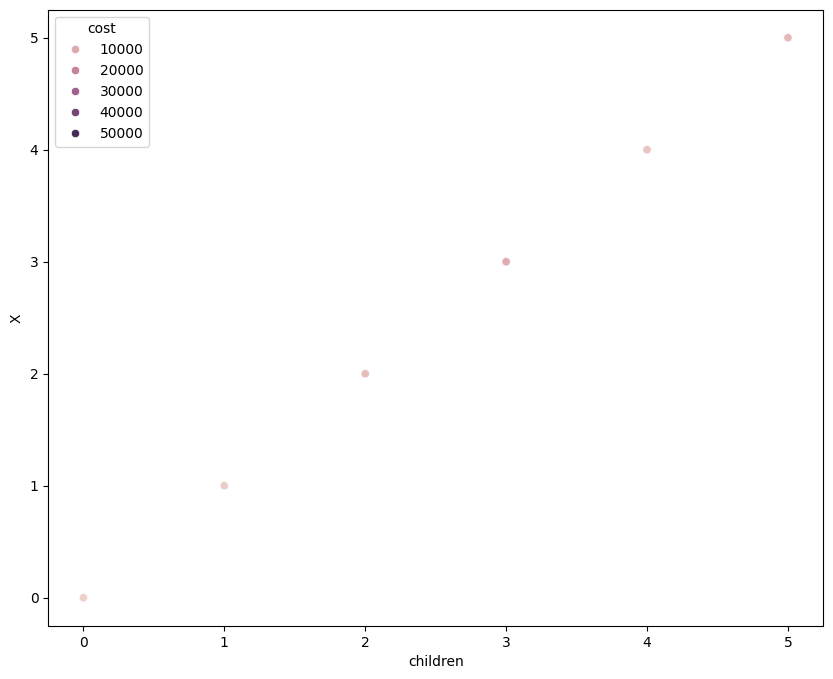

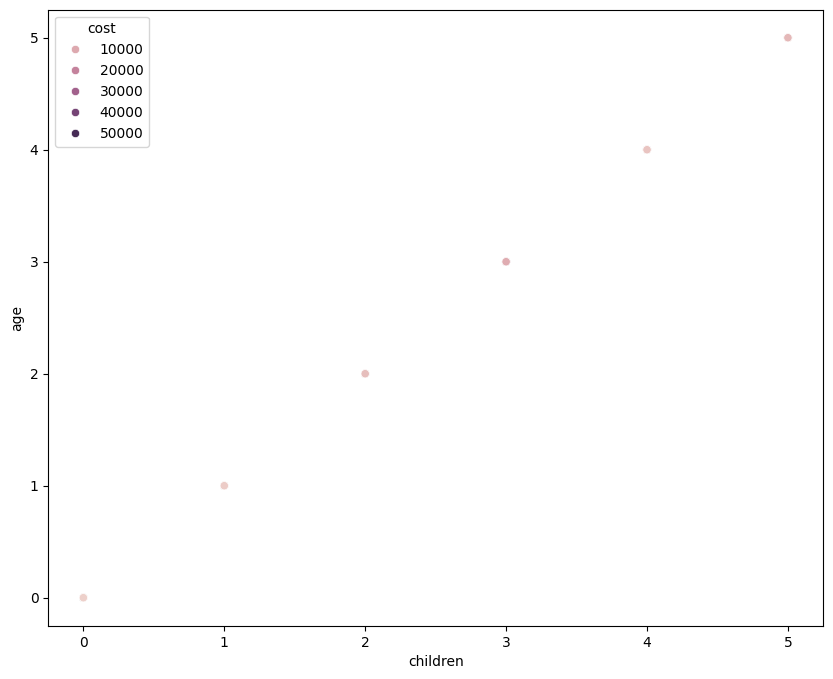

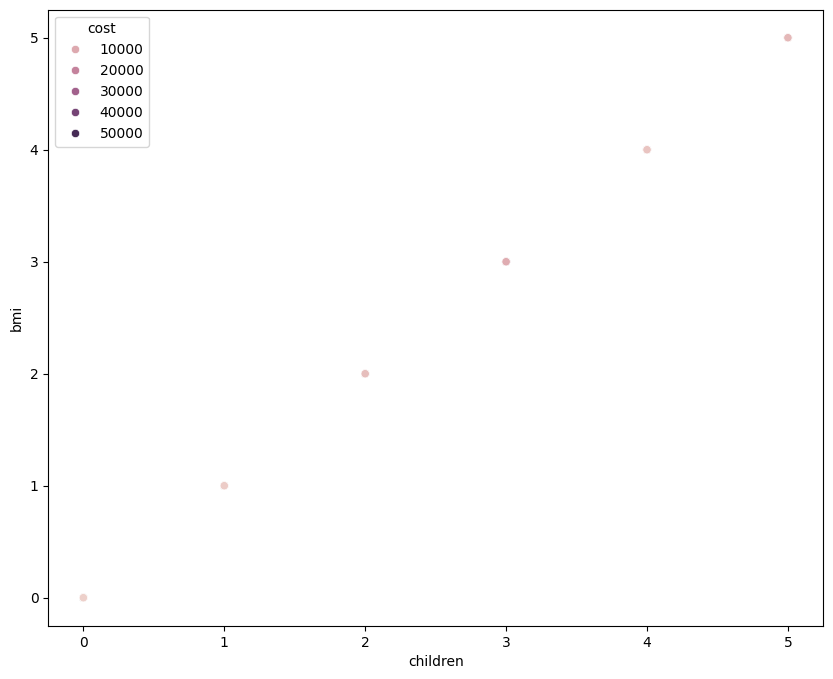

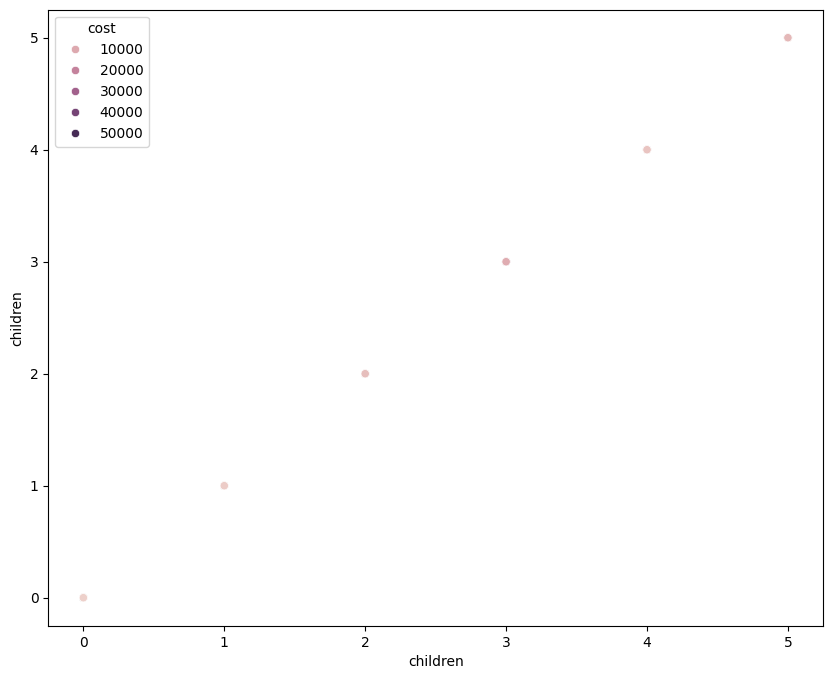

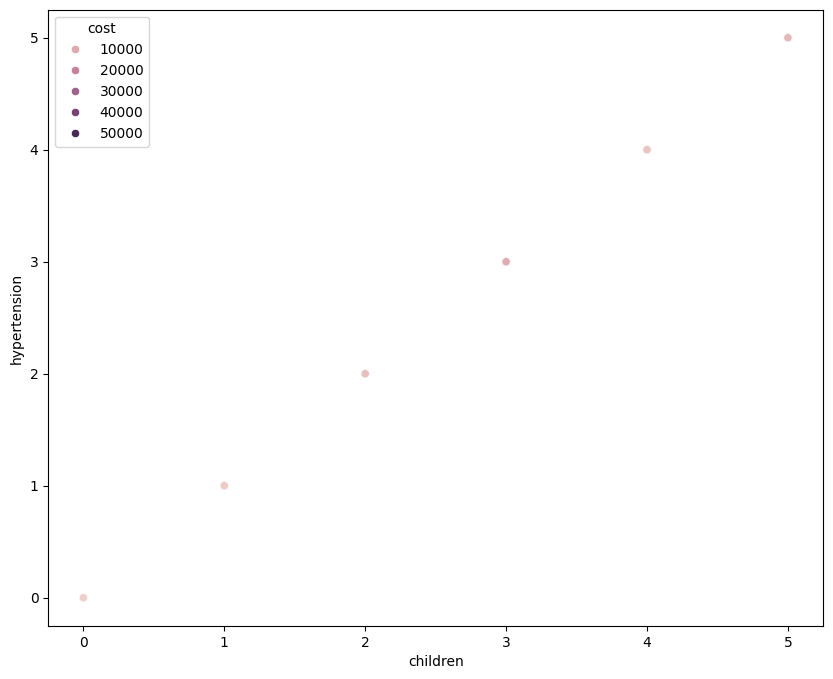

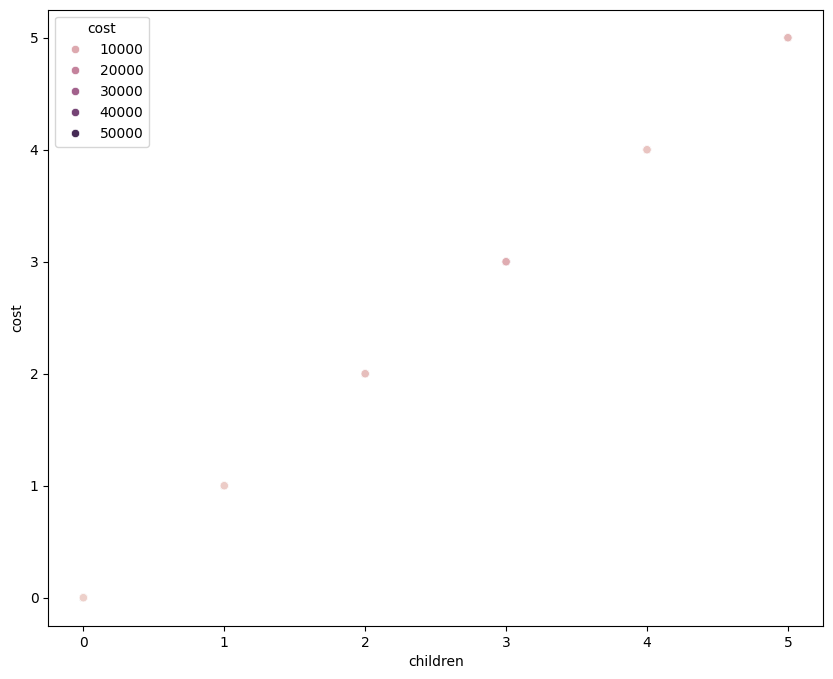

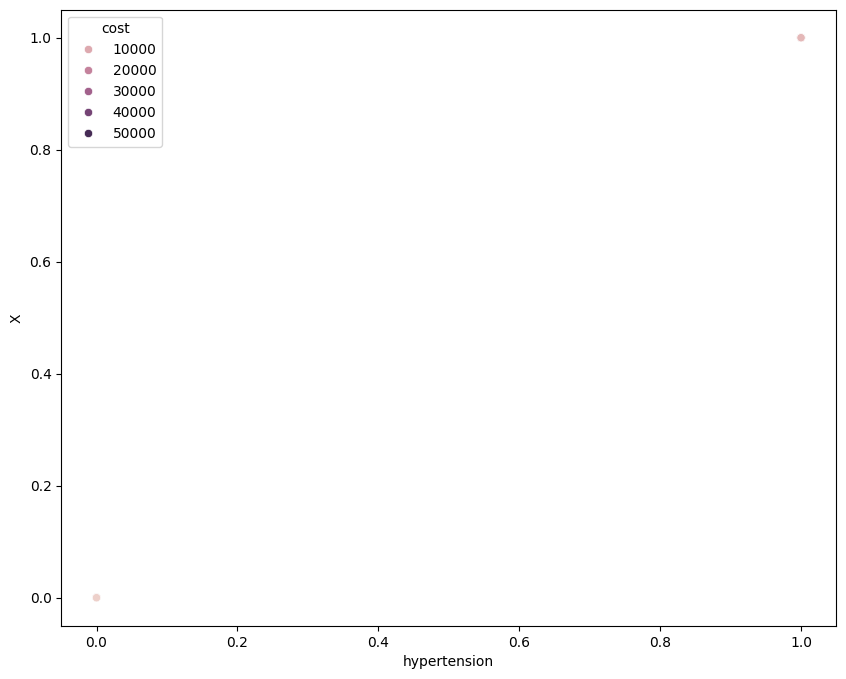

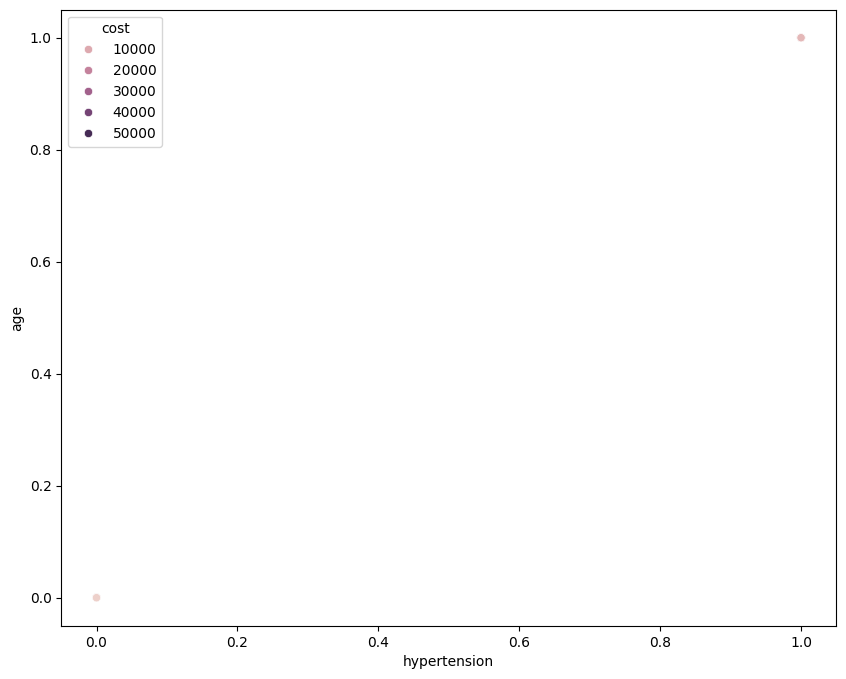

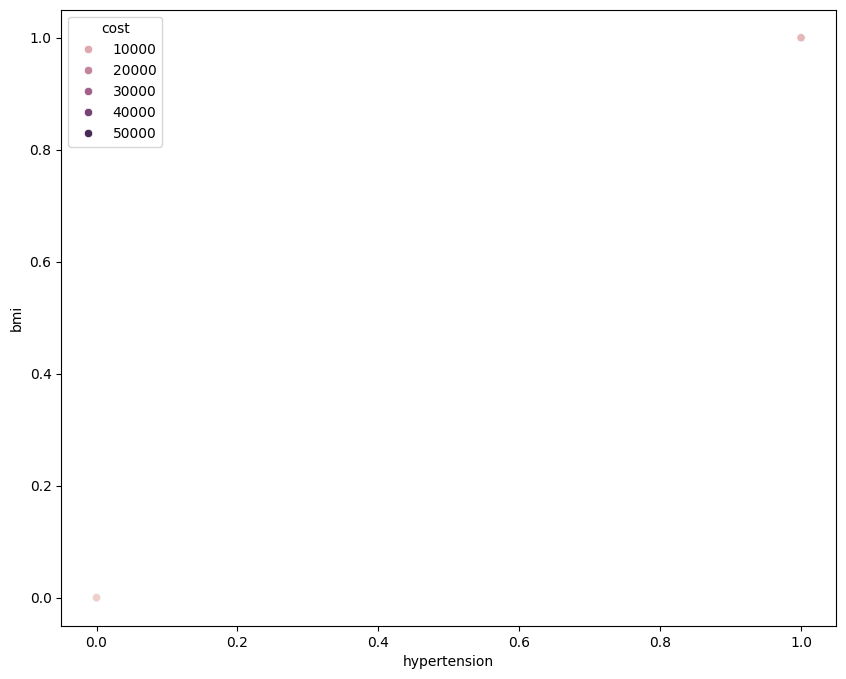

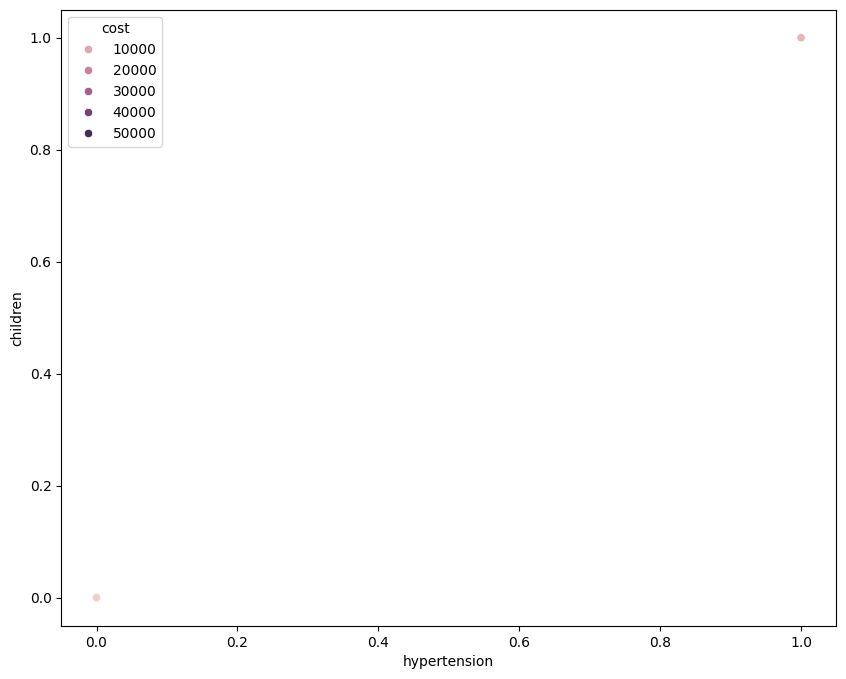

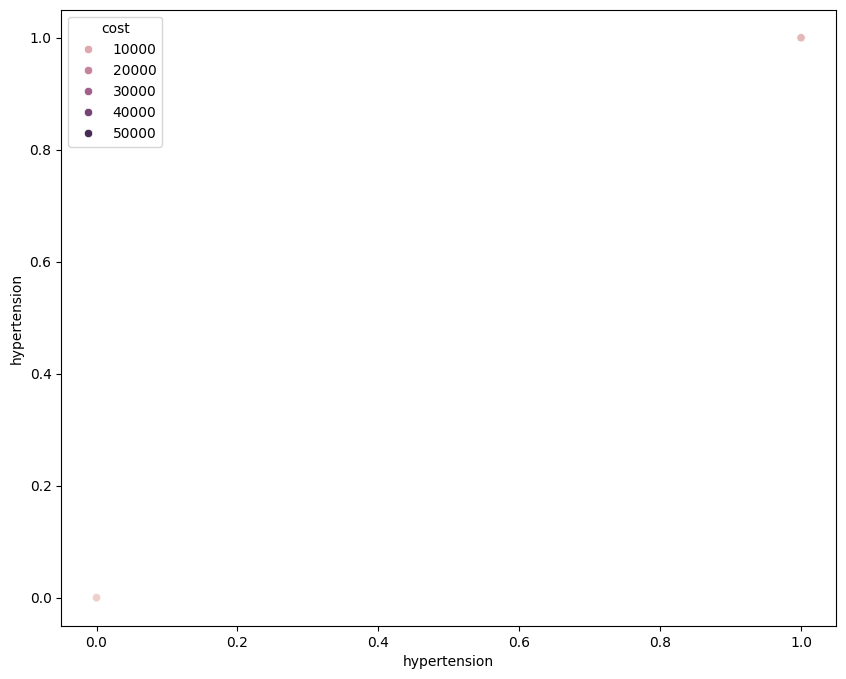

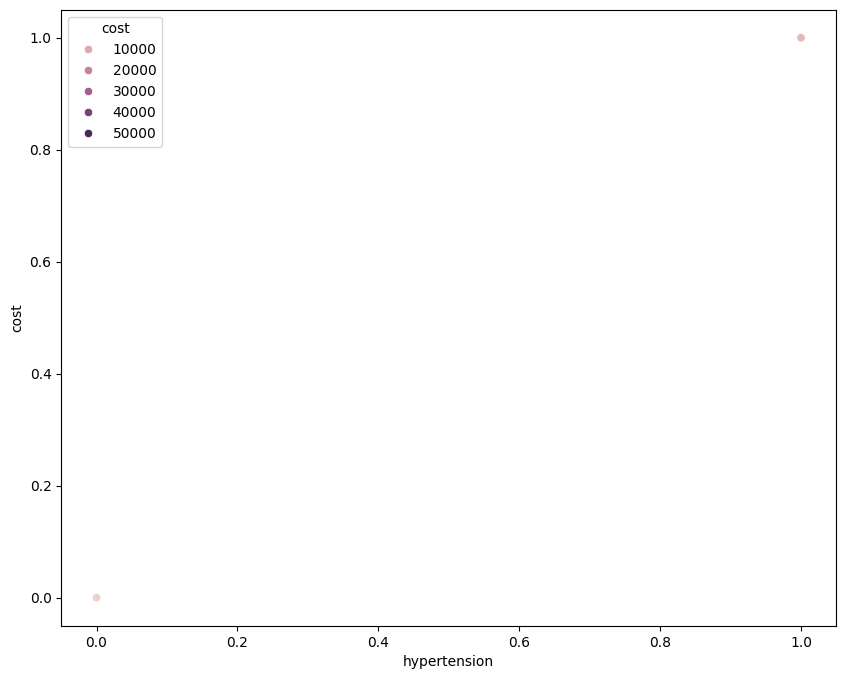

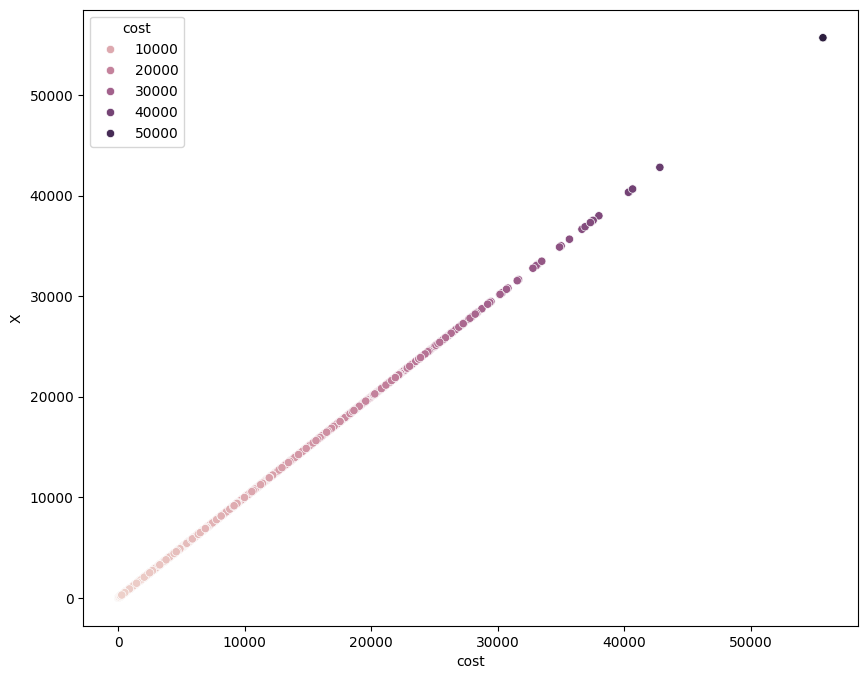

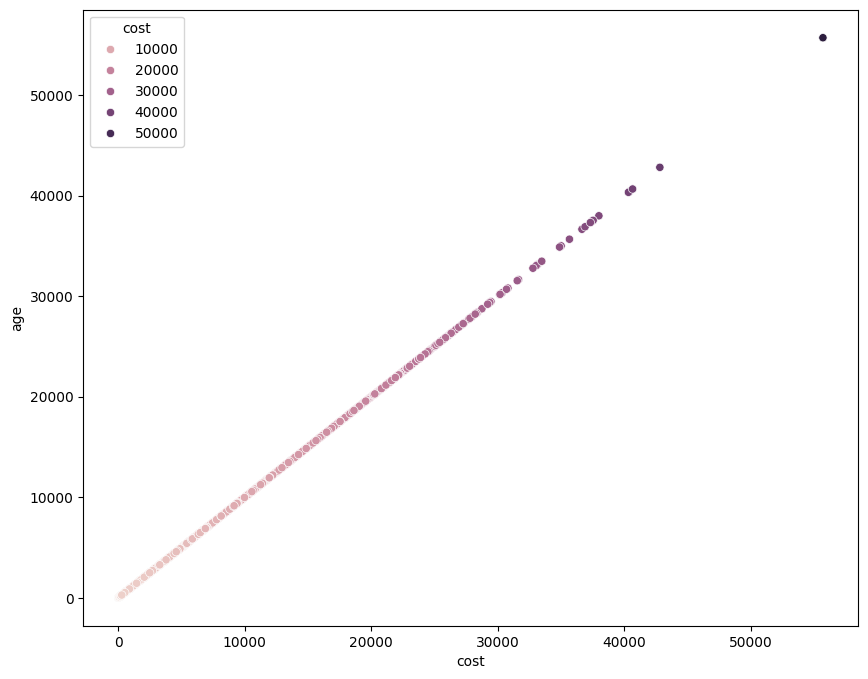

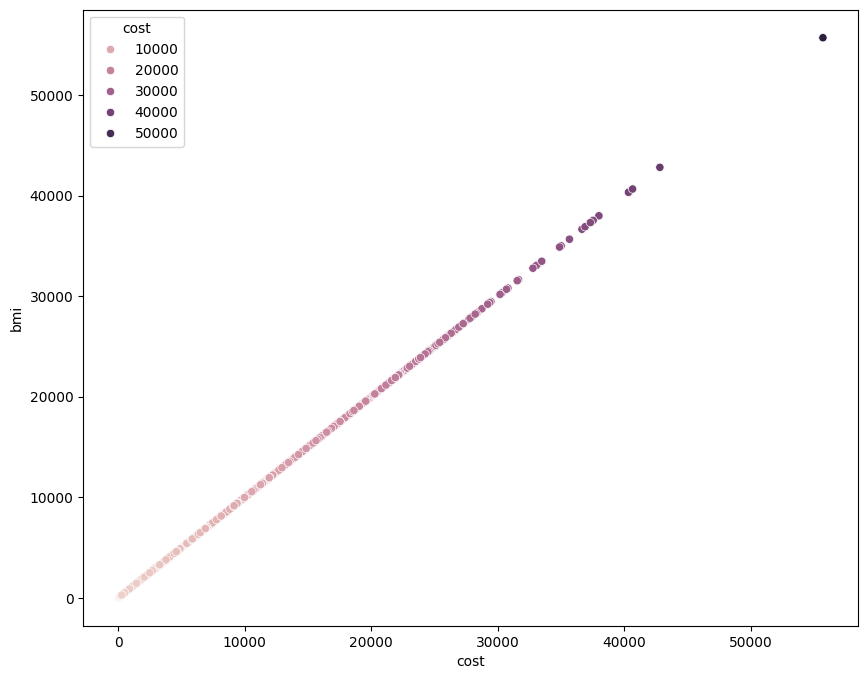

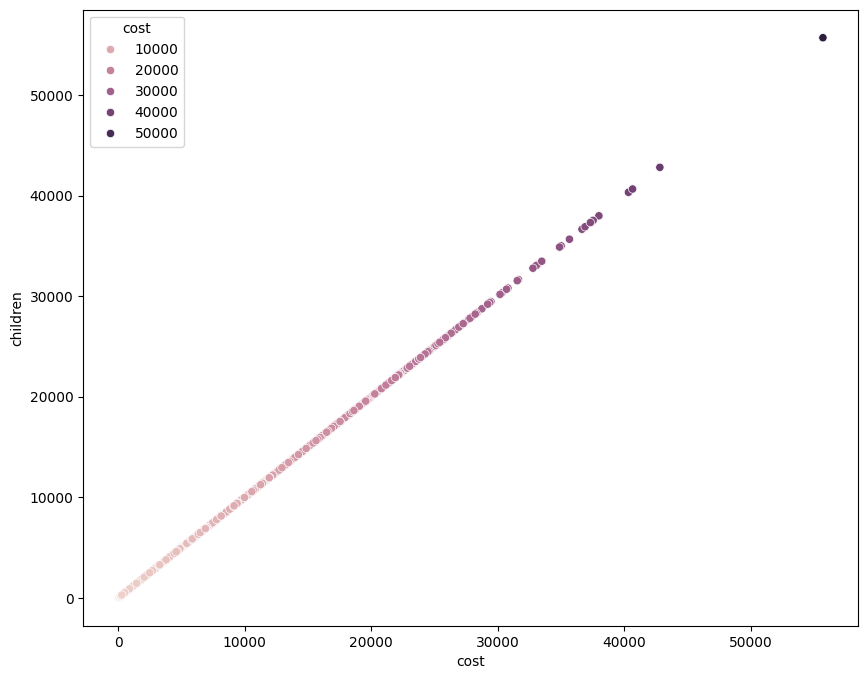

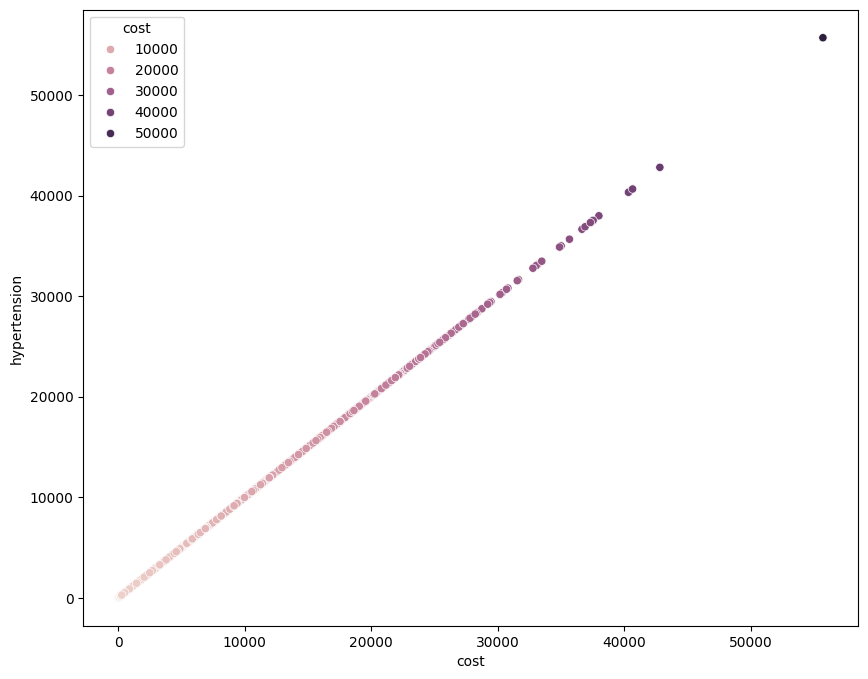

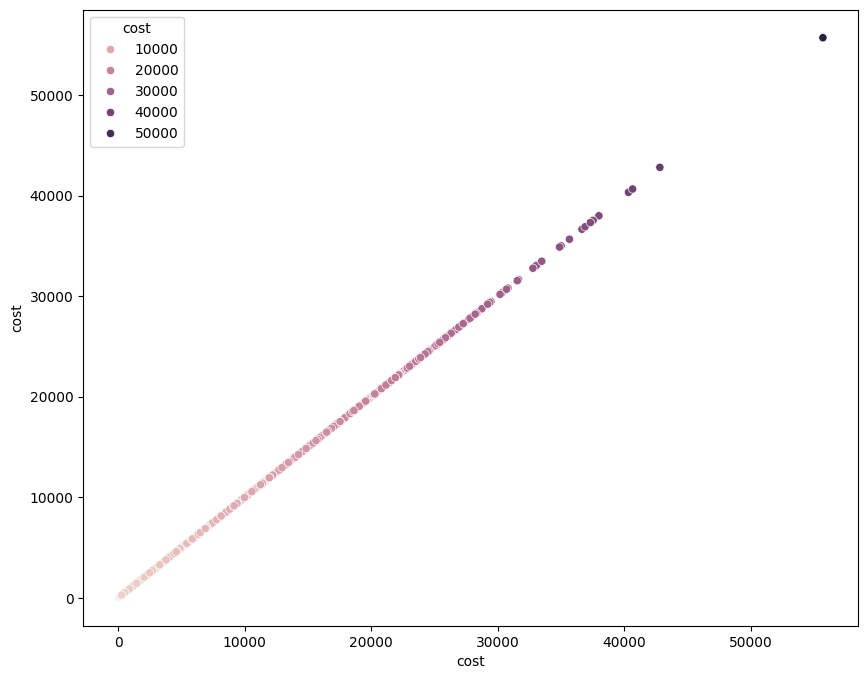

In [27]:
for i in df_num.columns:
    for j in df_num.columns:
        sns.scatterplot(x=i,y=i,hue='cost',data=df)
        plt.xlabel(i)
        plt.ylabel(j)
        plt.show()

### Categorical to Numerical:





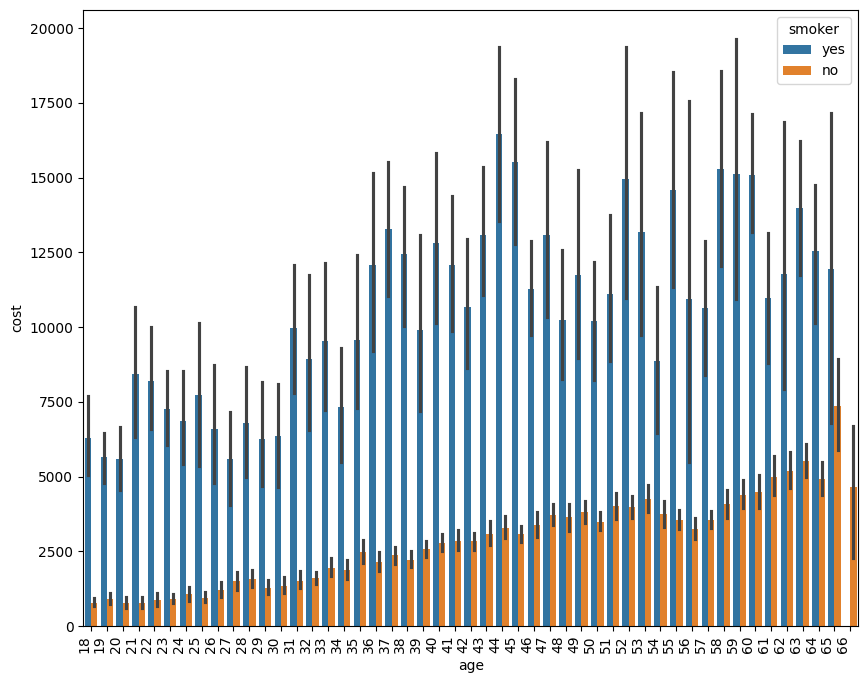

In [28]:
sns.barplot(x='age', y='cost', hue='smoker', data=df, dodge=True)


plt.xticks(rotation=90)


for label in plt.gca().get_xticklabels():
    label.set_horizontalalignment('right')

plt.show()

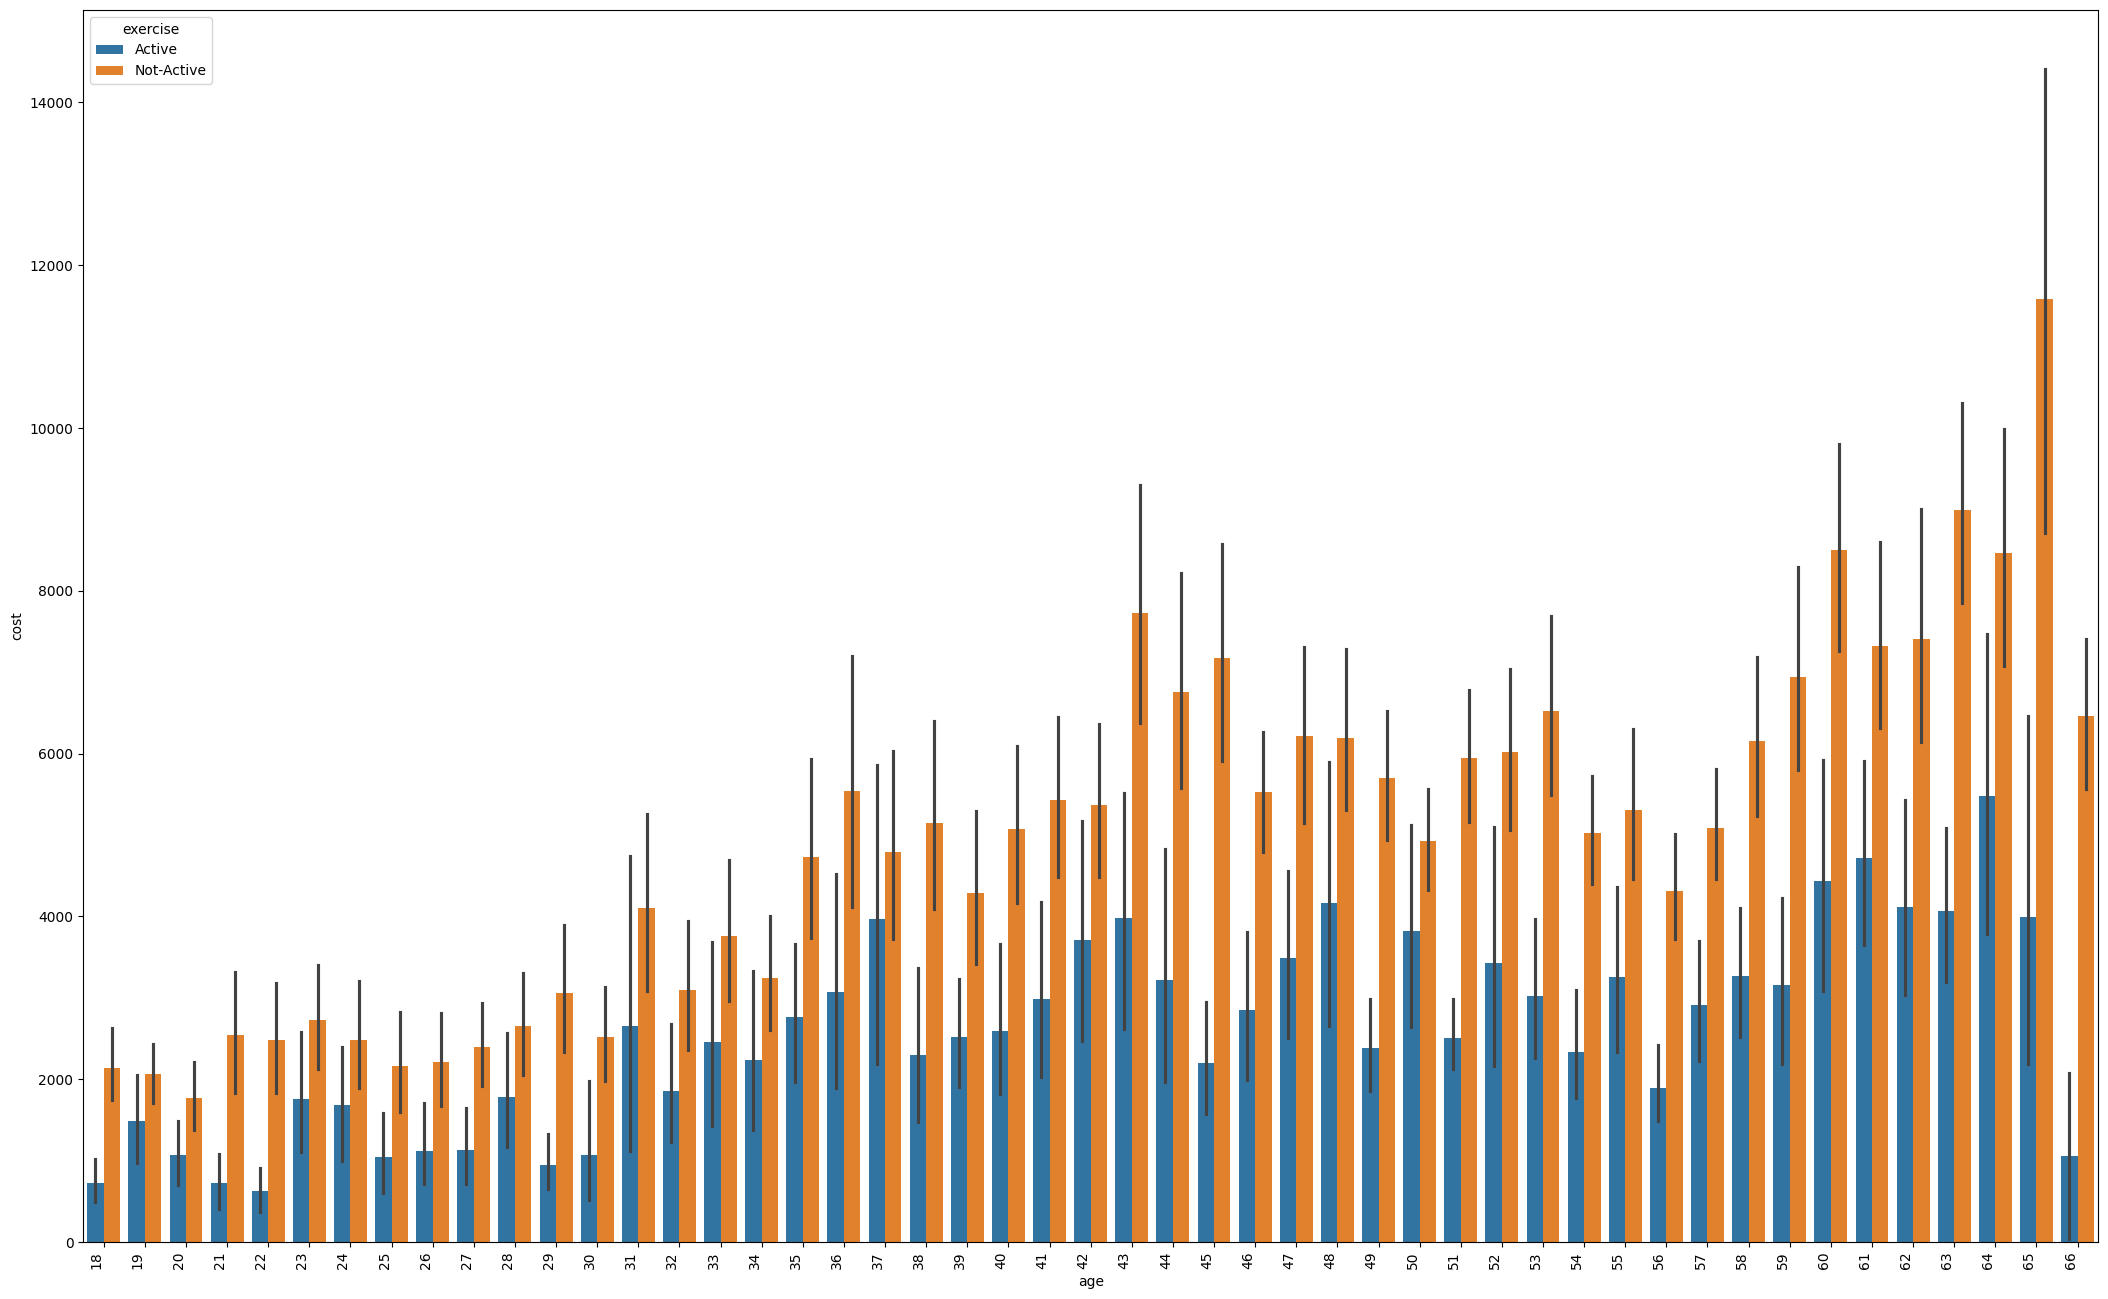

In [29]:

plt.figure(figsize=(26, 16))
sns.barplot(x='age', y='cost', hue='exercise', data=df, dodge=True)


plt.xticks(rotation=90)


for label in plt.gca().get_xticklabels():
    label.set_horizontalalignment('right')

plt.show()

In [30]:
print(df_num.skew())

X               17.516441
age              0.080504
bmi              0.262133
children         0.915562
hypertension     1.494841
cost             2.819676
dtype: float64


Since there is skewness, let's perform box-cox transformation

In [31]:
from scipy import stats
boxcox_transformed_df = df_num.apply(lambda x: stats.boxcox(x + 1)[0])
boxcox_transformed_df

X        age        bmi  children  hypertension       cost
0      0.689187   7.545440   8.357668  0.000000      0.000000  11.584679
1      1.088686   7.818594   9.323872  0.614631      0.000000   9.299574
2      1.370513   9.820043   9.202259  1.095485      0.000000   9.210550
3      1.588194  11.372582   7.412865  0.000000      0.143762  14.397113
4      1.765456  10.944074   8.525660  0.000000      0.000000   9.975642
...         ...        ...        ...       ...           ...        ...
7577   8.769122  16.694216   8.858981  1.095485      0.000000  18.674497
7578   9.983221  15.009085  11.187445  0.910123      0.000000  14.953939
7579  10.115279  12.988526   8.428306  1.095485      0.000000  15.721308
7580  10.241323  11.159705   8.200752  0.910123      0.000000  13.897898
7581   8.801823   8.085842   8.509502  0.000000      0.000000   7.749498

[7424 rows x 6 columns]

In [32]:
boxcox_transformed_df.columns

Index(['X', 'age', 'bmi', 'children', 'hypertension', 'cost'], dtype='object')

In [33]:
boxcox_transformed_df.isnull().sum()

X               0
age             0
bmi             0
children        0
hypertension    0
cost            0
dtype: int64

<ipython-input-34-25e83a3024ff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boxcox_transformed_df[i])


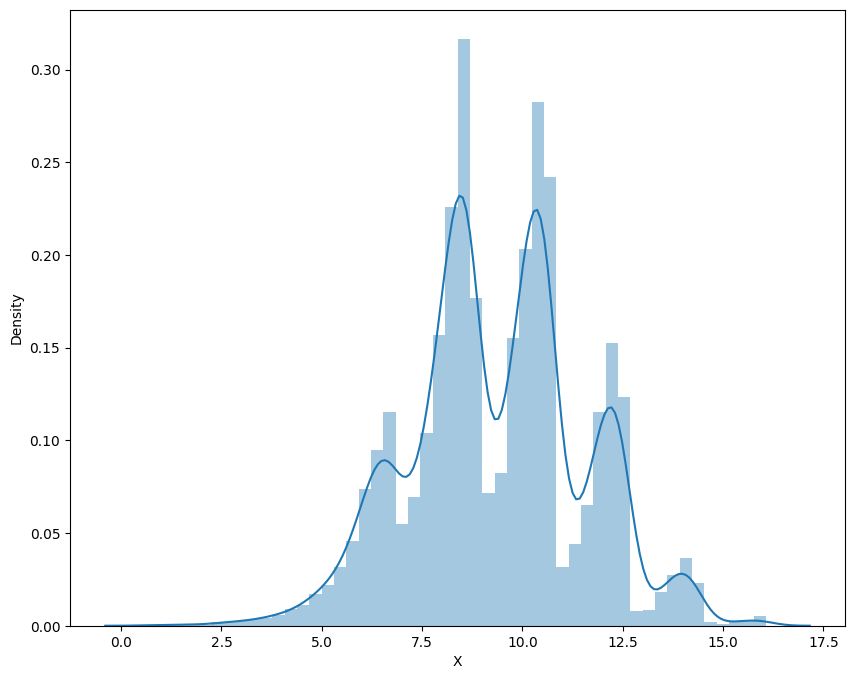

<ipython-input-34-25e83a3024ff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boxcox_transformed_df[i])


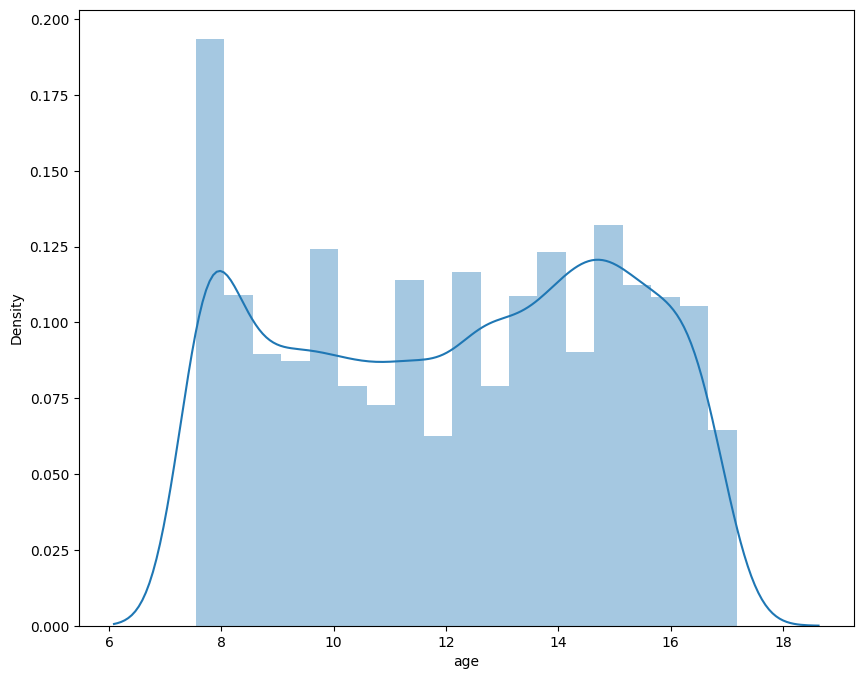

<ipython-input-34-25e83a3024ff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boxcox_transformed_df[i])


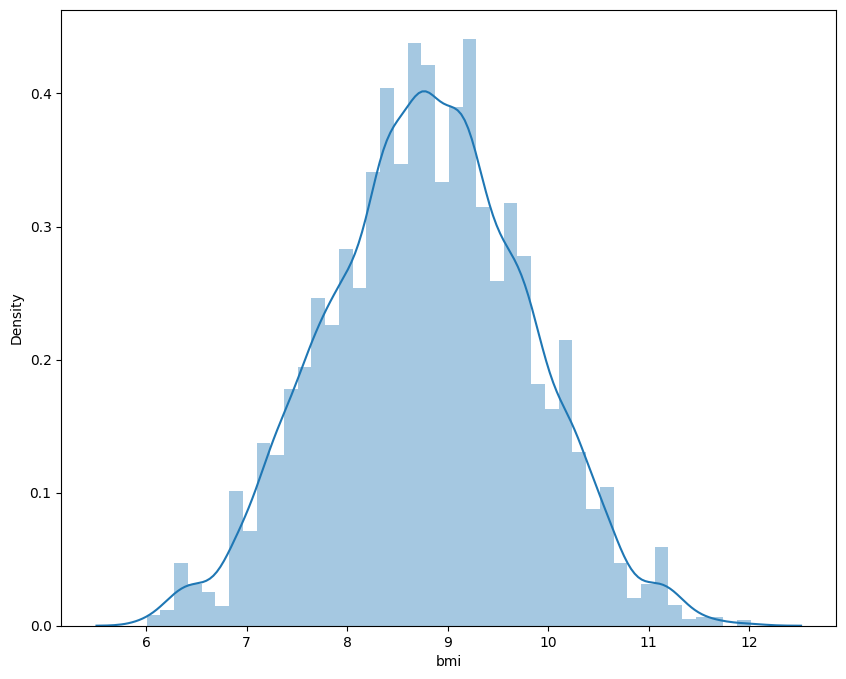

<ipython-input-34-25e83a3024ff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boxcox_transformed_df[i])


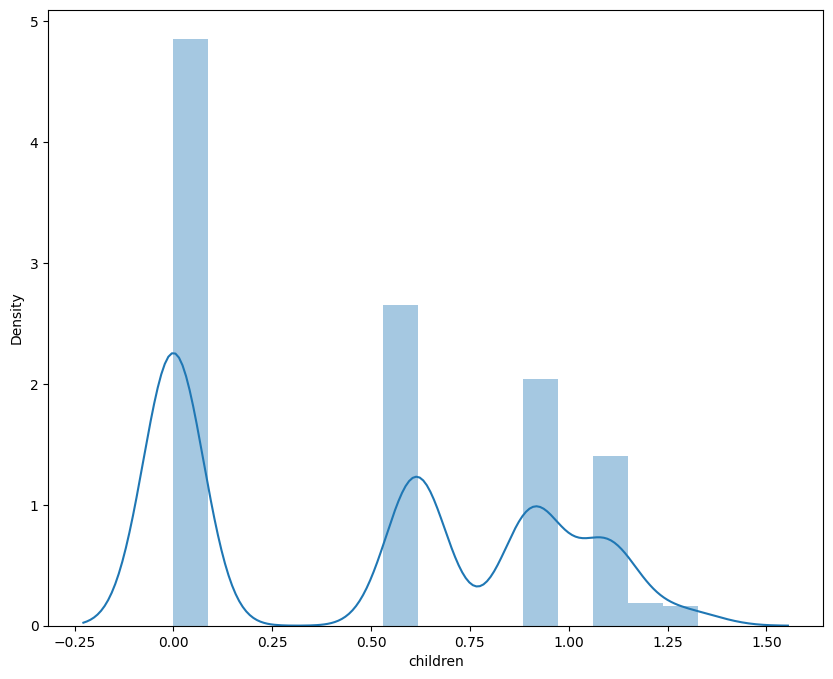

<ipython-input-34-25e83a3024ff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boxcox_transformed_df[i])


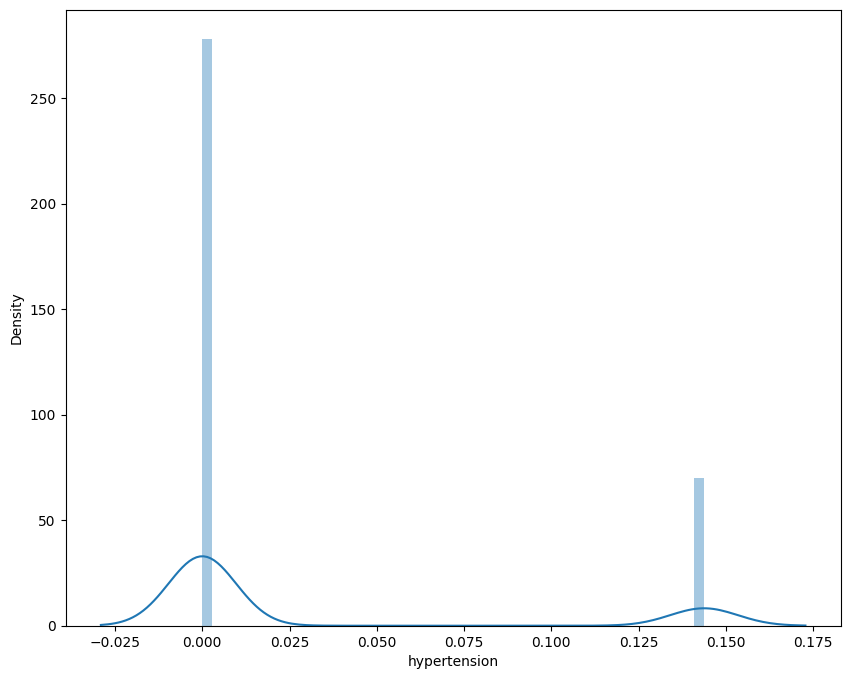

<ipython-input-34-25e83a3024ff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boxcox_transformed_df[i])


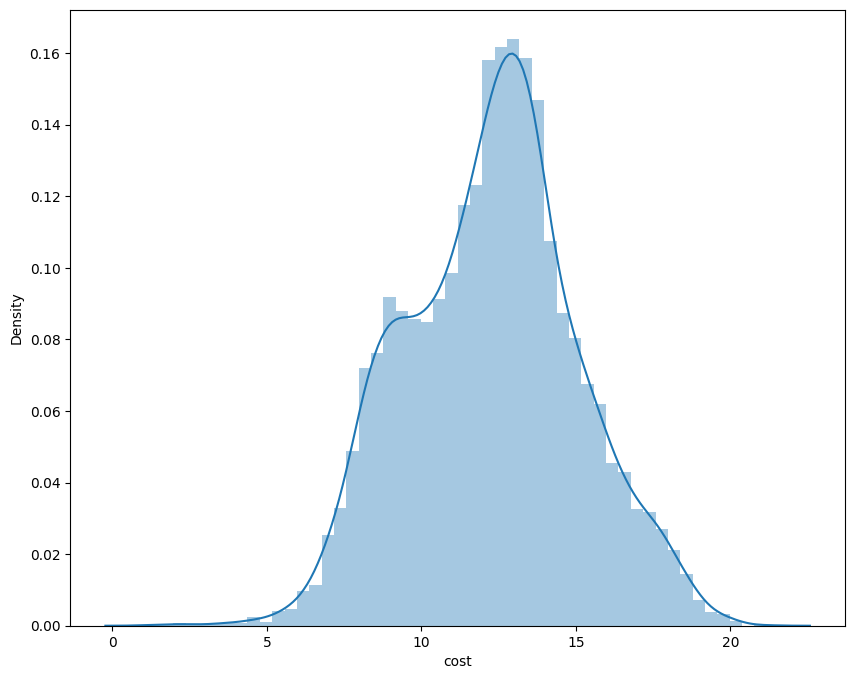

In [34]:
for i in boxcox_transformed_df.columns:
    sns.distplot(boxcox_transformed_df[i])
    plt.xlabel(i)
    plt.show()

In [35]:
print(boxcox_transformed_df.skew())

X               0.000694
age            -0.093933
bmi            -0.006260
children        0.103022
hypertension    1.494841
cost           -0.008720
dtype: float64


We can observe we have reduced skewness

#### Box plots before transformation

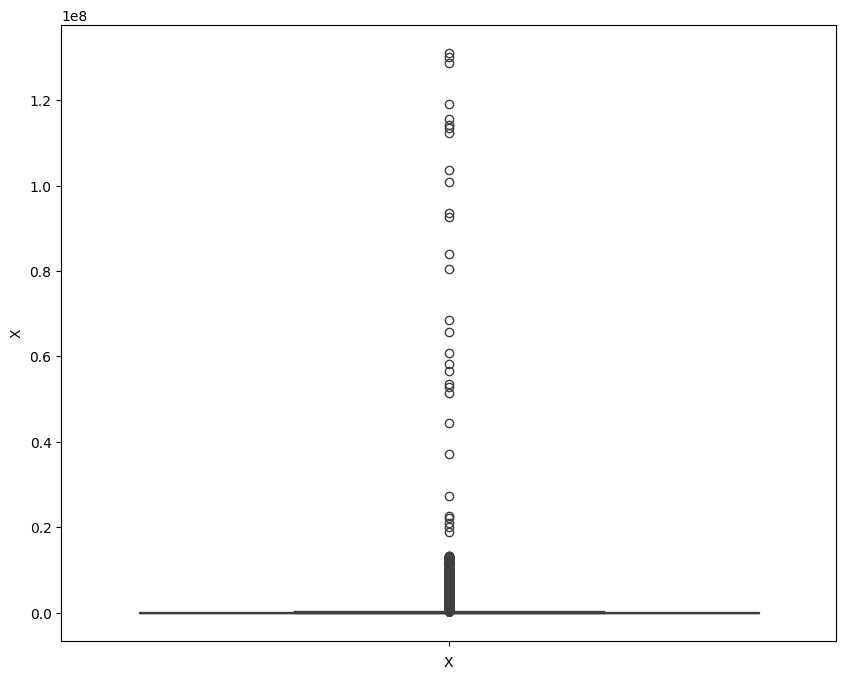

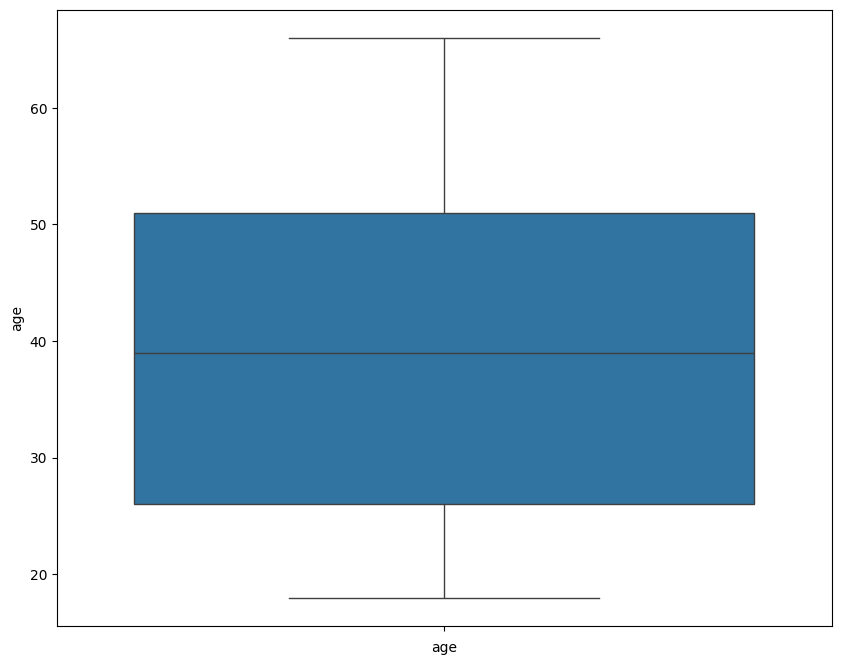

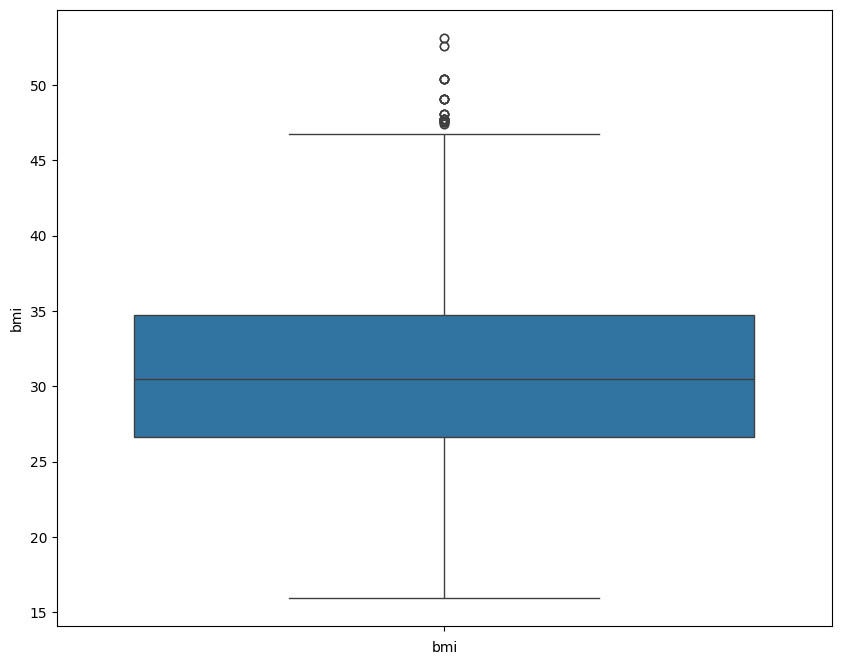

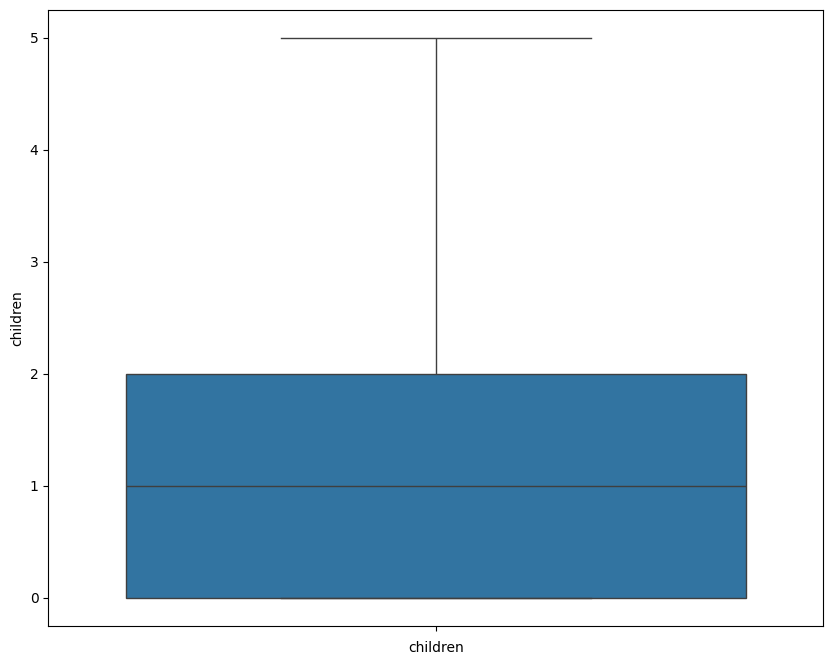

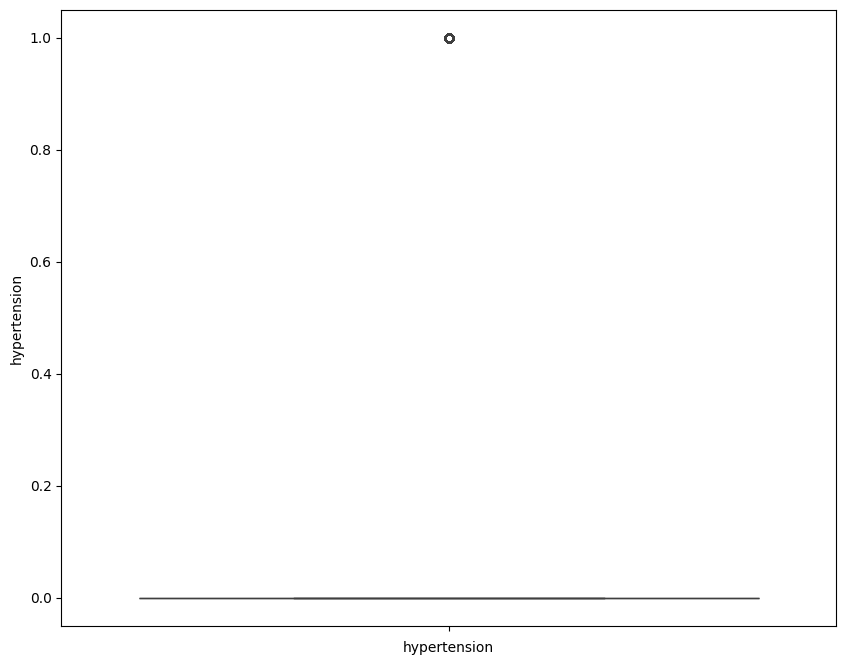

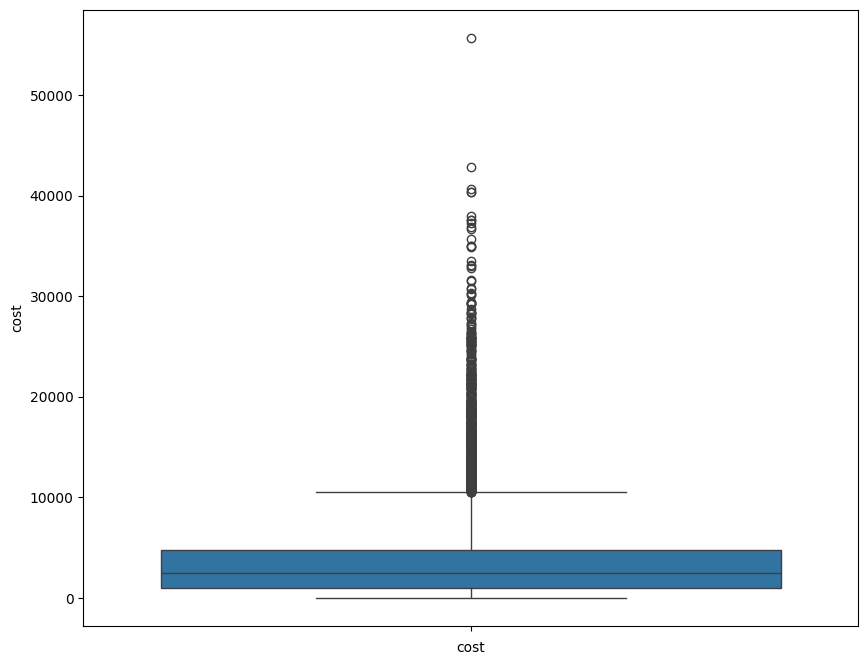

In [36]:
for i in df_num.columns:
    sns.boxplot(df_num[i])
    plt.xlabel(i)
    plt.show()

#### Box plots after Transformation

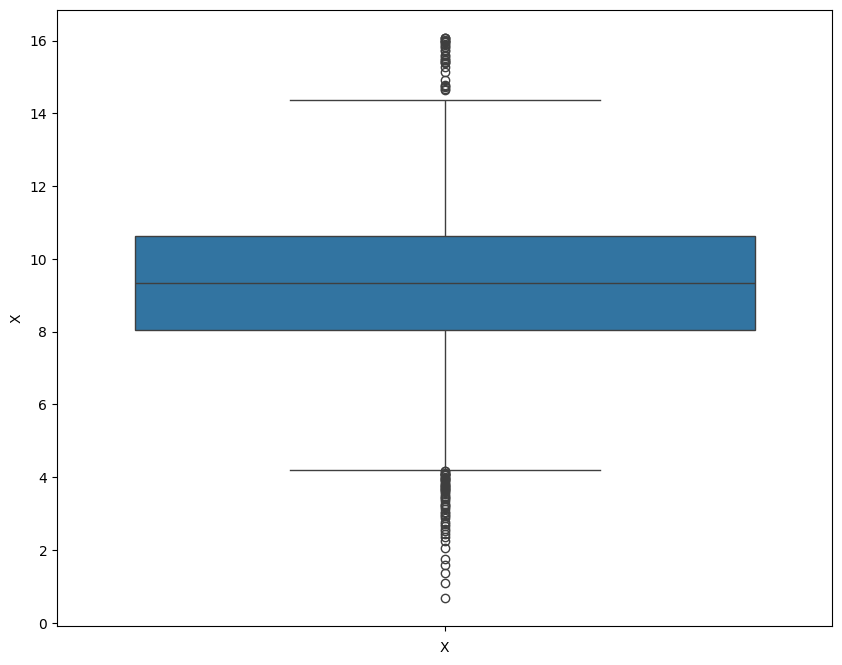

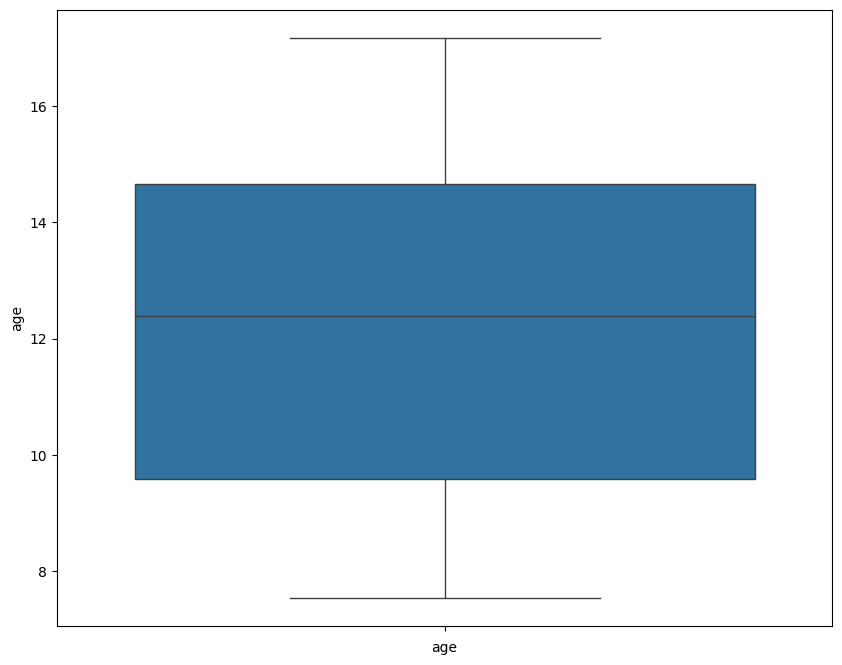

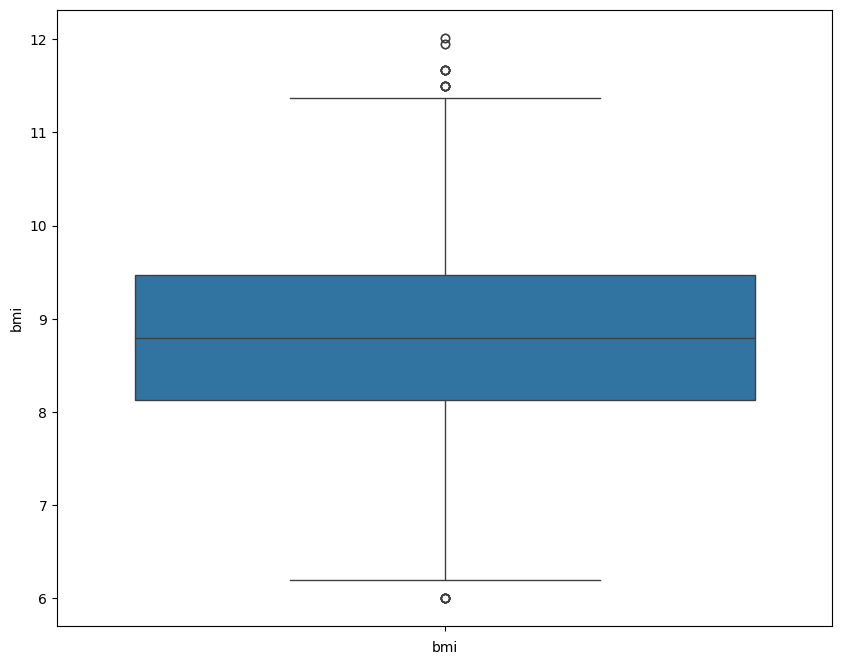

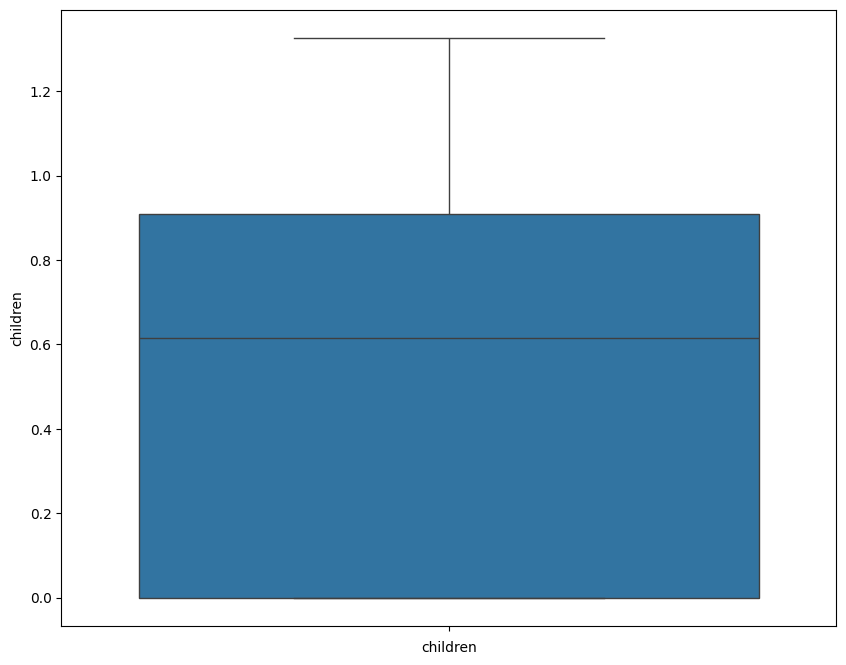

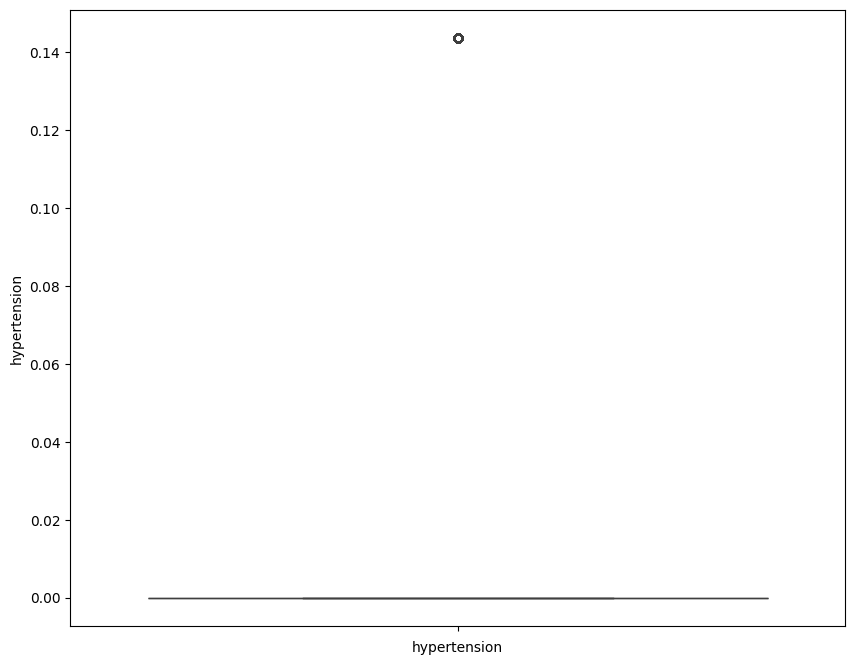

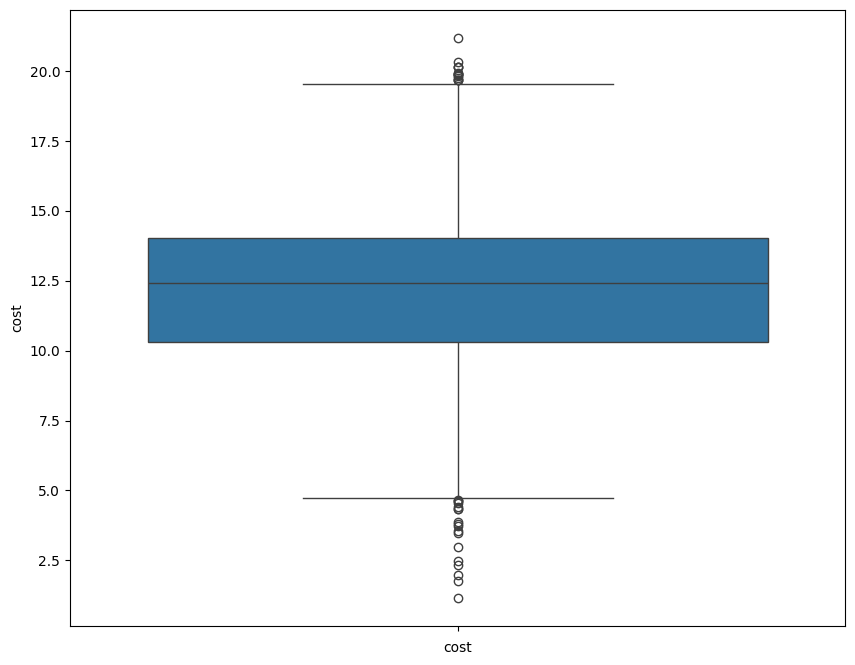

In [37]:
for i in boxcox_transformed_df.columns:
    sns.boxplot(boxcox_transformed_df[i])
    plt.xlabel(i)
    plt.show()

We can observe that outliers have been reduced.

### Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df_standard_scaled = standard_scaler.fit_transform(boxcox_transformed_df)
df_standard_scaled = pd.DataFrame(df_standard_scaled, columns=boxcox_transformed_df.columns)
df_standard_scaled

X       age       bmi  children  hypertension      cost
0    -4.035796 -1.596098 -0.442765 -1.074599     -0.501094 -0.250543
1    -3.850067 -1.501544  0.533698  0.287939     -0.501094 -1.077115
2    -3.719044 -0.808734  0.410794  1.353916     -0.501094 -1.109316
3    -3.617844 -0.271316 -1.397600 -1.074599      1.995633  0.766775
4    -3.535434 -0.419646 -0.272989 -1.074599     -0.501094 -0.832567
...        ...       ...       ...       ...           ...       ...
7419 -0.279399  1.570789  0.063871  1.353916     -0.501094  2.313997
7420  0.285041  0.987474  2.417059  0.942999     -0.501094  0.968191
7421  0.346435  0.288049 -0.371377  1.353916     -0.501094  1.245765
7422  0.405033 -0.345005 -0.601347  0.942999     -0.501094  0.586198
7423 -0.264197 -1.409035 -0.289319 -1.074599     -0.501094 -1.637811

[7424 rows x 6 columns]

<ipython-input-39-a0224e52da9d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_standard_scaled[i])


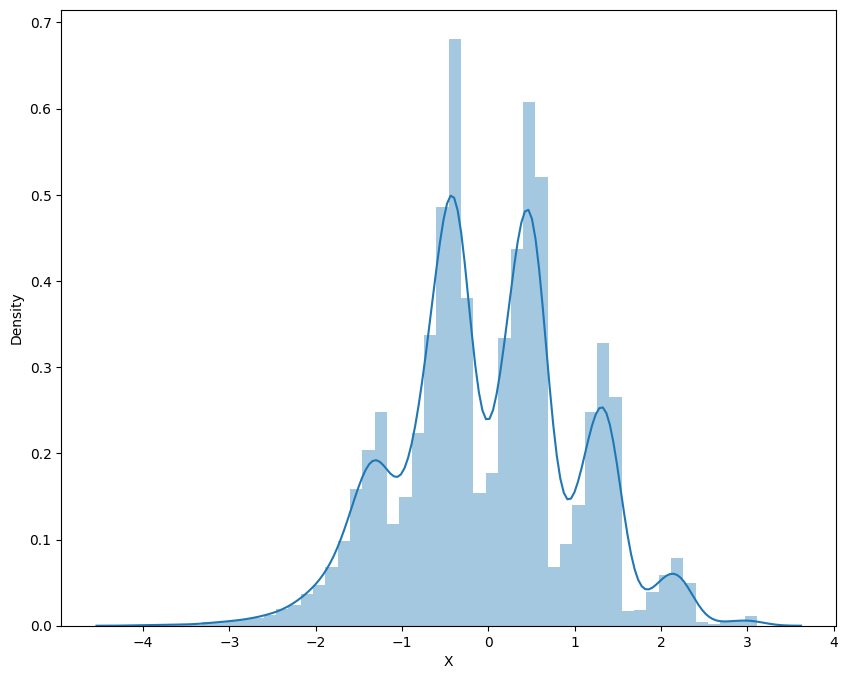

<ipython-input-39-a0224e52da9d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_standard_scaled[i])


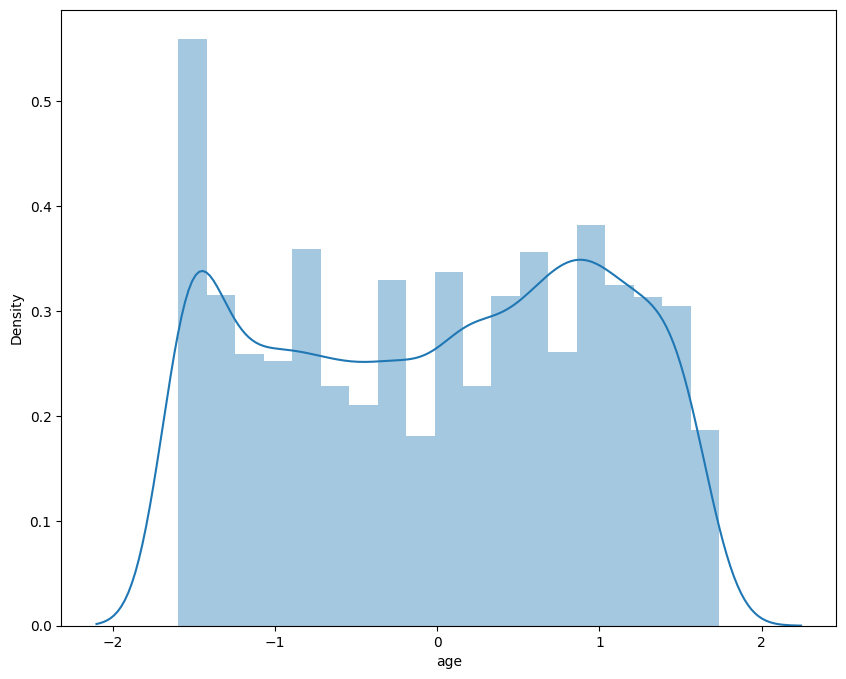

<ipython-input-39-a0224e52da9d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_standard_scaled[i])


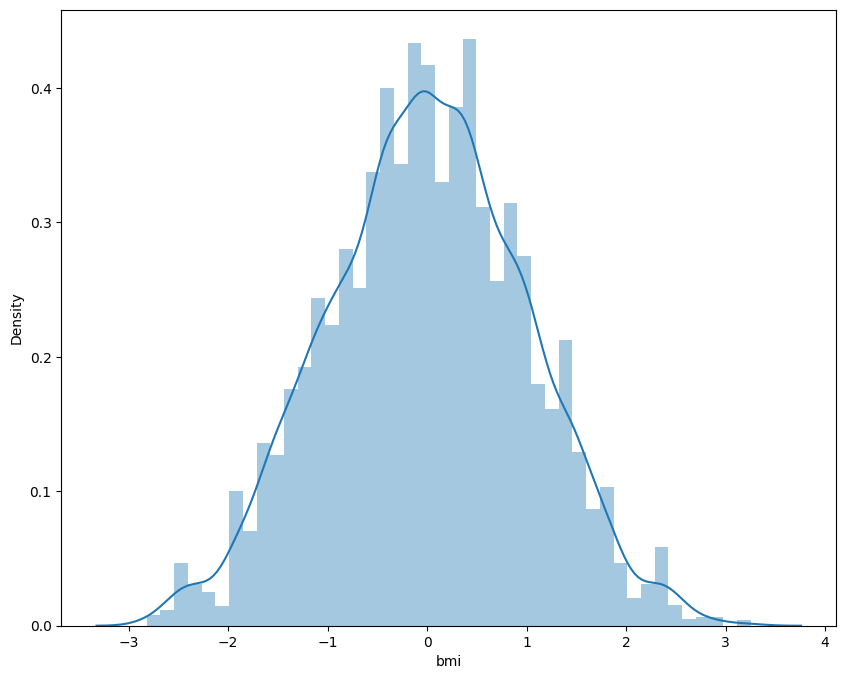

<ipython-input-39-a0224e52da9d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_standard_scaled[i])


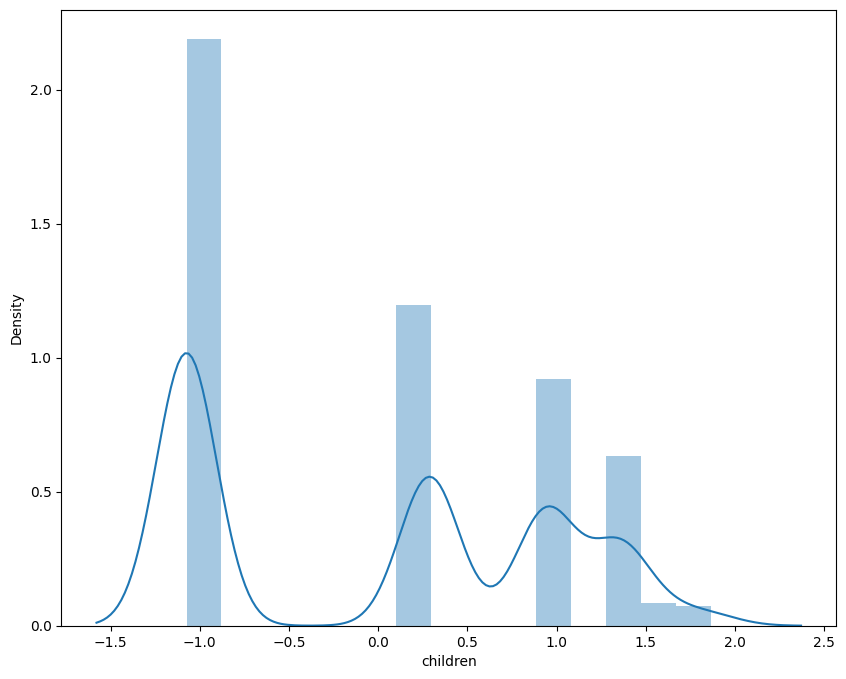

<ipython-input-39-a0224e52da9d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_standard_scaled[i])


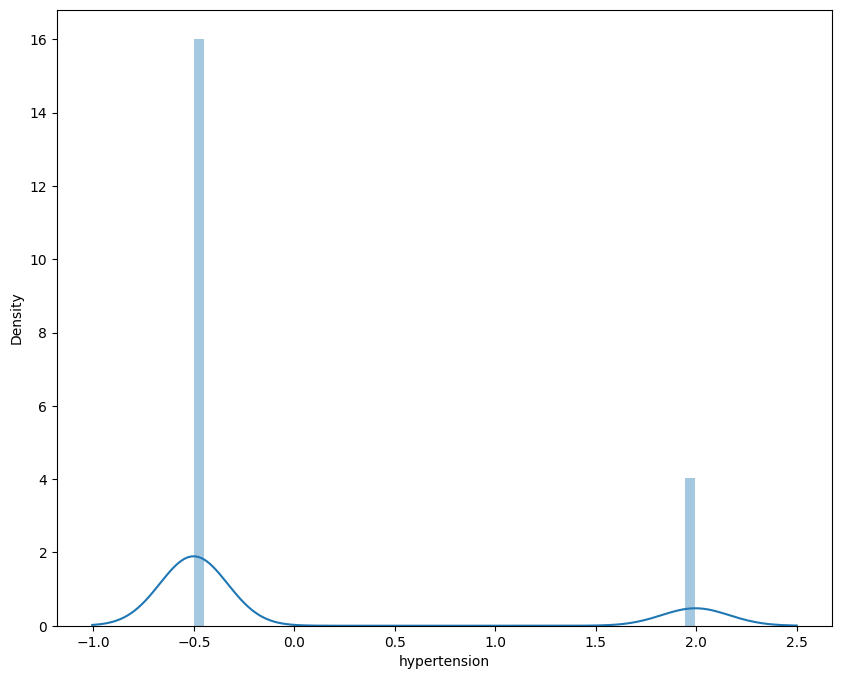

<ipython-input-39-a0224e52da9d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_standard_scaled[i])


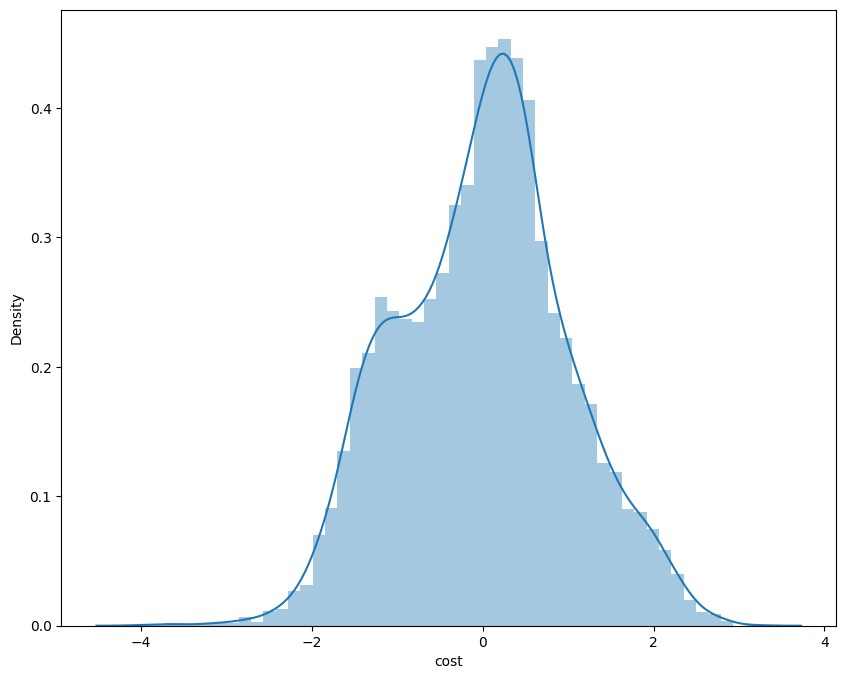

In [39]:
for i in df_standard_scaled.columns:
    sns.distplot(df_standard_scaled[i])
    plt.xlabel(i)
    plt.show()

In [40]:
df_standard_scaled.isnull().sum()

X               0
age             0
bmi             0
children        0
hypertension    0
cost            0
dtype: int64

### Encoding

In [41]:
df_encoded = pd.get_dummies(df_cat, columns=df_cat.columns)
df_encoded_reset = df_encoded.reset_index(drop=True)
df_encoded_reset

smoker_no  smoker_yes  location_CONNECTICUT  location_MARYLAND  \
0             0           1                     1                  0   
1             1           0                     0                  0   
2             1           0                     0                  0   
3             1           0                     0                  0   
4             1           0                     0                  0   
...         ...         ...                   ...                ...   
7419          0           1                     0                  0   
7420          1           0                     0                  0   
7421          0           1                     0                  0   
7422          1           0                     0                  0   
7423          1           0                     0                  0   

      location_MASSACHUSETTS  location_NEW JERSEY  location_NEW YORK  \
0                          0                    0                  0   
1                          0                    0                  0   
2                          1                    0                  0   
3                          0                    0                  0   
4                          0                    0                  0   
...                      ...                  ...                ...   
7419                       0                    1                  0   
7420                       0                    0                  0   
7421                       0                    0                  0   
7422                       0                    0                  0   
7423                       0                    0                  1   

      location_PENNSYLVANIA  location_RHODE ISLAND  location_type_Country  \
0                         0                      0                      0   
1                         0                      1                      0   
2                         0                      0                      0   
3                         1                      0                      1   
4                         1                      0                      1   
...                     ...                    ...                    ...   
7419                      0                      0                      0   
7420                      1                      0                      0   
7421                      1                      0                      0   
7422                      1                      0                      1   
7423                      0                      0                      0   

      ...  education_level_No College Degree  education_level_PhD  \
0     ...                                  0                    0   
1     ...                                  0                    0   
2     ...                                  0                    0   
3     ...                                  0                    0   
4     ...                                  0                    1   
...   ...                                ...                  ...   
7419  ...                                  1                    0   
7420  ...                                  0                    0   
7421  ...                                  0                    0   
7422  ...                                  0                    0   
7423  ...                                  0                    0   

      yearly_physical_No  yearly_physical_Yes  exercise_Active  \
0                      1                    0                1   
1                      1                    0                0   
2                      1                    0                1   
3                      1                    0                0   
4                      1                    0                0   
...                  ...                  ...              ...   
7419                   1                    0               

In [42]:
df_encoded.isnull().sum()

smoker_no                            0
smoker_yes                           0
location_CONNECTICUT                 0
location_MARYLAND                    0
location_MASSACHUSETTS               0
location_NEW JERSEY                  0
location_NEW YORK                    0
location_PENNSYLVANIA                0
location_RHODE ISLAND                0
location_type_Country                0
location_type_Urban                  0
education_level_Bachelor             0
education_level_Master               0
education_level_No College Degree    0
education_level_PhD                  0
yearly_physical_No                   0
yearly_physical_Yes                  0
exercise_Active                      0
exercise_Not-Active                  0
married_Married                      0
married_Not_Married                  0
gender_female                        0
gender_male                          0
dtype: int64

In [43]:
df_health_expenses=pd.concat([df_standard_scaled,df_encoded_reset],axis=1)
df_health_expenses

X       age       bmi  children  hypertension      cost  \
0    -4.035796 -1.596098 -0.442765 -1.074599     -0.501094 -0.250543   
1    -3.850067 -1.501544  0.533698  0.287939     -0.501094 -1.077115   
2    -3.719044 -0.808734  0.410794  1.353916     -0.501094 -1.109316   
3    -3.617844 -0.271316 -1.397600 -1.074599      1.995633  0.766775   
4    -3.535434 -0.419646 -0.272989 -1.074599     -0.501094 -0.832567   
...        ...       ...       ...       ...           ...       ...   
7419 -0.279399  1.570789  0.063871  1.353916     -0.501094  2.313997   
7420  0.285041  0.987474  2.417059  0.942999     -0.501094  0.968191   
7421  0.346435  0.288049 -0.371377  1.353916     -0.501094  1.245765   
7422  0.405033 -0.345005 -0.601347  0.942999     -0.501094  0.586198   
7423 -0.264197 -1.409035 -0.289319 -1.074599     -0.501094 -1.637811   

      smoker_no  smoker_yes  location_CONNECTICUT  location_MARYLAND  ...  \
0             0           1                     1                  0  ...   
1             1           0                     0                  0  ...   
2             1           0                     0                  0  ...   
3             1           0                     0                  0  ...   
4             1           0                     0                  0  ...   
...         ...         ...                   ...                ...  ...   
7419          0           1                     0                  0  ...   
7420          1           0                     0                  0  ...   
7421          0           1                     0                  0  ...   
7422          1           0                     0                  0  ...   
7423          1           0                     0                  0  ...   

      education_level_No College Degree  education_level_PhD  \
0                                     0                    0   
1                                     0                    0   
2                                     0                    0   
3                                     0                    0   
4                                     0                    1   
...                                 ...                  ...   
7419                                  1                    0   
7420                                  0                    0   
7421                                  0                    0   
7422                                  0                    0   
7423                                  0                    0   

      yearly_physical_No  yearly_physical_Yes  exercise_Active  \
0                      1                    0                1   
1                      1                    0                0   
2                      1                    0                1   
3                      1                    0                0   
4                      1                    0                0   
...                  ...                  ...              ...   
7419                   1                    0                0   
7420                   0                    1                0   
7421                   1                    0                1   
7422                   1                    0                0   
7423                   1                    0                1   

      exercise_Not-Active  married_Married  married_Not_Married  \
0                       0                1                    0   
1                       1                1                    0   
2                       0                1                    0   
3                       1                1                    0   
4                       1                1                    0   
...                   ...              ...                  ...   
7419                    1                1                    0   
7420                    1                0                    1   
7421                    0                1                

In [44]:
df_health_expenses.isnull().sum()

X                                    0
age                                  0
bmi                                  0
children                             0
hypertension                         0
cost                                 0
smoker_no                            0
smoker_yes                           0
location_CONNECTICUT                 0
location_MARYLAND                    0
location_MASSACHUSETTS               0
location_NEW JERSEY                  0
location_NEW YORK                    0
location_PENNSYLVANIA                0
location_RHODE ISLAND                0
location_type_Country                0
location_type_Urban                  0
education_level_Bachelor             0
education_level_Master               0
education_level_No College Degree    0
education_level_PhD                  0
yearly_physical_No                   0
yearly_physical_Yes                  0
exercise_Active                      0
exercise_Not-Active                  0
married_Married          

### Statistical Analysis:

Descriptive Statistics

In [45]:
descriptive_stats = df.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
                  X          age          bmi     children  hypertension  \
count  7.424000e+03  7424.000000  7424.000000  7424.000000   7424.000000   
mean   7.218677e+05    38.943292    30.788149     1.109106      0.200700   
std    5.412068e+06    14.179253     5.998406     1.216751      0.400551   
min    1.000000e+00    18.000000    15.960000     0.000000      0.000000   
25%    5.649000e+03    26.000000    26.600000     0.000000      0.000000   
50%    2.536100e+04    39.000000    30.495000     1.000000      0.000000   
75%    1.191442e+05    51.000000    34.700000     2.000000      0.000000   
max    1.311011e+08    66.000000    53.130000     5.000000      1.000000   

               cost  
count   7424.000000  
mean    4052.139413  
std     4946.598381  
min        2.000000  
25%      970.000000  
50%     2504.500000  
75%     4778.250000  
max    55715.000000  


###Interpretation:
- There is a significant differnce between mean value and max value for the columns 'age'and 'bmi'
- The standar deviation is highest for 'age' column

Correlation Analysis

In [46]:
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                     X       age       bmi  children  hypertension      cost
X             1.000000 -0.009641  0.007938  0.001066      0.002385  0.003229
age          -0.009641  1.000000  0.096860  0.066442     -0.012441  0.323778
bmi           0.007938  0.096860  1.000000 -0.006945      0.006970  0.247663
children      0.001066  0.066442 -0.006945  1.000000      0.010347  0.090337
hypertension  0.002385 -0.012441  0.006970  0.010347      1.000000  0.034397
cost          0.003229  0.323778  0.247663  0.090337      0.034397  1.000000


<ipython-input-46-4364c8758da9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [47]:
df_health_corr=pd.concat([df_standard_scaled,df_cat],axis=1)
df_health_corr

X       age       bmi  children  hypertension      cost smoker  \
0    -4.035796 -1.596098 -0.442765 -1.074599     -0.501094 -0.250543    yes   
1    -3.850067 -1.501544  0.533698  0.287939     -0.501094 -1.077115     no   
2    -3.719044 -0.808734  0.410794  1.353916     -0.501094 -1.109316     no   
3    -3.617844 -0.271316 -1.397600 -1.074599      1.995633  0.766775     no   
4    -3.535434 -0.419646 -0.272989 -1.074599     -0.501094 -0.832567     no   
...        ...       ...       ...       ...           ...       ...    ...   
7577       NaN       NaN       NaN       NaN           NaN       NaN    yes   
7578       NaN       NaN       NaN       NaN           NaN       NaN     no   
7579       NaN       NaN       NaN       NaN           NaN       NaN    yes   
7580       NaN       NaN       NaN       NaN           NaN       NaN     no   
7581       NaN       NaN       NaN       NaN           NaN       NaN     no   

           location location_type    education_level yearly_physical  \
0       CONNECTICUT         Urban           Bachelor              No   
1      RHODE ISLAND         Urban           Bachelor              No   
2     MASSACHUSETTS         Urban             Master              No   
3      PENNSYLVANIA       Country             Master              No   
4      PENNSYLVANIA       Country                PhD              No   
...             ...           ...                ...             ...   
7577     NEW JERSEY         Urban  No College Degree              No   
7578   PENNSYLVANIA         Urban           Bachelor             Yes   
7579   PENNSYLVANIA         Urban           Bachelor              No   
7580   PENNSYLVANIA       Country           Bachelor              No   
7581       NEW YORK         Urban           Bachelor              No   

        exercise      married  gender  
0         Active      Married  female  
1     Not-Active      Married    male  
2         Active      Married    male  
3     Not-Active      Married    male  
4     Not-Active      Married    male  
...          ...          ...     ...  
7577  Not-Active      Married    male  
7578  Not-Active  Not_Married  female  
7579      Active      Married    male  
7580  Not-Active  Not_Married    male  
7581      Active      Married  female  

[7582 rows x 14 columns]

Heat Map

<ipython-input-48-73d166041ee6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_health_corr.corr(),annot=True)


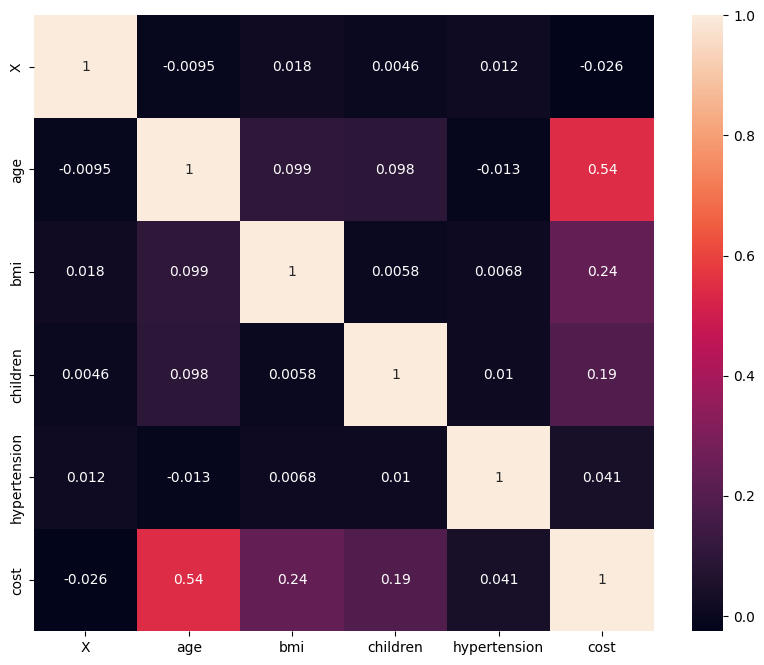

In [48]:
sns.heatmap(df_health_corr.corr(),annot=True)
plt.show()

### Interpretation:
- There is no multicollinearity in the correlation map.
- We do not have to drop any columns.
- Also, X column contributes in a negative number to the 'cost' column.
- 'age' being the highest with 0.54 with 'cost' target column.

T-Test

In [49]:
#t-test between cost for smokers and non-smokers
smoker_cost = df[df['smoker'] == 'yes']['cost']
non_smoker_cost = df[df['smoker'] == 'no']['cost']
t_stat, p_value = ttest_ind(smoker_cost, non_smoker_cost)
print("\nT-test between cost for smokers and non-smokers:")
print("t-statistic:", t_stat)
print("p-value:", p_value)


T-test between cost for smokers and non-smokers:
t-statistic: 67.68965530017242
p-value: 0.0


In [50]:
#t-test between cost for exercisers and non-exercisers
exerciser_cost = df[df['exercise'] == 'Active']['cost']
non_exerciser_cost = df[df['exercise'] == 'Not-Active']['cost']
t_stat_ex, p_value_ex = ttest_ind(exerciser_cost, non_exerciser_cost)
print("\nT-test between cost for exercisers and non-exercisers:")
print("t-statistic:", t_stat_ex)
print("p-value:", p_value_ex)


T-test between cost for exercisers and non-exercisers:
t-statistic: -16.242790941572434
p-value: 2.525613781021295e-58


In [51]:
#t-test between cost for marries and unmarried
marrried_cost = df[df['married'] == 'Married']['cost']
non_married_cost = df[df['married'] == 'Not_Married']['cost']
t_stat_m, p_value_m = ttest_ind(exerciser_cost, non_exerciser_cost)
print("\nT-test between cost for exercisers and non-exercisers:")
print("t-statistic:", t_stat_m)
print("p-value:", p_value_m)


T-test between cost for exercisers and non-exercisers:
t-statistic: -16.242790941572434
p-value: 2.525613781021295e-58


###Interpretation:
- T-statistic score indicates that there is a large difference between the means of 2 groups smoker==yes and smoker==no
- p-value is below 0.05 which means that the observed differnce between the two groups relative to variation in data is statistcally significant

Chi - square test

In [52]:
#chi-square test between smoker and hypertension
contingency_table = pd.crosstab(df['smoker'], df['hypertension'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print("\nChi-square test between smoker and hypertension:")
print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square test between smoker and hypertension:
Chi-square statistic: 1.3150643581459365
p-value: 0.25147976879403133


In [53]:
contingency_table

hypertension   0.0   1.0
smoker                  
no            4792  1183
yes           1142   307

###Interpretation:
- Chi- square value is small and it indicates that there is a less discripency (difference) between obs and exp frequencies.
- p-value is greater than 0.05 which indicates that there may not be significant association between 2 variables ( being smoker and having hypertension).

Linear Regression

In [54]:
#linear regression with age as independent variable and cost as dependent variable
X = df_num.drop('cost',axis=1)
y = df['cost']
X = sm.add_constant(X)  # Adding constant for intercept
model = sm.OLS(y, X).fit()  # Ordinary Least Squares (OLS) regression
print("\nLinear Regression Results:")
print(model.summary())


Linear Regression Results:
                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     279.5
Date:                Wed, 28 Feb 2024   Prob (F-statistic):          9.79e-275
Time:                        08:50:22   Log-Likelihood:                -73045.
No. Observations:                7424   AIC:                         1.461e+05
Df Residuals:                    7418   BIC:                         1.461e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -5975.0

###Interpretation:
- the value of coefficient is 112.95 which depicts that for every unit increase in age there is an increase of 112.95 dollars in cost.
- p-value is 0 which <0.05 which depicts that age is statistically significant in predicting the cost.
- The R-squared value is 0.105, indicating that approximately 10.5% (which is small)of the variability in the cost can be explained by the linear relationship with age.
- the above point suggest that other factors beyond age may influence the cost.

ANOVA Test

In [55]:
df['education_level'].value_counts()

Bachelor             4483
Master               1502
No College Degree     742
PhD                   697
Name: education_level, dtype: int64

In [56]:
#Investigating differences in cost based on education level
anova_result = f_oneway(*[group['cost'] for name, group in df.groupby('education_level')])
print("\nANOVA result for education level and cost:")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)


ANOVA result for education level and cost:
F-statistic: 0.3342731945750047
p-value: 0.8005697474693205


In [57]:
anova_result

F_onewayResult(statistic=0.3342731945750047, pvalue=0.8005697474693205)

###Interpretation:
- null hypothesis:- there are no differences in means between groups
- F-statistic value is small and indicates that there is weaker evidence aganist null hypothesis.
- p-value > 0.05 indicates that is no sufficient evidence to reject null hypothesis.

In [58]:
df.head()

X  age     bmi  children smoker       location location_type  \
0  1   18  27.900         0    yes    CONNECTICUT         Urban   
1  2   19  33.770         1     no   RHODE ISLAND         Urban   
2  3   27  33.000         3     no  MASSACHUSETTS         Urban   
3  4   34  22.705         0     no   PENNSYLVANIA       Country   
4  5   32  28.880         0     no   PENNSYLVANIA       Country   

  education_level yearly_physical    exercise  married  hypertension  gender  \
0        Bachelor              No      Active  Married           0.0  female   
1        Bachelor              No  Not-Active  Married           0.0    male   
2          Master              No      Active  Married           0.0    male   
3          Master              No  Not-Active  Married           1.0    male   
4             PhD              No  Not-Active  Married           0.0    male   

   cost  
0  1746  
1   602  
2   576  
3  5562  
4   836

In [59]:
df_health_corr.columns

Index(['X', 'age', 'bmi', 'children', 'hypertension', 'cost', 'smoker',
       'location', 'location_type', 'education_level', 'yearly_physical',
       'exercise', 'married', 'gender'],
      dtype='object')

In [60]:
df_health_expenses.head()

X       age       bmi  children  hypertension      cost  smoker_no  \
0 -4.035796 -1.596098 -0.442765 -1.074599     -0.501094 -0.250543          0   
1 -3.850067 -1.501544  0.533698  0.287939     -0.501094 -1.077115          1   
2 -3.719044 -0.808734  0.410794  1.353916     -0.501094 -1.109316          1   
3 -3.617844 -0.271316 -1.397600 -1.074599      1.995633  0.766775          1   
4 -3.535434 -0.419646 -0.272989 -1.074599     -0.501094 -0.832567          1   

   smoker_yes  location_CONNECTICUT  location_MARYLAND  ...  \
0           1                     1                  0  ...   
1           0                     0                  0  ...   
2           0                     0                  0  ...   
3           0                     0                  0  ...   
4           0                     0                  0  ...   

   education_level_No College Degree  education_level_PhD  yearly_physical_No  \
0                                  0                    0                   1   
1                                  0                    0                   1   
2                                  0                    0                   1   
3                                  0                    0                   1   
4                                  0                    1                   1   

   yearly_physical_Yes  exercise_Active  exercise_Not-Active  married_Married  \
0                    0                1                    0                1   
1                    0                0                    1                1   
2                    0                1                    0                1   
3                    0                0                    1                1   
4                    0                0                    1                1   

   married_Not_Married  gender_female  gender_male  
0                    0              1            0  
1                    0              0            1  
2                    0              0            1  
3                    0              0            1  
4                    0              0            1  

[5 rows x 29 columns]

In [61]:
df_health_expenses.shape

(7424, 29)

## Model Building

### 1. Random Forest Regressor

In [62]:
X=df_health_expenses.drop(columns=['cost'])
y=df_health_expenses['cost']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Training the Random Forest Regressor model
RF_model = RandomForestRegressor(n_estimators=100, random_state=42)
RF_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [65]:
y_pred_train = RF_model.predict(X_train)
y_pred_test = RF_model.predict(X_test)

In [66]:
mse_train_rf = mean_squared_error(y_train, y_pred_train)
mse_test_rf = mean_squared_error(y_test, y_pred_test)
r2_train_rf = r2_score(y_train, y_pred_train)
r2_test_rf = r2_score(y_test, y_pred_test)

In [67]:
cv_rf = cross_val_score(RF_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

In [68]:
cv_score_rf=(-cv_rf).mean()
cv_score_rf_v=(-cv_rf).std()

In [69]:
accuracy_rf=[]
accuracy_rf.append([mse_train_rf,mse_test_rf,r2_train_rf,r2_test_rf,cv_score_rf,cv_score_rf_v])
accuracy_rf

[[0.028888497441836625,
  0.19729403878274157,
  0.9711597599711735,
  0.8010867897891166,
  0.21449267758906226,
  0.02712460191149219]]

In [70]:
print("\nBasic Random Forest Model Evaluation:")
print(f"Mean Squared Error of Training: {mse_train_rf}")
print(f"Mean Squared Error of test: {mse_test_rf}")
print(f"R^2 Score of training: {r2_train_rf}")
print(f"R^2 Score of test: {r2_test_rf}")
print(f"Cross validation Score of training (Bias Error): {cv_score_rf}")
print(f"Cross validation Score of training (Variance Error): {cv_score_rf_v}")


Basic Random Forest Model Evaluation:
Mean Squared Error of Training: 0.028888497441836625
Mean Squared Error of test: 0.19729403878274157
R^2 Score of training: 0.9711597599711735
R^2 Score of test: 0.8010867897891166
Cross validation Score of training (Bias Error): 0.21449267758906226
Cross validation Score of training (Variance Error): 0.02712460191149219


### Feature Engineering for Random Forest

In [71]:
# Feature importance
importance = RF_model.feature_importances_
feature_names = X.columns

In [72]:
# Displaying feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
                              Feature  Importance
0                                   X    0.054344
1                                 age    0.336480
2                                 bmi    0.133647
3                            children    0.033374
4                        hypertension    0.005474
5                           smoker_no    0.143618
6                          smoker_yes    0.157595
7                location_CONNECTICUT    0.003009
8                   location_MARYLAND    0.003874
9              location_MASSACHUSETTS    0.001862
10                location_NEW JERSEY    0.003707
11                  location_NEW YORK    0.003589
12              location_PENNSYLVANIA    0.004467
13              location_RHODE ISLAND    0.003171
14              location_type_Country    0.002665
15                location_type_Urban    0.002622
16           education_level_Bachelor    0.003986
17             education_level_Master    0.003398
18  education_level_No College

plot in bars

In [73]:
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

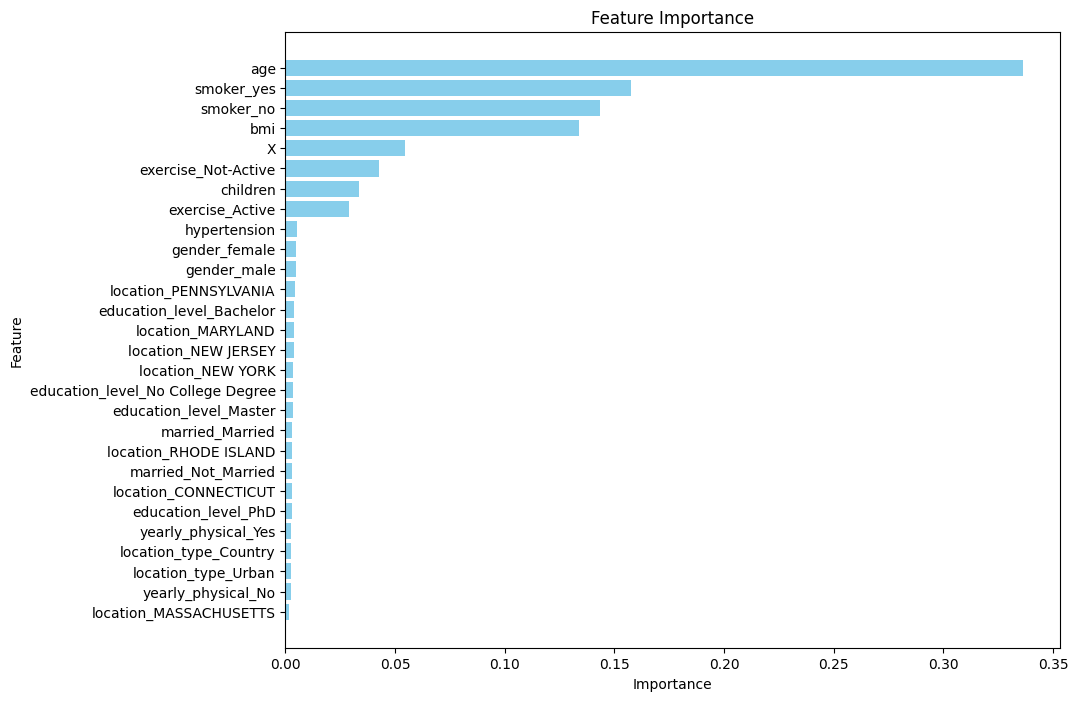

In [74]:
# Plot feature importance
plt.figure(figsize=(10, 8))
plt.barh(sorted_feature_importance_df['Feature'], sorted_feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

#### Selecting imporant features based on a threshold level

In [75]:
# Selecting important features
sfm = SelectFromModel(RF_model, threshold=0.0025)
sfm.fit(X_train, y_train)
selected_features = X_train.columns[sfm.get_support()]
print("\nSelected Features using SFM method:")
print(selected_features)


Selected Features using SFM method:
Index(['X', 'age', 'bmi', 'children', 'hypertension', 'smoker_no',
       'smoker_yes', 'location_CONNECTICUT', 'location_MARYLAND',
       'location_NEW JERSEY', 'location_NEW YORK', 'location_PENNSYLVANIA',
       'location_RHODE ISLAND', 'location_type_Country', 'location_type_Urban',
       'education_level_Bachelor', 'education_level_Master',
       'education_level_No College Degree', 'education_level_PhD',
       'yearly_physical_Yes', 'exercise_Active', 'exercise_Not-Active',
       'married_Married', 'married_Not_Married', 'gender_female',
       'gender_male'],
      dtype='object')


In [76]:
# Training the model based on selected features
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

In [77]:
RF_model_selected = RandomForestRegressor(n_estimators=100, random_state=42)
RF_model_selected.fit(X_train_selected, y_train)

RandomForestRegressor(random_state=42)

In [78]:
y_pred_selected_train = RF_model_selected.predict(X_train_selected)
y_pred_selected_test = RF_model_selected.predict(X_test_selected)

In [79]:
mse_train_rf_sel = mean_squared_error(y_train, y_pred_selected_train)
mse_test_rf_sel = mean_squared_error(y_test, y_pred_selected_test)
r2_train_rf_sel = r2_score(y_train, y_pred_selected_train)
r2_test_rf_sel = r2_score(y_test, y_pred_selected_test)

In [80]:
cv_rf_sel = cross_val_score(RF_model_selected, X_train_selected, y_pred_selected_train, cv=5, scoring='neg_mean_squared_error')
cv_score_rf_sel=(-cv_rf_sel).mean()
cv_score_rf_sel_v=(-cv_rf_sel).std()

In [81]:
accuracy_rf.append([mse_train_rf_sel,mse_test_rf_sel,r2_train_rf_sel,r2_test_rf_sel,cv_score_rf_sel, cv_score_rf_sel_v])
accuracy_rf

[[0.028888497441836625,
  0.19729403878274157,
  0.9711597599711735,
  0.8010867897891166,
  0.21449267758906226,
  0.02712460191149219],
 [0.02881953344983865,
  0.19693794827669536,
  0.9712286087607851,
  0.8014458026924982,
  0.0810817131402463,
  0.010345523464943704]]

In [82]:
len(accuracy_rf)

2

In [83]:
print("\nRandom Forest Model Evaluation based on selected features using SFM method:")
print(f"Mean Squared Error of Training: {mse_train_rf_sel}")
print(f"Mean Squared Error of test: {mse_test_rf_sel}")
print(f"R^2 Score of training: {r2_train_rf_sel}")
print(f"R^2 Score of test: {r2_test_rf_sel}")
print(f"cross validation Score of train (Bias Error): {cv_score_rf_sel}")
print(f"cross validation Score of train (Variance Error): {cv_score_rf_sel_v}")


Random Forest Model Evaluation based on selected features using SFM method:
Mean Squared Error of Training: 0.02881953344983865
Mean Squared Error of test: 0.19693794827669536
R^2 Score of training: 0.9712286087607851
R^2 Score of test: 0.8014458026924982
cross validation Score of train (Bias Error): 0.0810817131402463
cross validation Score of train (Variance Error): 0.010345523464943704


### Grid Search CV for Random Forest Regressor

In [ ]:
RF_model_GridSearch_CV = RandomForestRegressor(random_state=42)

In [ ]:
# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],    # Number of trees in the forest
    'max_depth': [None, 10, 20],         # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]        # Minimum number of samples required at each leaf node
}

In [ ]:
from sklearn.metrics import mean_squared_error, make_scorer
mse_scorer = make_scorer(mean_squared_error)

### K-Fold Cross Validation

#### K=5

In [ ]:
grid_search = GridSearchCV(estimator=RF_model_GridSearch_CV, param_grid=param_grid, cv=5, scoring=mse_scorer, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(mean_squared_error), verbose=1)

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
y_pred_gridsearch_CV_train = RF_model.predict(X_train)
y_pred_gridsearch_CV_test = RF_model.predict(X_test)

In [ ]:
best_model = grid_search.best_estimator_
mse_cv_rf_train = mean_squared_error(y_train, y_pred_gridsearch_CV_train)
mse_cv_rf_test = mean_squared_error(y_test, y_pred_gridsearch_CV_test)
r2_cv_rf_train = r2_score(y_train, y_pred_gridsearch_CV_train)
r2_cv_rf_test = r2_score(y_test, y_pred_gridsearch_CV_test)

In [ ]:
cv_rf_cv = cross_val_score(RF_model_GridSearch_CV, X_train, y_pred_gridsearch_CV_train, cv=5, scoring='neg_mean_squared_error')
cv_score_rf_cv=(-cv_rf_cv).mean()
cv_score_rf_cv_v=(-cv_rf_cv).std()

In [ ]:
accuracy_rf.append([mse_cv_rf_train,mse_cv_rf_test,r2_cv_rf_train,r2_cv_rf_test,cv_score_rf_cv,cv_score_rf_cv_v])
accuracy_rf

[[0.028733990836206806,
  0.19612859315803155,
  0.9713140084833609,
  0.8022617999513273,
  0.21446338902197976,
  0.0267872448504142],
 [0.028644469591063836,
  0.19704531791223018,
  0.9714033801857941,
  0.8013375517327657,
  0.08127996590269357,
  0.010211830876336554],
 [0.028733990836206806,
  0.19612859315803155,
  0.9713140084833609,
  0.8022617999513273,
  0.08134453974026998,
  0.01007400432683012]]

In [ ]:
print("\nRandom Forest Model Evaluation based on Grid Search CV using K-Fold cross validation with K=5:")
print(f"Mean Squared Error of Training: {mse_cv_rf_train}")
print(f"Mean Squared Error of test: {mse_cv_rf_test}")
print(f"R^2 Score of training: {r2_cv_rf_train}")
print(f"R^2 Score of test: {r2_cv_rf_test}")
print(f"cross validation Score of train (Bias Error): {cv_score_rf_cv}")
print(f"cross validation Score of train (Variance Error): {cv_score_rf_cv_v}")


Random Forest Model Evaluation based on Grid Search CV using K-Fold cross validation with K=5:
Mean Squared Error of Training: 0.028733990836206806
Mean Squared Error of test: 0.19612859315803155
R^2 Score of training: 0.9713140084833609
R^2 Score of test: 0.8022617999513273
cross validation Score of train (Bias Error): 0.08134453974026998
cross validation Score of train (Variance Error): 0.01007400432683012


### Random Forest Regressor using Grid Search CV and selected features

In [ ]:
grid_search = GridSearchCV(estimator=RF_model_GridSearch_CV, param_grid=param_grid, cv=5, scoring=mse_scorer, verbose=1)
grid_search.fit(X_train_selected, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(mean_squared_error), verbose=1)

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
y_pred_gridsearch_CV_train_selected = RF_model_selected.predict(X_train_selected)
y_pred_gridsearch_CV_test_selected = RF_model_selected.predict(X_test_selected)

In [ ]:
best_model = grid_search.best_estimator_
mse_cv_rf_selected_train = mean_squared_error(y_train, y_pred_gridsearch_CV_train_selected)
mse_cv_rf_selected_test = mean_squared_error(y_test, y_pred_gridsearch_CV_test_selected)
r2_cv_rf_selected_train = r2_score(y_train, y_pred_gridsearch_CV_train_selected)
r2_cv_rf_selected_test = r2_score(y_test, y_pred_gridsearch_CV_test_selected)

In [ ]:
cv_rf_sel_cv = cross_val_score(RF_model_selected, X_train_selected, y_pred_gridsearch_CV_train_selected, cv=5, scoring='neg_mean_squared_error')
cv_score_rf_sel_cv=(-cv_rf_sel_cv).mean()
cv_score_rf_sel_cv_v=(-cv_rf_sel_cv).std()

In [ ]:
accuracy_rf.append([mse_cv_rf_selected_train,mse_cv_rf_selected_test,r2_cv_rf_selected_train,r2_cv_rf_selected_test,cv_score_rf_sel_cv,cv_score_rf_sel_cv_v])
accuracy_rf

[[0.028733990836206806,
  0.19612859315803155,
  0.9713140084833609,
  0.8022617999513273,
  0.21446338902197976,
  0.0267872448504142],
 [0.028644469591063836,
  0.19704531791223018,
  0.9714033801857941,
  0.8013375517327657,
  0.08127996590269357,
  0.010211830876336554],
 [0.028733990836206806,
  0.19612859315803155,
  0.9713140084833609,
  0.8022617999513273,
  0.08134453974026998,
  0.01007400432683012],
 [0.028644469591063836,
  0.19704531791223018,
  0.9714033801857941,
  0.8013375517327657,
  0.08127996590269357,
  0.010211830876336554]]

In [ ]:
print("\nRandom Forest Model Evaluation based on Grid Search CV using K-Fold cross validation with K=5:")
print(f"Mean Squared Error of Training: {mse_cv_rf_selected_train}")
print(f"Mean Squared Error of test: {mse_cv_rf_selected_test}")
print(f"R^2 Score of training: {r2_cv_rf_selected_train}")
print(f"R^2 Score of test: {r2_cv_rf_selected_test}")
print(f"cross validation Score of train (Bias Error): {cv_score_rf_sel_cv}")
print(f"cross validation Score of train (Variance Error): {cv_score_rf_sel_cv_v}")


Random Forest Model Evaluation based on Grid Search CV using K-Fold cross validation with K=5:
Mean Squared Error of Training: 0.028644469591063836
Mean Squared Error of test: 0.19704531791223018
R^2 Score of training: 0.9714033801857941
R^2 Score of test: 0.8013375517327657
cross validation Score of train (Bias Error): 0.08127996590269357
cross validation Score of train (Variance Error): 0.010211830876336554


In [ ]:
r2_scores_rf = {'Basic RF': r2 , 'RF Selected Features': r2_rf_selected , 'RF Grid search CV': r2_cv_rf, 'RF Gridsearch CV selected features': r2_cv_rf_selected}

# Find the best R-squared score and its corresponding approach
best_approach_rf, best_r2_score_rf = max(r2_scores_rf.items(), key=lambda x: x[1])

print("Best approach:", best_approach_rf)
print("Best R-squared score:", best_r2_score_rf)

NameError: name 'r2_cv_rf' is not defined

In [ ]:
from tabulate import tabulate

# Define the data
data_rf = [
    ["Random Forest Model Evaluation", "", "", ""],
    ["Basic","Metric", "Training", "Test", "Cross-Validation (Bias and Variance Errors)"],
    ["","Mean Squared Error", mse_train_rf, mse_test_rf, cv_score_rf],
    ["","R^2 Score", r2_train_rf, r2_test_rf, cv_score_rf ],
    ["SFM","Metric", "Training", "Test", "Cross-Validation"],
    ["","Mean Squared Error", mse_train_rf_sel, mse_test_rf_sel, cv_score_rf_sel],
    ["","R^2 Score", r2_train_rf_sel, r2_test_rf_sel, cv_score_rf_sel],
    ["Grid search cv","Metric", "Training", "Test", "Cross-Validation"],
    ["","Mean Squared Error", mse_cv_rf_train, mse_cv_rf_test, cv_score_rf_cv],
    ["","R^2 Score", r2_cv_rf_train, r2_cv_rf_test, cv_score_rf_cv],
    ["Grid search cv SFM","Metric", "Training", "Test", "Cross-Validation"],
    ["","Mean Squared Error", mse_cv_rf_selected_train, mse_cv_rf_selected_test, cv_score_rf_sel_cv],
    ["","R^2 Score",r2_cv_rf_selected_train , r2_cv_rf_selected_test, cv_score_rf_sel_cv],
]

# Print in tabular format
print(tabulate(data_rf, headers="firstrow", tablefmt="fancy_grid"))

╒════════════════════╤══════════════════════════════════╤══════════════════════╤═════════════════════╤═════════════════════════════════════════════╕
│                    │ Random Forest Model Evaluation   │                      │                     │                                             │
╞════════════════════╪══════════════════════════════════╪══════════════════════╪═════════════════════╪═════════════════════════════════════════════╡
│ Basic              │ Metric                           │ Training             │ Test                │ Cross-Validation (Bias and Variance Errors) │
├────────────────────┼──────────────────────────────────┼──────────────────────┼─────────────────────┼─────────────────────────────────────────────┤
│                    │ Mean Squared Error               │ 0.028733990836206806 │ 0.19612859315803155 │ 0.21446338902197976                         │
├────────────────────┼──────────────────────────────────┼──────────────────────┼─────────────────────┼────

### 2. K Nearest Neighbor Regressor

In [ ]:
k = 5  # Set the value of k (number of neighbors)
knn_regressor = KNeighborsRegressor(n_neighbors=k)

In [ ]:
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred_knn_train = knn_regressor.predict(X_train)
y_pred_knn_test = knn_regressor.predict(X_test)

In [ ]:
mse_knn_train = mean_squared_error(y_train, y_pred_knn_train)
mse_knn_test = mean_squared_error(y_test, y_pred_knn_test)
r2_knn_train = r2_score(y_train, y_pred_knn_train)
r2_knn_test = r2_score(y_test, y_pred_knn_test)

In [ ]:
cv_knn = cross_val_score(knn_regressor, X_train, y_pred_knn_train, cv=5, scoring='neg_mean_squared_error')
cv_score_knn=(-cv_knn).mean()

In [ ]:
accuracy_knn=[]
accuracy_knn.append([mse_knn_train,mse_knn_test,r2_knn_train,r2_knn_test,cv_score_knn])
accuracy_knn

[[0.2510320382169772,
  0.342362445140759,
  0.7493873036602319,
  0.6548278222760326,
  0.07127888928272225]]

In [ ]:
print("\nK Nearest Neighbors Model Evaluation")
print(f"Mean Squared Error of Training: {mse_knn_train}")
print(f"Mean Squared Error of test: {mse_knn_test}")
print(f"R^2 Score of training: {r2_knn_train}")
print(f"R^2 Score of test: {r2_knn_test}")
print(f"cross validation Score of train: {cv_score_knn}")


K Nearest Neighbors Model Evaluation
Mean Squared Error of Training: 0.2510320382169772
Mean Squared Error of test: 0.342362445140759
R^2 Score of training: 0.7493873036602319
R^2 Score of test: 0.6548278222760326
cross validation Score of train: 0.07127888928272225


### Feature Engineering for KNN

In [ ]:
k=5
KNN_model_selected = KNeighborsRegressor(n_neighbors=k)
KNN_model_selected.fit(X_train_selected, y_train)

KNeighborsRegressor()

In [ ]:
y_pred_selected_train_knn = KNN_model_selected.predict(X_train_selected)
y_pred_selected_test_knn = KNN_model_selected.predict(X_test_selected)

In [ ]:
mse_knn_selected_train = mean_squared_error(y_train, y_pred_selected_train_knn)
mse_knn_selected_test = mean_squared_error(y_test, y_pred_selected_test_knn)
r2_knn_selected_train = r2_score(y_train, y_pred_selected_train_knn)
r2_knn_selected_test = r2_score(y_test, y_pred_selected_test_knn)

In [ ]:
cv_knn_sel = cross_val_score(KNN_model_selected, X_train_selected, y_pred_selected_train_knn, cv=5, scoring='neg_mean_squared_error')
cv_score_knn_sel=(-cv_knn_sel).mean()

In [ ]:
accuracy_knn.append([mse_knn_selected_train,mse_knn_selected_test,r2_knn_selected_train,r2_knn_selected_test,cv_score_knn_sel])
accuracy_knn

[[0.2510320382169772,
  0.342362445140759,
  0.7493873036602319,
  0.6548278222760326,
  0.07127888928272225],
 [0.24314418747421931,
  0.34024777652579824,
  0.7572619779727576,
  0.6569598457539301,
  0.06714892443679354]]

In [ ]:
print("\nK Nearest Neighbors Model Evaluation based on Feature Engineering")
print(f"Mean Squared Error of Training: {mse_knn_selected_train}")
print(f"Mean Squared Error of test: {mse_knn_selected_test}")
print(f"R^2 Score of training: {r2_knn_selected_train}")
print(f"R^2 Score of test: {r2_knn_selected_test}")
print(f"cross validation Score of train: {cv_score_knn_sel}")


K Nearest Neighbors Model Evaluation based on Feature Engineering
Mean Squared Error of Training: 0.24314418747421931
Mean Squared Error of test: 0.34024777652579824
R^2 Score of training: 0.7572619779727576
R^2 Score of test: 0.6569598457539301
cross validation Score of train: 0.06714892443679354


### Grid Search CV for KNN

In [ ]:
knn_cv_regressor = KNeighborsRegressor()

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

In [ ]:
from sklearn.metrics import make_scorer
mse_scorer_knn = make_scorer(mean_squared_error)

## k=5

> Indented block

> Indented block

> Indented block

> Indented block









In [ ]:
grid_search_knn = GridSearchCV(estimator=knn_cv_regressor, param_grid=param_grid_knn, cv=5, scoring=mse_scorer_knn, verbose=1)
grid_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(mean_squared_error), verbose=1)

In [ ]:
print("Best Parameters:", grid_search_knn.best_params_)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


In [ ]:
best_model = grid_search_knn.best_estimator_
y_pred_cv_knn_train = best_model.predict(X_train)
y_pred_cv_knn_test = best_model.predict(X_test)

In [ ]:
mse_knn_cv_train = mean_squared_error(y_train, y_pred_cv_knn_train)
mse_knn_cv_test = mean_squared_error(y_test, y_pred_cv_knn_test)
r2_knn_cv_train = r2_score(y_train, y_pred_cv_knn_train)
r2_knn_cv_test = r2_score(y_test, y_pred_cv_knn_test)

In [ ]:
cv_knn_cv = cross_val_score(knn_cv_regressor, X_train, y_pred_cv_knn_train, cv=5, scoring='neg_mean_squared_error')
cv_score_knn_cv=(-cv_knn_cv).mean()

In [ ]:
accuracy_knn.append([mse_knn_cv_train,mse_knn_cv_test,r2_knn_cv_train,r2_knn_cv_test,cv_score_knn_cv])
accuracy_knn

[[0.2510320382169772,
  0.342362445140759,
  0.7493873036602319,
  0.6548278222760326,
  0.07127888928272225],
 [0.24314418747421931,
  0.34024777652579824,
  0.7572619779727576,
  0.6569598457539301,
  0.06714892443679354],
 [0.21036838859222426,
  0.3889160516352005,
  0.7899830258152923,
  0.6078921552288352,
  0.12499105713974082]]

In [ ]:
print("\nK Nearest Neighbors Model Evaluation based on Grid Search CV")
print(f"Mean Squared Error of Training: {mse_knn_cv_train}")
print(f"Mean Squared Error of test: {mse_knn_cv_test}")
print(f"R^2 Score of training: {r2_knn_cv_train}")
print(f"R^2 Score of test: {r2_knn_cv_test}")
print(f"cross validation Score of train: {cv_score_knn_cv}")


K Nearest Neighbors Model Evaluation based on Grid Search CV
Mean Squared Error of Training: 0.21036838859222426
Mean Squared Error of test: 0.3889160516352005
R^2 Score of training: 0.7899830258152923
R^2 Score of test: 0.6078921552288352
cross validation Score of train: 0.12499105713974082


### KNN with Gridsearch CV for selected Features



In [ ]:
grid_search_knn_selected = GridSearchCV(estimator=knn_cv_regressor, param_grid=param_grid_knn, cv=5, scoring=mse_scorer_knn, verbose=1)
grid_search_knn_selected.fit(X_train_selected, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(mean_squared_error), verbose=1)

In [ ]:
print("Best Parameters:", grid_search_knn_selected.best_params_)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


In [ ]:
best_model_knn_selected = grid_search_knn_selected.best_estimator_
y_pred_cv_knn_selected_train = best_model_knn_selected.predict(X_train_selected)
y_pred_cv_knn_selected_test = best_model_knn_selected.predict(X_test_selected)

In [ ]:
mse_knn_cv_selected_train = mean_squared_error(y_train, y_pred_cv_knn_selected_train)
mse_knn_cv_selected_test = mean_squared_error(y_test, y_pred_cv_knn_selected_test)
r2_knn_cv_selected_train = r2_score(y_train, y_pred_cv_knn_selected_train)
r2_knn_cv_selected_test = r2_score(y_test, y_pred_cv_knn_selected_test)

In [ ]:
cv_knn_sel_cv = cross_val_score(grid_search_knn_selected, X_train_selected, y_pred_cv_knn_selected_train, cv=5, scoring='neg_mean_squared_error')
cv_score_knn_sel_cv=(-cv_knn_sel_cv).mean()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [ ]:
accuracy_knn.append([mse_knn_cv_selected_train,mse_knn_cv_selected_test,r2_knn_cv_selected_train,r2_knn_cv_selected_test,cv_score_knn_sel_cv])
accuracy_knn

[[0.2510320382169772,
  0.342362445140759,
  0.7493873036602319,
  0.6548278222760326,
  0.07127888928272225],
 [0.24314418747421931,
  0.34024777652579824,
  0.7572619779727576,
  0.6569598457539301,
  0.06714892443679354],
 [0.21036838859222426,
  0.3889160516352005,
  0.7899830258152923,
  0.6078921552288352,
  0.12499105713974082],
 [0.20263235049724854,
  0.38562065525663886,
  0.7977061410787445,
  0.61121459657892,
  0.1341528567150915]]

In [ ]:
print("\nK Nearest Neighbors Model Evaluation based on Grid Search CV")
print(f"Mean Squared Error of Training: {mse_knn_cv_selected_train}")
print(f"Mean Squared Error of test: {mse_knn_cv_selected_test}")
print(f"R^2 Score of training: {r2_knn_cv_selected_train}")
print(f"R^2 Score of test: {r2_knn_cv_selected_test}")
print(f"cross validation Score of train: {cv_score_knn_sel_cv}")


K Nearest Neighbors Model Evaluation based on Grid Search CV
Mean Squared Error of Training: 0.20263235049724854
Mean Squared Error of test: 0.38562065525663886
R^2 Score of training: 0.7977061410787445
R^2 Score of test: 0.61121459657892
cross validation Score of train: 0.1341528567150915


In [ ]:
from tabulate import tabulate

# Define the data
data_knn = [
    ["KNN Evaluation", "", "", ""],
    ["Basic","Metric", "Training", "Test", "Cross-Validation"],
    ["","Mean Squared Error", mse_knn_train, mse_knn_test, cv_score_knn],
    ["","R^2 Score", r2_knn_train, r2_knn_test, ""],
    ["PCA","Metric", "Training", "Test", "Cross-Validation"],
    ["","Mean Squared Error", mse_knn_selected_train, mse_knn_selected_test, cv_score_knn_sel],
    ["","R^2 Score", r2_knn_selected_train, r2_knn_selected_test, ""],
    ["Grid search cv","Metric", "Training", "Test", "Cross-Validation"],
    ["","Mean Squared Error", mse_knn_cv_train, mse_knn_cv_test, cv_score_knn_cv],
    ["","R^2 Score", r2_knn_cv_train, r2_knn_cv_test, ""],
    ["Grid search cv pca","Metric", "Training", "Test", "Cross-Validation"],
    ["","Mean Squared Error", mse_knn_cv_selected_train, mse_knn_cv_selected_test, cv_score_knn_sel_cv],
    ["","R^2 Score",r2_knn_cv_selected_train , r2_knn_cv_selected_test, ""],
]

# Print in tabular format
print(tabulate(data_knn, headers="firstrow", tablefmt="fancy_grid"))

╒════════════════════╤════════════════════╤═════════════════════╤═════════════════════╤═══════════════════════╕
│                    │ KNN Evaluation     │                     │                     │                       │
╞════════════════════╪════════════════════╪═════════════════════╪═════════════════════╪═══════════════════════╡
│ Basic              │ Metric             │ Training            │ Test                │ Cross-Validation      │
├────────────────────┼────────────────────┼─────────────────────┼─────────────────────┼───────────────────────┤
│                    │ Mean Squared Error │ 0.2510320382169772  │ 0.342362445140759   │ 0.07127888928272225   │
├────────────────────┼────────────────────┼─────────────────────┼─────────────────────┼───────────────────────┤
│                    │ R^2 Score          │ 0.7493873036602319  │ 0.6548278222760326  │                       │
├────────────────────┼────────────────────┼─────────────────────┼─────────────────────┼─────────────────

In [ ]:
r2_scores_knn = {'Basic KNN': r2_knn , 'KNN Selected Features': r2_knn_selected , 'KNN Grid search CV': r2_knn_cv, 'KNN Gridsearch CV selected features': r2_knn_cv_selected}

# Find the best R-squared score and its corresponding approach
best_approach_knn, best_r2_score_knn = max(r2_scores_knn.items(), key=lambda x: x[1])

print("Best approach:", best_approach_knn)
print("Best R-squared score:", best_r2_score_knn)

Best approach: KNN Selected Features
Best R-squared score: 0.6569598457539301


### Support Vector Regressor

In [ ]:
df_health_expenses

X       age       bmi  children  hypertension      cost  \
0    -4.035796 -1.596098 -0.442765 -1.074599     -0.501094 -0.250543   
1    -3.850067 -1.501544  0.533698  0.287939     -0.501094 -1.077115   
2    -3.719044 -0.808734  0.410794  1.353916     -0.501094 -1.109316   
3    -3.617844 -0.271316 -1.397600 -1.074599      1.995633  0.766775   
4    -3.535434 -0.419646 -0.272989 -1.074599     -0.501094 -0.832567   
...        ...       ...       ...       ...           ...       ...   
7419 -0.279399  1.570789  0.063871  1.353916     -0.501094  2.313997   
7420  0.285041  0.987474  2.417060  0.942999     -0.501094  0.968191   
7421  0.346435  0.288049 -0.371377  1.353916     -0.501094  1.245765   
7422  0.405033 -0.345005 -0.601347  0.942999     -0.501094  0.586198   
7423 -0.264197 -1.409035 -0.289319 -1.074599     -0.501094 -1.637811   

      smoker_no  smoker_yes  location_CONNECTICUT  location_MARYLAND  ...  \
0             0           1                     1                  0  ...   
1             1           0                     0                  0  ...   
2             1           0                     0                  0  ...   
3             1           0                     0                  0  ...   
4             1           0                     0                  0  ...   
...         ...         ...                   ...                ...  ...   
7419          0           1                     0                  0  ...   
7420          1           0                     0                  0  ...   
7421          0           1                     0                  0  ...   
7422          1           0                     0                  0  ...   
7423          1           0                     0                  0  ...   

      education_level_No College Degree  education_level_PhD  \
0                                     0                    0   
1                                     0                    0   
2                                     0                    0   
3                                     0                    0   
4                                     0                    1   
...                                 ...                  ...   
7419                                  1                    0   
7420                                  0                    0   
7421                                  0                    0   
7422                                  0                    0   
7423                                  0                    0   

      yearly_physical_No  yearly_physical_Yes  exercise_Active  \
0                      1                    0                1   
1                      1                    0                0   
2                      1                    0                1   
3                      1                    0                0   
4                      1                    0                0   
...                  ...                  ...              ...   
7419                   1                    0                0   
7420                   0                    1                0   
7421                   1                    0                1   
7422                   1                    0                0   
7423                   1                    0                1   

      exercise_Not-Active  married_Married  married_Not_Married  \
0                       0                1                    0   
1                       1                1                    0   
2                       0                1                    0   
3                       1                1                    0   
4                       1                1                    0   
...                   ...              ...                  ...   
7419                    1                1                    0   
7420                    1                0                    1   
7421                    0                1                

In [ ]:
df_health_expenses.columns

Index(['X', 'age', 'bmi', 'children', 'hypertension', 'cost', 'smoker_no',
       'smoker_yes', 'location_CONNECTICUT', 'location_MARYLAND',
       'location_MASSACHUSETTS', 'location_NEW JERSEY', 'location_NEW YORK',
       'location_PENNSYLVANIA', 'location_RHODE ISLAND',
       'location_type_Country', 'location_type_Urban',
       'education_level_Bachelor', 'education_level_Master',
       'education_level_No College Degree', 'education_level_PhD',
       'yearly_physical_No', 'yearly_physical_Yes', 'exercise_Active',
       'exercise_Not-Active', 'married_Married', 'married_Not_Married',
       'gender_female', 'gender_male'],
      dtype='object')

### Interpretation:
- The above dataset is the dataset after performing feature engineering

### Model Building

In [84]:
svr_regressor_rbf = SVR(kernel='rbf')
svr_regressor_linear = SVR(kernel='linear')
svr_regressor_poly = SVR(kernel='poly')

In [85]:
svr_regressor_rbf.fit(X_train, y_train)
svr_regressor_linear.fit(X_train, y_train)
svr_regressor_poly.fit(X_train, y_train)

SVR(kernel='poly')

In [86]:
y_pred_rbf_train = svr_regressor_rbf.predict(X_train)
y_pred_linear_train = svr_regressor_linear.predict(X_train)
y_pred_poly_train = svr_regressor_poly.predict(X_train)

y_pred_rbf_test = svr_regressor_rbf.predict(X_test)
y_pred_linear_test = svr_regressor_linear.predict(X_test)
y_pred_poly_test = svr_regressor_poly.predict(X_test)

In [87]:
mse_rbf_train = mean_squared_error(y_train, y_pred_rbf_train)
mse_rbf_test = mean_squared_error(y_test, y_pred_rbf_test)
r2_rbf_train = r2_score(y_train, y_pred_rbf_train)
r2_rbf_test = r2_score(y_test, y_pred_rbf_test)

In [88]:
cv_svr_cv = cross_val_score(svr_regressor_rbf, X_train, y_pred_rbf_train, cv=5, scoring='neg_mean_squared_error')
cv_score_knn_cv=(-cv_svr_cv).mean()
cv_score_knn_cv_v=(-cv_svr_cv).std()

In [89]:
accuracy_svr=[]
accuracy_svr.append([mse_rbf_train,mse_rbf_test,r2_rbf_train,r2_rbf_test,cv_score_knn_cv,cv_score_knn_cv_v])
accuracy_svr

[[0.20263941776430117,
  0.23977884567254826,
  0.7976990856173604,
  0.7582533145570199,
  0.0068785527715797615,
  0.000587660511816958]]

In [90]:
print("\nSupport Vector Machine Model Evaluation for RBF kernel")
print(f"Mean Squared Error of Training: {mse_rbf_train}")
print(f"Mean Squared Error of test: {mse_rbf_test}")
print(f"R^2 Score of training: {r2_rbf_train}")
print(f"R^2 Score of test: {r2_rbf_test}")
print(f"cross validation Score of train (Bias Error): {cv_score_knn_cv}")
print(f"cross validation Score of train (Variance Error): {cv_score_knn_cv_v}")


Support Vector Machine Model Evaluation for RBF kernel
Mean Squared Error of Training: 0.20263941776430117
Mean Squared Error of test: 0.23977884567254826
R^2 Score of training: 0.7976990856173604
R^2 Score of test: 0.7582533145570199
cross validation Score of train (Bias Error): 0.0068785527715797615
cross validation Score of train (Variance Error): 0.000587660511816958


### Support Vector Machine with feature selection

### PCA

In [91]:
X_train.shape

(5939, 28)

In [92]:
n_components = 15
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [93]:
X_train_pca.shape

(5939, 15)

In [94]:
svr_regressor = SVR(kernel='rbf')

In [95]:
svr_regressor.fit(X_train_pca, y_train)

SVR()

In [96]:
y_pred_pca_train = svr_regressor.predict(X_train_pca)
y_pred_pca_test = svr_regressor.predict(X_test_pca)

In [97]:
mse_pca_train = mean_squared_error(y_train, y_pred_pca_train)
mse_pca_test = mean_squared_error(y_test, y_pred_pca_test)
r2_pca_train = r2_score(y_train, y_pred_pca_train)
r2_pca_test = r2_score(y_test, y_pred_pca_test)

In [98]:
cv_svr_pca_cv = cross_val_score(svr_regressor, X_train_selected, y_pred_pca_train, cv=5, scoring='neg_mean_squared_error')
cv_score_svr_pca_cv=(-cv_svr_pca_cv).mean()
cv_score_svr_pca_cv_v=(-cv_svr_pca_cv).std()

In [99]:
accuracy_svr.append([mse_pca_train,mse_pca_test,r2_pca_train,r2_pca_test,cv_score_svr_pca_cv,cv_score_svr_pca_cv_v])
accuracy_svr

[[0.20263941776430117,
  0.23977884567254826,
  0.7976990856173604,
  0.7582533145570199,
  0.0068785527715797615,
  0.000587660511816958],
 [0.19993318826612377,
  0.2467982370926272,
  0.8004007944361616,
  0.7511763157297408,
  0.008450463958219736,
  0.0008630636235889279]]

In [100]:
print("\nSupport Vector Machine Model Evaluation based on Feature selection with PCA")
print(f"Mean Squared Error of Training: {mse_pca_train}")
print(f"Mean Squared Error of test: {mse_pca_test}")
print(f"R^2 Score of training: {r2_pca_train}")
print(f"R^2 Score of test: {r2_pca_test}")
print(f"cross validation Score of train (Bias Error): {cv_score_svr_pca_cv}")
print(f"cross validation Score of train (Variance Error): {cv_score_svr_pca_cv_v}")


Support Vector Machine Model Evaluation based on Feature selection with PCA
Mean Squared Error of Training: 0.19993318826612377
Mean Squared Error of test: 0.2467982370926272
R^2 Score of training: 0.8004007944361616
R^2 Score of test: 0.7511763157297408
cross validation Score of train (Bias Error): 0.008450463958219736
cross validation Score of train (Variance Error): 0.0008630636235889279


### Grid Search CV for SVR

In [101]:
svr_regressor_gd_cv = SVR()

In [102]:
param_grid_svr = {
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'epsilon': [0.1, 0.2, 0.5]  # Epsilon in the epsilon-SVR model
}

In [104]:
from sklearn.metrics import make_scorer
mse_scorer_svr = make_scorer(mean_squared_error)

#### K - Fold CV  K=5

In [105]:
grid_search = GridSearchCV(estimator=svr_regressor_gd_cv, param_grid=param_grid_svr, cv=5, scoring=mse_scorer_svr, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring=make_scorer(mean_squared_error), verbose=1)

In [106]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.1, 'epsilon': 0.5, 'gamma': 'auto', 'kernel': 'poly'}


In [107]:
best_model_svr = grid_search.best_estimator_

In [108]:
y_pred_cv_svr_train = best_model_svr.predict(X_train)
y_pred_cv_svr_test = best_model_svr.predict(X_test)

In [109]:
mse_cv_svr_train = mean_squared_error(y_train, y_pred_cv_svr_train)
mse_cv_svr_test = mean_squared_error(y_test, y_pred_cv_svr_test)
r2_cv_svr_train = r2_score(y_train, y_pred_cv_svr_train)
r2_cv_svr_test = r2_score(y_test, y_pred_cv_svr_test)

In [110]:
cv_svr_cv = cross_val_score(svr_regressor_gd_cv, X_train, y_pred_cv_svr_train, cv=5, scoring='neg_mean_squared_error')
cv_score_svr_cv=(-cv_svr_cv).mean()
cv_score_svr_cv_v=(-cv_svr_cv).std()

In [111]:
accuracy_svr.append([mse_cv_svr_train,mse_cv_svr_test,r2_cv_svr_train,r2_cv_svr_test,cv_score_svr_cv,cv_score_svr_cv_v])
accuracy_svr

[[0.20263941776430117,
  0.23977884567254826,
  0.7976990856173604,
  0.7582533145570199,
  0.0068785527715797615,
  0.000587660511816958],
 [0.19993318826612377,
  0.2467982370926272,
  0.8004007944361616,
  0.7511763157297408,
  0.008450463958219736,
  0.0008630636235889279],
 [0.4655593551888016,
  0.43899034413120075,
  0.535218348467448,
  0.5574069082803124,
  0.0037035565432557657,
  0.00036024604234076007]]

In [112]:
print("\nSupport Vector Regressor Model Evaluation using Gridsearch CV:")
print(f"Mean Squared Error of Training: {mse_cv_svr_train}")
print(f"Mean Squared Error of test: {mse_cv_svr_test}")
print(f"R^2 Score of training: {r2_cv_svr_train}")
print(f"R^2 Score of test: {r2_cv_svr_test}")
print(f"cross validation Score of train (Bias Error): {cv_score_svr_cv}")
print(f"cross validation Score of train (Variance Error): {cv_score_svr_cv_v}")


Support Vector Regressor Model Evaluation using Gridsearch CV:
Mean Squared Error of Training: 0.4655593551888016
Mean Squared Error of test: 0.43899034413120075
R^2 Score of training: 0.535218348467448
R^2 Score of test: 0.5574069082803124
cross validation Score of train (Bias Error): 0.0037035565432557657
cross validation Score of train (Variance Error): 0.00036024604234076007


### Grid Search CV for SVR on selected features

In [113]:
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10], 'epsilon': [0.1, 0.2, 0.5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring=make_scorer(mean_squared_error), verbose=1)

In [114]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 0.1, 'epsilon': 0.5, 'gamma': 'auto', 'kernel': 'poly'}


In [115]:
best_model_cv_svr_pca = grid_search.best_estimator_
y_pred_cv_svr_pca_train = best_model_cv_svr_pca.predict(X_train_pca)
y_pred_cv_svr_pca_test = best_model_cv_svr_pca.predict(X_test_pca)

In [116]:
mse_svr_cv_pca_train = mean_squared_error(y_train, y_pred_cv_svr_pca_train)
mse_svr_cv_pca_test = mean_squared_error(y_test, y_pred_cv_svr_pca_test)
r2_svr_cv_pca_train = r2_score(y_train, y_pred_cv_svr_pca_train)
r2_svr_cv_pca_test = r2_score(y_test, y_pred_cv_svr_pca_test)

In [117]:
cv_svr_pca_cv = cross_val_score(best_model_cv_svr_pca, X_train_pca, y_pred_cv_svr_pca_train, cv=5, scoring='neg_mean_squared_error')
cv_score_svr_pca_cv=(-cv_svr_pca_cv).mean()
cv_score_svr_pca_cv_v=(-cv_svr_pca_cv).std()

In [118]:
accuracy_svr.append([mse_svr_cv_pca_train,mse_svr_cv_pca_test,r2_svr_cv_pca_train,r2_svr_cv_pca_test,cv_score_svr_pca_cv,cv_score_svr_pca_cv_v])
accuracy_svr

[[0.20263941776430117,
  0.23977884567254826,
  0.7976990856173604,
  0.7582533145570199,
  0.0068785527715797615,
  0.000587660511816958],
 [0.19993318826612377,
  0.2467982370926272,
  0.8004007944361616,
  0.7511763157297408,
  0.008450463958219736,
  0.0008630636235889279],
 [0.4655593551888016,
  0.43899034413120075,
  0.535218348467448,
  0.5574069082803124,
  0.0037035565432557657,
  0.00036024604234076007],
 [0.437699554521431,
  0.427215749158386,
  0.5630316101305006,
  0.5692781361158104,
  0.06762754343310351,
  0.0028799118750426553]]

In [119]:
print("\nSupport vector regressor Model Evaluation based on Grid Search CV PCA")
print(f"Mean Squared Error of Training: {mse_svr_cv_pca_train}")
print(f"Mean Squared Error of test: {mse_svr_cv_pca_test}")
print(f"R^2 Score of training: {r2_svr_cv_pca_train}")
print(f"R^2 Score of test: {r2_svr_cv_pca_test}")
print(f"cross validation Score of train (Bias Error): {cv_score_svr_pca_cv}")
print(f"cross validation Score of train (Variance Error): {cv_score_svr_pca_cv_v}")


Support vector regressor Model Evaluation based on Grid Search CV PCA
Mean Squared Error of Training: 0.437699554521431
Mean Squared Error of test: 0.427215749158386
R^2 Score of training: 0.5630316101305006
R^2 Score of test: 0.5692781361158104
cross validation Score of train (Bias Error): 0.06762754343310351
cross validation Score of train (Variance Error): 0.0028799118750426553


In [120]:
from tabulate import tabulate

# Define the data
data_svr = [
    ["KNN Evaluation", "", "", ""],
    ["Basic","Metric", "Training", "Test", "Cross-Validation"],
    ["","Mean Squared Error", mse_rbf_train, mse_rbf_test, cv_score_knn_cv],
    ["","R^2 Score", r2_rbf_train, r2_rbf_test, cv_score_knn_cv_v],
    ["PCA","Metric", "Training", "Test", "Cross-Validation"],
    ["","Mean Squared Error", mse_pca_train, mse_pca_test, cv_score_svr_pca_cv],
    ["","R^2 Score", r2_pca_train, r2_pca_test, cv_score_knn_cv_v],
    ["Grid search cv","Metric", "Training", "Test", "Cross-Validation"],
    ["","Mean Squared Error", mse_cv_svr_train, mse_cv_svr_test, cv_score_svr_cv],
    ["","R^2 Score", r2_cv_svr_train, r2_cv_svr_test, cv_score_knn_cv_v],
    ["Grid search cv pca","Metric", "Training", "Test", "Cross-Validation"],
    ["","Mean Squared Error", mse_svr_cv_pca_train, mse_svr_cv_pca_test, cv_score_svr_pca_cv],
    ["","R^2 Score",r2_svr_cv_pca_train , r2_svr_cv_pca_test, cv_score_knn_cv_v],
]

# Print in tabular format
print(tabulate(data_svr, headers="firstrow", tablefmt="fancy_grid"))

╒════════════════════╤════════════════════╤═════════════════════╤═════════════════════╤═══════════════════════╕
│                    │ KNN Evaluation     │                     │                     │                       │
╞════════════════════╪════════════════════╪═════════════════════╪═════════════════════╪═══════════════════════╡
│ Basic              │ Metric             │ Training            │ Test                │ Cross-Validation      │
├────────────────────┼────────────────────┼─────────────────────┼─────────────────────┼───────────────────────┤
│                    │ Mean Squared Error │ 0.20263941776430117 │ 0.23977884567254826 │ 0.0068785527715797615 │
├────────────────────┼────────────────────┼─────────────────────┼─────────────────────┼───────────────────────┤
│                    │ R^2 Score          │ 0.7976990856173604  │ 0.7582533145570199  │ 0.000587660511816958  │
├────────────────────┼────────────────────┼─────────────────────┼─────────────────────┼─────────────────

In [ ]:
r2_scores_svr = {'Basic SVR with RBF kernel': r2_rbf , 'SVR RBF Kernel Selected Features with PCA Approach': r2_pca , 'SVR linear Kernel Selected Features with RFE Approach': r2_rfe_svr, 'SVR Gridsearch CV': r2_cv_svr, 'SVR Grid search CV selected features with PCA approach': r2_svr_cv_pca }

# Find the best R-squared score and its corresponding approach
best_approach_svr, best_r2_score_svr = max(r2_scores_svr.items(), key=lambda x: x[1])

print("Best approach:", best_approach_svr)
print("Best R-squared score:", best_r2_score_svr)

Best approach: Basic SVR with RBF kernel
Best R-squared score: 0.7582533145570199


###Model Conclusion:

###Interpretaion:
- Ranform forest outperforms with testing r2 score of 81%
- RF also have little high bias compared to KNN
- KNN has 79% of testing r2 score with least bias error
- For this problem statement, we can conclude that Rf grid search cv with 5-fold CV ourperfoms among total 12 approaches and among 3 different algorithms.

In [121]:
# Combine the data
combined_data = []
combined_data.extend(data_rf)
combined_data.append([""])
combined_data.extend(data_knn)
combined_data.append([""])
combined_data.extend(data_svr)

# Print the combined data in tabular format
print(tabulate(combined_data, headers="firstrow", tablefmt="fancy_grid"))

NameError: name 'data_rf' is not defined